# Классификация заемщиков линейными моделями

## курс "Машинное обучение 1", программа AIMasters, 2023

## Студент: Гринченко Егор

## Формулировка задания
Данное задание направлено на ознакомление с линейными моделями и градиентными методами обучения. В
задании необходимо: <br>
1. Написать на языке Python собственную реализацию линейного классификатора с произвольной функцией потерь и реализацию функции и градиента функции потерь для логистической регрессии. Реализации можно частично проверить через юнит-тесты и с помощью системы ejudge в соответствующем соревновании. <br><br> **Внимание.** Прохождение всех тестов в соревновании не гарантирует правильность решения. 


2. Вывести все необходимые формулы, привести выкладки в отчёте. 


3. Провести описанные ниже эксперименты с модельными данными и приложенным датасетом в данном ноутбуке. Подготовить отчёт о проделанной работе. Удалите черновые выводы, оставьте только тот код, который является ответом к пунктам задания. Сохраните ноутбук в форматах .ipynb и .html одновременно. <br><br> **Замечание.** Чтобы экспорировать jupyter notebook в .html нужно выбрать: `File -> Download as -> HTML (.html)`. Для экспорта notebook в .html в Google Colab, воспользуйтесь [следующим кодом](https://gist.github.com/vbugaevskii/b9c6181f2ad83e11f5b9c92d315cb2de). Большая просьба: подписывайте свой отчет (в названии файла и внутри ноутбука).


4. В систему проверки необходимо сдать отчёт в обоих форматах и .zip архив с написанными модулями. <br><br> Большая просьба: jupyter notebook и html файл не запаковывать в архив, а сдавать отдельно.


### Некоторые полезные советы
1. Для того, чтобы не перезагружать jupyter notebook каждый раз после того, как вы внесли изменения в модуль knn, можно добавить ячейку с таким содержимым:
```python
%load_ext autoreload
%autoreload 2
```


2. Не нужно копировать свой код из модулей в jupyter notebook, пользуйтесь им, как если бы это была библиотека. Для этого поместите директорию `modules` рядом с notebook-ом. Пример, как может выглядеть содержимое вашей рабочей директории:
```text
tree
    ---modules
    ------__init__.py
    ------linear_model.py
    ------losses.py
    ------utils.py
    ------tests.py
    HW2_*.ipynb
```

## Теоретическая часть (1 балл)
Выведите формулу градиента функции потерь (по параметру $w$) для задачи бинарной логистической регрессии. <br>
Считайте для удобства, что $x[0] = 1$ для любого объекта, то есть $w[0] - \texttt{bias}$. <br>
Так, в выведенном вами градиенте, $\texttt{grad}[1:]$ - градиент по весам, $\texttt{grad}[0]$ - градиент по $\texttt{bias}$.

$$L(a(x), y) = \log(1 + \exp(-y\langle w, x\rangle)), \quad y \in \{-1, 1\}$$

Запишите вывод градиента ниже.

$$\nabla_w L(a(x), y) = \nabla_w \log(1 + \exp(-y\langle w, x\rangle)) = \frac{\exp(-y\langle w, x\rangle)}{1 + \exp(-y\langle w, x\rangle)} * (-y \frac{d \langle w, x\rangle)}{w}) = \frac{1}{1 + \exp(y\langle w, x\rangle)} * (-y * x) = \sigma(-y\langle w,x\rangle ) * -y x$$(В последнем переходе мы умножили на $\exp(-y\langle w, x\rangle)$)

## Реализация алгоритмов (4 баллов)
Прототипы функций должны строго соответствовать прототипам, описанным в спецификации и проходить все
тесты. Задание, не проходящее все тесты, приравнивается к невыполненному. 


При написании необходимо пользоваться стандартными средствами языка Python, библиотеками `numpy, scipy и matplotlib`. Библиотекой `scikit-learn` для реализации модели пользоваться запрещается, но разрешается использовать её в процессе экспериментов. Все
подробности реализации алгоритмов подробно описаны в спецификации к заданию.


Ожидается, что реализациия всех классов и функций будет максимально эффективной. Дополнительно вам предоставлены открытые тесты, которые находятся в модуле `modules`. Чтобы запустить тесты в консоли требуется выполнить команду:
```c
$ pytest ./modules/tests.py

```

Разрешается дополнять файл тестами для самопроверки. Доп баллы за написание своих тестов не будет :)

## Эксперименты (10 баллов)

Эксперименты будем проводить на [датасете](https://www.kaggle.com/competitions/home-credit-default-risk/overview) по классификации заемщиков на плохих (target = 1: клиент с "payment difficulties") и хороших (target = 0: все остальные). Для экспериментов будем использовать лишь основной файл `application_train.csv`, а также перекодируем таргет в метки -1, 1.

Описание колонок находится в файле `description.csv`.

Для начала мы за вас считаем данные и поделим на обучение, валидацию и тест случайным образом.

In [1]:
import numpy as np, pandas as pd

%load_ext autoreload
%autoreload 2

# %load_ext - https://ipython.readthedocs.io/en/stable/interactive/magics.html
# %autoreload - https://ipython.org/ipython-doc/3/config/extensions/autoreload.html

data = pd.read_csv('data/application_train.csv')
data.columns = ['_'.join([word.lower() for word in col_name.split(' ') if word != '-']) for col_name in data.columns]

data.target = data.target.map({0: -1, 1: 1})

from IPython.display import display

print('\ntarget value_counts:')
display(data['target'].value_counts(dropna=False))

pd.options.display.max_columns = 100
pd.options.display.max_rows = 150

data.head(3)


target value_counts:


-1    282686
 1     24825
Name: target, dtype: int64

sk_id_curr  target name_contract_type code_gender flag_own_car  \
0      100002       1         Cash loans           M            N   
1      100003      -1         Cash loans           F            N   
2      100004      -1    Revolving loans           M            Y   

  flag_own_realty  cnt_children  amt_income_total  amt_credit  amt_annuity  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   

   amt_goods_price name_type_suite name_income_type  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   

             name_education_type    name_family_status  name_housing_type  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   

   region_population_relative  days_birth  days_employed  days_registration  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   

   days_id_publish  own_car_age  flag_mobil  flag_emp_phone  flag_work_phone  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   

   flag_cont_mobile  flag_phone  flag_email occupation_type  cnt_fam_members  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   

   region_rating_client  region_rating_client_w_city  \
0                     2                            2   
1                     1                            1   
2                     2                            2   

  weekday_appr_process_start  hour_appr_process_start  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   

   reg_region_not_live_region  reg_region_not_work_region  \
0                           0                           0   
1                           0                           0   
2                           0                           0   

   live_region_not_work_region  reg_city_not_live_city  \
0                            0                       0   
1                            0                       0   
2                            0                       0   

   reg_city_not_work_city  live_city_not_work_city       organization_type  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0              Government   

   ext_source_1  ext_source_2  ext_source_3  apartments_avg  basementarea_avg  \
0      0.083037      0.262949      0.139376          0.0247            0.0369   
1      0.311267      0.622246           NaN          0.0959            0.0529   
2           NaN      0.555912      0.729567             NaN               NaN   

   years_beginexpluatation_avg  years_build_avg  commonarea_avg  \
0                       0.9722           0.6192          0.0143   
1                       0.9851           0.7960          0.0605   
2                          NaN              NaN             NaN   

   elevators_avg  ...  apartments_medi  basementarea_medi  \
0           0.00  ...   

**Неожиданная заметка**

С этого момента предлагается некоторым образом отмечать все "неоднозначные" моменты, которые диктует вам домашка. Пример комментирования таких мест в коде - ниже. Если такие места находятся в текстовой ячейке, нужно после нее создать ячейку и прокомментировать желаемые места. Пример:

In [2]:
#*! что такое "неоднозначные" моменты?
#*! "Если такие места находятся в текстовой ячейке..." - не раскрыт случай нахождения таких мест "между строк"

Под "неоднозначными" понимается нечто, что навязывается вам домашкой, но не является по вашему мнению оптимальным / единственно правильным способом сделать / делать то или иное с точки зрения логики.

К таким моментам НЕ относятся, например: <br>
разные способы фиксация сида, способы выбрать рандомные индексы без повторений, в общем все, что "в разных случаях" делает "примерно одно и то же" и работает "примерно одинаково".

Точное количество таких моментов в домашке не определено. Вы сами решаете, что комментировать.

За проявление внимательности можно будет получить бонусные баллы за работу!

In [3]:
np.random.seed(911)

test_size = int(0.2 * data.shape[0]) #*! почему 0.2?
val_size = int(0.3 * (data.shape[0] - test_size)) #*! почему 0.3?
test_idx = np.random.choice(data.shape[0], size=test_size, replace=False)

val_idx_candidates = np.setdiff1d(np.arange(data.shape[0]), test_idx)
val_idx = np.random.choice(val_idx_candidates, size=val_size, replace=False)

data_dict = dict()
data_dict['tst'] = data.loc[test_idx].reset_index(drop=True)
data_dict['val'] = data.loc[val_idx].reset_index(drop=True)

not_train_idx = np.union1d(test_idx, val_idx)
data_dict['tr'] = data.drop(index=not_train_idx)
data_dict['tr'].reset_index(drop=True, inplace=True)

for key, df in data_dict.items():
    print(key, 'shape:', df.shape)

tst shape: (61502, 122)
val shape: (73802, 122)
tr shape: (172207, 122)


### Часть первая. Погружаемся в "зону адекватности" гиперпараметров

Будем считать, для начала, что мы провели какую-то предобработку данных, и теперь мы готовы обучать на них нашу модель. Гиперпараметрами, которые хочется подобрать, являются `step_alpha`, `step_beta`, `batch_size`, `l2_coef`. Будем двигаться к тому, чтобы поизучать, как связаны между собой первые три. Для этого нужно зафиксировать коэффициент l2-регуляризации лосса на каком-нибудь адекватном значении. Будем использовать `optuna`, чтобы его выяснить (см. семинар про optuna).

Напишите ниже свою `objective_function`, которую в дальнейшем будем оптимизировать. Перебираемые гиперпараметры даны выше; подумайте, как лучше задать их распределения. Положите `tolerance = 2e-4, max_iter = 30, random_seed = 911`. 

В качестве меры качества предлагается использовать ваш реализованный `BinaryLogisticLoss` на валидации без учета слагаемого, отвечающего за регуляризацию.

**Совет:** не включайте значения `batch_size` сильно меньше 300, это приведет к очень долгому времени одной эпохи. <br>

In [4]:
import optuna

from modules.linear_model_solution import LinearModel
from modules.losses_solution import BinaryLogisticLoss

def objective(trial, X_tr, y_tr, X_val, y_val):
    '''
    function of objective loss(returns objective loss for log regrression) with suggested parameters
    '''
    l2_coef = trial.suggest_float("l2_coef", 0.01, 10, log=True, step=None)
    trial.set_user_attr("number", trial.number)
    params = {
        'w_0': None,
        'step_alpha': trial.suggest_float('step_alpha', 1e-5, 5, log=True, step=None),
        'step_beta': trial.suggest_float('step_beta', 1/2, 1, log=True, step=None),
        'batch_size': trial.suggest_int("batch_size", 250, 2000),
        'tolerance': 2e-4, 
        'max_iter': 30, 
        'loss_function': BinaryLogisticLoss(l2_coef = l2_coef),
        'random_seed':  911,
        
    }
    # создаем и обучаем модель на предложенных и фиксированных гиперпараметрах
    model = LinearModel(**params)
    model.fit(X_tr, y_tr)
    
    # предсказываем на валидации [/ кроссвалидации] и получаем скор - считаем метрику качества
    score = model.get_objective(X_val, y_val)
    
    return score

Напишите функцию `start_optimization`, запускающую сессию оптимизации, используя входные параметры для предобработки данных:

В ней создайте объект сессии оптимизации - `study` с `sampler=sampler`. Подготовьте ваш `objective_func` и данные (в качестве фичей по умолчанию будем использовать все числовые признаки, а обрабатывать данные по умолчанию будем минимальным простым пайплайном, приведенным ниже).

Функция должна возвращать `study`. <br>
Для простоты можете брать только признаки с типом `np.number`. <br>
**Совет:** Не забывайте указывать параметр `n_jobs` у `study.optimize`, чтобы ускорить эксперименты.

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from functools import partial


def start_optimization(
    objective_func, # принимает trial, X_tr, y_tr, X_val, y_val, **other_objective_kwargs
    n_trials,
    n_jobs,
    data_dict,
    study_direction=None,
    sampler=None,
    features=None,
    **other_objective_kwargs
):
    '''
    function, performing optina optimization with given objective function. 
    also it filterss data and scale it.
    '''

    prep = make_pipeline(
        StandardScaler(),
        SimpleImputer(strategy='median')
    )
    if features is None:
        features = data.select_dtypes(np.number).drop(columns=['target', 'sk_id_curr']).columns
    prep.fit(data_dict['tr'][features])
    data_train = prep.transform(data_dict['tr'][features])
    data_val = prep.transform(data_dict['val'][features])
    obj_func = partial(objective_func, X_tr=data_train, 
                       X_val=data_val, 
                       y_tr=data_dict['tr'].target.to_numpy(), 
                       y_val=data_dict['val'].target.to_numpy())
    study = optuna.create_study(sampler=sampler, direction='minimize')
    study.optimize(obj_func, n_trials=n_trials, n_jobs= n_jobs)
    return study

# Неоднозначный момент 
Нам безальтернативно дают некоторый скелер, хотя в реальных задачах лучше попробовать
несколько разных. Также мы предполагаем, что все данные без пропусков, хотя по хороошему это надо проверять
и делать предобработку данных.

Запустите процесс оптимизации с `TPESampler`, предварительно настроив, как минимум, `n_startup_trials`; подумайте, какое `n_trials` выбрать.

In [7]:
tpe_sampler = optuna.samplers.TPESampler(
        n_startup_trials= 40, # объем разведки. Всегда настраивайте!
        n_ei_candidates=13, # влияет на "точность шага"
)
study = start_optimization(objective, n_trials = 100, n_jobs = 8,tpe_sampler = tpe_sampler, data_dict = data_dict)

[I 2023-11-17 17:42:51,531] Trial 14 finished with value: 3.0093106031141437 and parameters: {'l2_coef': 6.0531148478987795, 'step_alpha': 0.39137364427174154, 'step_beta': 0.7229171504861962, 'batch_size': 1709}. Best is trial 19 with value: 0.2547655226997394.
[I 2023-11-17 17:42:51,658] Trial 11 finished with value: 3.0035229525764193 and parameters: {'l2_coef': 0.022472614430793493, 'step_alpha': 0.0004165163863597798, 'step_beta': 0.7704389133489501, 'batch_size': 912}. Best is trial 19 with value: 0.2547655226997394.
[I 2023-11-17 17:42:55,517] Trial 17 finished with value: 0.6743135183631055 and parameters: {'l2_coef': 0.010241815166582938, 'step_alpha': 0.02139327998966708, 'step_beta': 0.7373349587060403, 'batch_size': 1841}. Best is trial 19 with value: 0.2547655226997394.
[I 2023-11-17 17:42:55,574] Trial 16 finished with value: 3.5862867379451164 and parameters: {'l2_coef': 0.2502612413348947, 'step_alpha': 2.7608581057873492e-05, 'step_beta': 0.7315982969191909, 'batch_siz

Early stop on 2 epoch


[I 2023-11-17 17:43:08,806] Trial 3 finished with value: 0.25846683407057214 and parameters: {'l2_coef': 0.03140583928950026, 'step_alpha': 1.647859039500429, 'step_beta': 0.6058610165072327, 'batch_size': 1748}. Best is trial 3 with value: 0.25846683407057214.


Early stop on 6 epoch


[I 2023-11-17 17:43:15,464] Trial 9 finished with value: 0.2751616426924898 and parameters: {'l2_coef': 0.5310782572367974, 'step_alpha': 0.435251000719259, 'step_beta': 0.9891773218264582, 'batch_size': 672}. Best is trial 3 with value: 0.25846683407057214.


Early stop on 3 epoch


[I 2023-11-17 17:43:24,244] Trial 10 finished with value: 0.2643773692141137 and parameters: {'l2_coef': 0.08307772139473436, 'step_alpha': 0.14307714398025828, 'step_beta': 0.869483993499697, 'batch_size': 1246}. Best is trial 3 with value: 0.25846683407057214.


Early stop on 5 epoch


/Users/macbook/Documents/Главная папка/Ai masters/МЛ/ДЗ/3/modules/losses_solution.py:55: RuntimeWarning: overflow encountered in matmul
  return np.mean(np.logaddexp(0, -y * y_pred)) + self.l2_coef * w[1:] @ w[1:].T
/Users/macbook/Documents/Главная папка/Ai masters/МЛ/ДЗ/3/modules/linear_model_solution.py:109: RuntimeWarning: invalid value encountered in scalar subtract
  if abs(new_loss - loss_prev) < self.tolerance:
[I 2023-11-17 17:43:51,754] Trial 2 finished with value: 1.7758668920261098 and parameters: {'l2_coef': 0.7388065619228348, 'step_alpha': 1.6841525746228405, 'step_beta': 0.5285870095427335, 'batch_size': 1580}. Best is trial 3 with value: 0.25846683407057214.
[I 2023-11-17 17:43:51,786] Trial 4 finished with value: 1.0951555025498498 and parameters: {'l2_coef': 2.1097505148038813, 'step_alpha': 0.0004683124549764527, 'step_beta': 0.509190835621005, 'batch_size': 1636}. Best is trial 3 with value: 0.25846683407057214.
[I 2023-11-17 17:43:51,788] Trial 6 finished with valu

Early stop on 25 epoch


[I 2023-11-17 17:44:02,471] Trial 15 finished with value: 0.25537712013388103 and parameters: {'l2_coef': 0.014936136254721951, 'step_alpha': 0.6793472386613858, 'step_beta': 0.5140940768429233, 'batch_size': 1694}. Best is trial 15 with value: 0.25537712013388103.


Early stop on 4 epoch


[I 2023-11-17 17:44:08,581] Trial 12 finished with value: 0.2582657991988397 and parameters: {'l2_coef': 0.030845520266225696, 'step_alpha': 0.5580590772506167, 'step_beta': 0.7015537232810605, 'batch_size': 620}. Best is trial 15 with value: 0.25537712013388103.


Early stop on 7 epoch


[I 2023-11-17 17:44:10,282] Trial 17 finished with value: 0.26626774833876665 and parameters: {'l2_coef': 0.10264247553538426, 'step_alpha': 3.369810225966928, 'step_beta': 0.6182110053290581, 'batch_size': 1946}. Best is trial 15 with value: 0.25537712013388103.


Early stop on 5 epoch


[I 2023-11-17 17:44:11,003] Trial 0 finished with value: 2.681491888584549 and parameters: {'l2_coef': 0.2187120597808962, 'step_alpha': 0.0001537287428649185, 'step_beta': 0.8125673617023673, 'batch_size': 537}. Best is trial 15 with value: 0.25537712013388103.
[I 2023-11-17 17:44:16,736] Trial 18 finished with value: 0.2551356485186802 and parameters: {'l2_coef': 0.011942739098919556, 'step_alpha': 4.730444670780046, 'step_beta': 0.6177405983461948, 'batch_size': 1933}. Best is trial 18 with value: 0.2551356485186802.


Early stop on 8 epoch


[I 2023-11-17 17:44:20,121] Trial 11 finished with value: 5.09678034668926 and parameters: {'l2_coef': 7.687796384996918, 'step_alpha': 0.4131162364273821, 'step_beta': 0.7192135492603644, 'batch_size': 1529}. Best is trial 18 with value: 0.2551356485186802.
[I 2023-11-17 17:44:21,430] Trial 16 finished with value: 0.2809020011099091 and parameters: {'l2_coef': 1.8654358096366754, 'step_alpha': 0.07217471179240544, 'step_beta': 0.9973937753561514, 'batch_size': 1590}. Best is trial 18 with value: 0.2551356485186802.


Early stop on 14 epoch


[I 2023-11-17 17:44:22,479] Trial 19 finished with value: 0.25528423894448915 and parameters: {'l2_coef': 0.01061862727820024, 'step_alpha': 4.839090766954642, 'step_beta': 0.637711003482821, 'batch_size': 1968}. Best is trial 18 with value: 0.2551356485186802.


Early stop on 8 epoch


[I 2023-11-17 17:44:35,291] Trial 25 finished with value: 0.255057838889021 and parameters: {'l2_coef': 0.01282624718705618, 'step_alpha': 3.7727553161926033, 'step_beta': 0.6500053388192499, 'batch_size': 1919}. Best is trial 25 with value: 0.255057838889021.


Early stop on 6 epoch
Early stop on 10 epoch
Early stop on 7 epoch


[I 2023-11-17 17:44:35,389] Trial 24 finished with value: 0.25601022287889097 and parameters: {'l2_coef': 0.01250063087527316, 'step_alpha': 3.7580705097434484, 'step_beta': 0.5528679358189387, 'batch_size': 2000}. Best is trial 25 with value: 0.255057838889021.
[I 2023-11-17 17:44:35,403] Trial 22 finished with value: 0.25571086045805613 and parameters: {'l2_coef': 0.011375943121408546, 'step_alpha': 4.969177991368231, 'step_beta': 0.5534425948556628, 'batch_size': 1999}. Best is trial 25 with value: 0.255057838889021.
[I 2023-11-17 17:44:44,071] Trial 23 finished with value: 0.25618663892442706 and parameters: {'l2_coef': 0.015453212617659655, 'step_alpha': 4.738438763906042, 'step_beta': 0.5371919245227378, 'batch_size': 1987}. Best is trial 25 with value: 0.255057838889021.


Early stop on 13 epoch


[I 2023-11-17 17:44:45,608] Trial 14 finished with value: 2.6272269630254232 and parameters: {'l2_coef': 7.716830352685602, 'step_alpha': 3.779483402331243e-05, 'step_beta': 0.8976671753910226, 'batch_size': 1920}. Best is trial 25 with value: 0.255057838889021.
[I 2023-11-17 17:44:46,375] Trial 27 finished with value: 0.2576883937557284 and parameters: {'l2_coef': 0.02500517360941831, 'step_alpha': 4.585818499244118, 'step_beta': 0.6434506179091263, 'batch_size': 1815}. Best is trial 25 with value: 0.255057838889021.


Early stop on 6 epoch


[I 2023-11-17 17:44:47,892] Trial 28 finished with value: 0.2566820893837016 and parameters: {'l2_coef': 0.010115728005837517, 'step_alpha': 4.878752428899972, 'step_beta': 0.6470322114741767, 'batch_size': 1812}. Best is trial 25 with value: 0.255057838889021.


Early stop on 7 epoch


[I 2023-11-17 17:44:59,801] Trial 13 finished with value: 2.872016617081814 and parameters: {'l2_coef': 0.8276192746874543, 'step_alpha': 0.00017077991910338804, 'step_beta': 0.8523414992999585, 'batch_size': 632}. Best is trial 25 with value: 0.255057838889021.
[I 2023-11-17 17:45:02,736] Trial 32 finished with value: 0.2569579127565217 and parameters: {'l2_coef': 0.023422253597314462, 'step_alpha': 0.1361064912323886, 'step_beta': 0.6477965897978734, 'batch_size': 952}. Best is trial 25 with value: 0.255057838889021.


Early stop on 8 epoch


[I 2023-11-17 17:45:03,355] Trial 20 finished with value: 0.25471204737741776 and parameters: {'l2_coef': 0.01085632359995319, 'step_alpha': 0.08963008117354285, 'step_beta': 0.6710048056612775, 'batch_size': 791}. Best is trial 20 with value: 0.25471204737741776.


Early stop on 26 epoch


[I 2023-11-17 17:45:10,536] Trial 34 finished with value: 0.2599934558779336 and parameters: {'l2_coef': 0.04634532628959965, 'step_alpha': 1.1626056056501808, 'step_beta': 0.5845869807856435, 'batch_size': 1818}. Best is trial 20 with value: 0.25471204737741776.


Early stop on 4 epoch


[I 2023-11-17 17:45:11,213] Trial 21 finished with value: 0.25486068677576956 and parameters: {'l2_coef': 0.01109787815789539, 'step_alpha': 0.07962506783517301, 'step_beta': 0.6580451400436459, 'batch_size': 890}. Best is trial 20 with value: 0.25471204737741776.
[I 2023-11-17 17:45:12,711] Trial 31 finished with value: 0.2568645781342236 and parameters: {'l2_coef': 0.023420248029937304, 'step_alpha': 0.16671629756083003, 'step_beta': 0.6547842760135226, 'batch_size': 1775}. Best is trial 20 with value: 0.25471204737741776.


Early stop on 15 epoch


[I 2023-11-17 17:45:16,371] Trial 33 finished with value: 0.2569177620077774 and parameters: {'l2_coef': 0.023259859106890296, 'step_alpha': 0.13059487842989098, 'step_beta': 0.6599019690328664, 'batch_size': 934}. Best is trial 20 with value: 0.25471204737741776.


Early stop on 8 epoch


[I 2023-11-17 17:45:21,108] Trial 29 finished with value: 0.25797986242171295 and parameters: {'l2_coef': 0.028246425522786722, 'step_alpha': 0.10302400608858557, 'step_beta': 0.6475482759538836, 'batch_size': 1800}. Best is trial 20 with value: 0.25471204737741776.


Early stop on 22 epoch


[I 2023-11-17 17:45:26,153] Trial 26 finished with value: 0.2742457362910569 and parameters: {'l2_coef': 0.01016572631171459, 'step_alpha': 0.0661145229703217, 'step_beta': 0.6639329151344, 'batch_size': 1821}. Best is trial 20 with value: 0.25471204737741776.
[I 2023-11-17 17:45:27,653] Trial 30 finished with value: 0.25693414053093216 and parameters: {'l2_coef': 0.023071651328797006, 'step_alpha': 0.11567931456156762, 'step_beta': 0.6715560166510574, 'batch_size': 1800}. Best is trial 20 with value: 0.25471204737741776.


Early stop on 25 epoch
Early stop on 3 epoch


[I 2023-11-17 17:45:34,259] Trial 42 finished with value: 0.26074108489967135 and parameters: {'l2_coef': 0.047787846704062116, 'step_alpha': 1.445592005338234, 'step_beta': 0.6042327481585433, 'batch_size': 820}. Best is trial 20 with value: 0.25471204737741776.
[I 2023-11-17 17:45:41,760] Trial 37 finished with value: 0.2680891813535587 and parameters: {'l2_coef': 0.11852193307807418, 'step_alpha': 0.030552860862539576, 'step_beta': 0.6766854125902573, 'batch_size': 855}. Best is trial 20 with value: 0.25471204737741776.


Early stop on 16 epoch


[I 2023-11-17 17:45:43,461] Trial 36 finished with value: 0.27073954640294967 and parameters: {'l2_coef': 0.1751245047120627, 'step_alpha': 0.028393891964389958, 'step_beta': 0.6802246198950792, 'batch_size': 797}. Best is trial 20 with value: 0.25471204737741776.


Early stop on 17 epoch


[I 2023-11-17 17:45:50,136] Trial 44 finished with value: 0.2560147948074472 and parameters: {'l2_coef': 0.01818587853260039, 'step_alpha': 0.31166984209073684, 'step_beta': 0.7559717089558534, 'batch_size': 1272}. Best is trial 20 with value: 0.25471204737741776.


Early stop on 5 epoch


[I 2023-11-17 17:45:52,012] Trial 35 finished with value: 0.2608091920276273 and parameters: {'l2_coef': 0.04404908583343229, 'step_alpha': 0.03438043037164387, 'step_beta': 0.6740751035455487, 'batch_size': 875}. Best is trial 20 with value: 0.25471204737741776.


Early stop on 26 epoch


[I 2023-11-17 17:45:55,048] Trial 45 finished with value: 0.255590353582167 and parameters: {'l2_coef': 0.016130601381655937, 'step_alpha': 1.8140721896215797, 'step_beta': 0.6199919901443088, 'batch_size': 1232}. Best is trial 20 with value: 0.25471204737741776.


Early stop on 7 epoch


[I 2023-11-17 17:45:58,475] Trial 47 finished with value: 0.26124492689625967 and parameters: {'l2_coef': 0.01695895167590641, 'step_alpha': 1.981883890524139, 'step_beta': 0.6110462080915712, 'batch_size': 352}. Best is trial 20 with value: 0.25471204737741776.


Early stop on 3 epoch


[I 2023-11-17 17:45:59,052] Trial 40 finished with value: 0.26188953551499394 and parameters: {'l2_coef': 0.05188880049153512, 'step_alpha': 0.029555679780148097, 'step_beta': 0.6790694521661719, 'batch_size': 783}. Best is trial 20 with value: 0.25471204737741776.


Early stop on 21 epoch


[I 2023-11-17 17:46:00,652] Trial 39 finished with value: 0.2608826155773624 and parameters: {'l2_coef': 0.046049003865267835, 'step_alpha': 0.0341818576116237, 'step_beta': 0.6745513544730479, 'batch_size': 823}. Best is trial 20 with value: 0.25471204737741776.


Early stop on 24 epoch
Early stop on 6 epoch


[I 2023-11-17 17:46:00,740] Trial 46 finished with value: 0.26061647907523416 and parameters: {'l2_coef': 0.043262857881791274, 'step_alpha': 1.058542822476226, 'step_beta': 0.6165260147498778, 'batch_size': 422}. Best is trial 20 with value: 0.25471204737741776.
[I 2023-11-17 17:46:03,964] Trial 49 finished with value: 0.25506126266247237 and parameters: {'l2_coef': 0.011829777168810923, 'step_alpha': 0.8220977959903518, 'step_beta': 0.6320060969598202, 'batch_size': 1033}. Best is trial 20 with value: 0.25471204737741776.


Early stop on 3 epoch


[I 2023-11-17 17:46:04,564] Trial 50 finished with value: 0.25478785301760887 and parameters: {'l2_coef': 0.010168644178094308, 'step_alpha': 0.9585107288067919, 'step_beta': 0.6264712139443045, 'batch_size': 1103}. Best is trial 20 with value: 0.25471204737741776.


Early stop on 3 epoch


[I 2023-11-17 17:46:06,026] Trial 38 finished with value: 0.2634913193725739 and parameters: {'l2_coef': 0.0195600616882868, 'step_alpha': 0.026910084353918926, 'step_beta': 0.67656065420422, 'batch_size': 873}. Best is trial 20 with value: 0.25471204737741776.
[I 2023-11-17 17:46:11,304] Trial 48 finished with value: 0.25566201549736906 and parameters: {'l2_coef': 0.010501642108243382, 'step_alpha': 1.7226763338717666, 'step_beta': 0.6165674406021247, 'batch_size': 441}. Best is trial 20 with value: 0.25471204737741776.


Early stop on 9 epoch


[I 2023-11-17 17:46:12,775] Trial 52 finished with value: 0.2544901839238851 and parameters: {'l2_coef': 0.01074184719251187, 'step_alpha': 0.2988912971920812, 'step_beta': 0.6309857097223288, 'batch_size': 1063}. Best is trial 52 with value: 0.2544901839238851.


Early stop on 7 epoch


[I 2023-11-17 17:46:13,579] Trial 54 finished with value: 0.2559410405745975 and parameters: {'l2_coef': 0.017035267996525858, 'step_alpha': 0.7904235756347715, 'step_beta': 0.7000285429853476, 'batch_size': 1064}. Best is trial 52 with value: 0.2544901839238851.


Early stop on 5 epoch


[I 2023-11-17 17:46:14,976] Trial 41 finished with value: 0.2626069657286786 and parameters: {'l2_coef': 0.05567671936659273, 'step_alpha': 0.026233552023287362, 'step_beta': 0.6794721258330473, 'batch_size': 785}. Best is trial 52 with value: 0.2544901839238851.


Early stop on 27 epoch


[I 2023-11-17 17:46:17,637] Trial 53 finished with value: 0.2551374339937059 and parameters: {'l2_coef': 0.013792879746477369, 'step_alpha': 0.2921199395373995, 'step_beta': 0.5935295918341936, 'batch_size': 1438}. Best is trial 52 with value: 0.2544901839238851.


Early stop on 8 epoch


[I 2023-11-17 17:46:18,335] Trial 55 finished with value: 0.25527806906152567 and parameters: {'l2_coef': 0.014272757491454, 'step_alpha': 0.2596773235663153, 'step_beta': 0.5925998438450261, 'batch_size': 1082}. Best is trial 52 with value: 0.2544901839238851.
[I 2023-11-17 17:46:18,404] Trial 57 finished with value: 0.2585382104835365 and parameters: {'l2_coef': 0.03530383719919747, 'step_alpha': 0.3218384313050156, 'step_beta': 0.700876869897929, 'batch_size': 1112}. Best is trial 52 with value: 0.2544901839238851.
[I 2023-11-17 17:46:18,425] Trial 56 finished with value: 0.25865293586394544 and parameters: {'l2_coef': 0.03424635777317512, 'step_alpha': 0.30642398019502864, 'step_beta': 0.7081867520035967, 'batch_size': 1055}. Best is trial 52 with value: 0.2544901839238851.


Early stop on 7 epoch
Early stop on 3 epoch
Early stop on 4 epoch
Early stop on 10 epoch


[I 2023-11-17 17:46:18,459] Trial 51 finished with value: 0.25524483587555047 and parameters: {'l2_coef': 0.01039291561631388, 'step_alpha': 0.8039667324520893, 'step_beta': 0.631296779122276, 'batch_size': 471}. Best is trial 52 with value: 0.2544901839238851.
[I 2023-11-17 17:46:23,786] Trial 62 finished with value: 0.2549675965070552 and parameters: {'l2_coef': 0.013102947940566332, 'step_alpha': 0.6065873630804895, 'step_beta': 0.6323644095643599, 'batch_size': 1195}. Best is trial 52 with value: 0.2544901839238851.
[I 2023-11-17 17:46:23,819] Trial 61 finished with value: 0.2562870602156593 and parameters: {'l2_coef': 0.01940792596273072, 'step_alpha': 0.4980852413293359, 'step_beta': 0.6371653161268173, 'batch_size': 985}. Best is trial 52 with value: 0.2544901839238851.


Early stop on 3 epoch
Early stop on 3 epoch
Early stop on 3 epoch


[I 2023-11-17 17:46:23,900] Trial 64 finished with value: 0.2557768577852294 and parameters: {'l2_coef': 0.013955303288321027, 'step_alpha': 0.645227120342775, 'step_beta': 0.6292568756768611, 'batch_size': 712}. Best is trial 52 with value: 0.2544901839238851.
[I 2023-11-17 17:46:25,451] Trial 60 finished with value: 0.25843964484696647 and parameters: {'l2_coef': 0.030439524190670267, 'step_alpha': 0.6735570643805545, 'step_beta': 0.6304696327757193, 'batch_size': 1084}. Best is trial 52 with value: 0.2544901839238851.


Early stop on 4 epoch


[I 2023-11-17 17:46:25,842] Trial 63 finished with value: 0.2555148561922871 and parameters: {'l2_coef': 0.013300849181245826, 'step_alpha': 0.6262632315697917, 'step_beta': 0.6310230886635957, 'batch_size': 713}. Best is trial 52 with value: 0.2544901839238851.


Early stop on 4 epoch


[I 2023-11-17 17:46:26,418] Trial 59 finished with value: 0.25505992121449533 and parameters: {'l2_coef': 0.01346637296576306, 'step_alpha': 0.31293356802718, 'step_beta': 0.5985254776492537, 'batch_size': 1103}. Best is trial 52 with value: 0.2544901839238851.
[I 2023-11-17 17:46:26,431] Trial 58 finished with value: 0.2552407369123683 and parameters: {'l2_coef': 0.014075460331900042, 'step_alpha': 0.2959449159028462, 'step_beta': 0.6327844177121801, 'batch_size': 1152}. Best is trial 52 with value: 0.2544901839238851.


Early stop on 7 epoch
Early stop on 6 epoch


[I 2023-11-17 17:46:27,809] Trial 43 finished with value: 0.2576229421898038 and parameters: {'l2_coef': 0.017975720292515776, 'step_alpha': 0.034969051274549995, 'step_beta': 0.6187585656170099, 'batch_size': 799}. Best is trial 52 with value: 0.2544901839238851.
[I 2023-11-17 17:46:29,580] Trial 69 finished with value: 0.25735703236827856 and parameters: {'l2_coef': 0.012508078728419227, 'step_alpha': 2.52221230062578, 'step_beta': 0.5761526012697908, 'batch_size': 1221}. Best is trial 52 with value: 0.2544901839238851.


Early stop on 2 epoch


[I 2023-11-17 17:46:30,332] Trial 65 finished with value: 0.2554458970361223 and parameters: {'l2_coef': 0.013614996126139232, 'step_alpha': 0.5371897222417067, 'step_beta': 0.573813099865573, 'batch_size': 714}. Best is trial 52 with value: 0.2544901839238851.
[I 2023-11-17 17:46:30,402] Trial 71 finished with value: 0.2572605520181622 and parameters: {'l2_coef': 0.020482541963606143, 'step_alpha': 2.805783603529636, 'step_beta': 0.5772425279676096, 'batch_size': 1212}. Best is trial 52 with value: 0.2544901839238851.


Early stop on 3 epoch
Early stop on 2 epoch


[I 2023-11-17 17:46:31,209] Trial 67 finished with value: 0.25552478322701827 and parameters: {'l2_coef': 0.0135561274111346, 'step_alpha': 0.5148407134207705, 'step_beta': 0.5776462386957992, 'batch_size': 1315}. Best is trial 52 with value: 0.2544901839238851.
[I 2023-11-17 17:46:31,290] Trial 66 finished with value: 0.25534291436155865 and parameters: {'l2_coef': 0.01364873185665957, 'step_alpha': 0.559157537163592, 'step_beta': 0.5718950355614765, 'batch_size': 1168}. Best is trial 52 with value: 0.2544901839238851.


Early stop on 4 epoch
Early stop on 4 epoch


[I 2023-11-17 17:46:35,486] Trial 68 finished with value: 0.25673963071164346 and parameters: {'l2_coef': 0.013195904864189333, 'step_alpha': 2.483562909446714, 'step_beta': 0.5732482377760426, 'batch_size': 1189}. Best is trial 52 with value: 0.2544901839238851.


Early stop on 5 epoch


[I 2023-11-17 17:46:38,555] Trial 74 finished with value: 0.25901957575715645 and parameters: {'l2_coef': 0.026194332919262337, 'step_alpha': 2.8585014586395925, 'step_beta': 0.6559122418326697, 'batch_size': 1328}. Best is trial 52 with value: 0.2544901839238851.


Early stop on 4 epoch
Early stop on 3 epoch


[I 2023-11-17 17:46:39,257] Trial 76 finished with value: 0.256397680997486 and parameters: {'l2_coef': 0.0212917714377083, 'step_alpha': 0.20106223761375508, 'step_beta': 0.6555444406934892, 'batch_size': 564}. Best is trial 52 with value: 0.2544901839238851.
[I 2023-11-17 17:46:43,367] Trial 72 finished with value: 0.25621478463993114 and parameters: {'l2_coef': 0.019700599203774836, 'step_alpha': 0.1976830161408416, 'step_beta': 0.5687219247051533, 'batch_size': 1282}. Best is trial 52 with value: 0.2544901839238851.
[I 2023-11-17 17:46:43,436] Trial 73 finished with value: 0.25742313054019994 and parameters: {'l2_coef': 0.02646904850685987, 'step_alpha': 0.20541669230495688, 'step_beta': 0.6599539617322412, 'batch_size': 1364}. Best is trial 52 with value: 0.2544901839238851.


Early stop on 8 epoch
Early stop on 7 epoch


[I 2023-11-17 17:46:44,989] Trial 70 finished with value: 0.2561443309190408 and parameters: {'l2_coef': 0.01922477334788429, 'step_alpha': 0.17935708535458303, 'step_beta': 0.5711902272380528, 'batch_size': 1331}. Best is trial 52 with value: 0.2544901839238851.


Early stop on 10 epoch
Early stop on 3 epoch


[I 2023-11-17 17:46:45,087] Trial 80 finished with value: 0.2554276948092273 and parameters: {'l2_coef': 0.010305090514307646, 'step_alpha': 1.0781486339199509, 'step_beta': 0.6416672612396817, 'batch_size': 956}. Best is trial 52 with value: 0.2544901839238851.
[I 2023-11-17 17:46:46,741] Trial 75 finished with value: 0.2544075335959328 and parameters: {'l2_coef': 0.01011664998688311, 'step_alpha': 0.191508982160195, 'step_beta': 0.6592879849157373, 'batch_size': 588}. Best is trial 75 with value: 0.2544075335959328.


Early stop on 7 epoch


[I 2023-11-17 17:46:48,871] Trial 83 finished with value: 0.25607412019222425 and parameters: {'l2_coef': 0.010307146702696836, 'step_alpha': 1.1328624705914347, 'step_beta': 0.6028951103535836, 'batch_size': 1014}. Best is trial 75 with value: 0.2544075335959328.


Early stop on 2 epoch


[I 2023-11-17 17:46:49,118] Trial 81 finished with value: 0.25508985544713925 and parameters: {'l2_coef': 0.010277237722025557, 'step_alpha': 1.0915602968601643, 'step_beta': 0.6008906562544921, 'batch_size': 959}. Best is trial 75 with value: 0.2544075335959328.


Early stop on 3 epoch


[I 2023-11-17 17:46:51,262] Trial 82 finished with value: 0.25516717511633785 and parameters: {'l2_coef': 0.010052002532757896, 'step_alpha': 1.079462366813445, 'step_beta': 0.601391320849503, 'batch_size': 984}. Best is trial 75 with value: 0.2544075335959328.


Early stop on 4 epoch
Early stop on 12 epoch


[I 2023-11-17 17:46:56,038] Trial 77 finished with value: 0.2544465042674856 and parameters: {'l2_coef': 0.010357409712635277, 'step_alpha': 0.19433320372769952, 'step_beta': 0.6588716900469587, 'batch_size': 1001}. Best is trial 75 with value: 0.2544075335959328.
[I 2023-11-17 17:46:58,754] Trial 84 finished with value: 0.25452640728915055 and parameters: {'l2_coef': 0.010163891100335736, 'step_alpha': 0.4022302958599155, 'step_beta': 0.6027546836307177, 'batch_size': 997}. Best is trial 75 with value: 0.2544075335959328.


Early stop on 6 epoch


[I 2023-11-17 17:47:01,817] Trial 86 finished with value: 0.2554800871723556 and parameters: {'l2_coef': 0.01574438280693187, 'step_alpha': 0.38843994278218846, 'step_beta': 0.692491282736946, 'batch_size': 1457}. Best is trial 75 with value: 0.2544075335959328.


Early stop on 6 epoch
Early stop on 4 epoch


[I 2023-11-17 17:47:01,899] Trial 88 finished with value: 0.2556616717228433 and parameters: {'l2_coef': 0.016081523131410775, 'step_alpha': 0.3967077747859972, 'step_beta': 0.6434676869303282, 'batch_size': 916}. Best is trial 75 with value: 0.2544075335959328.
[I 2023-11-17 17:47:02,676] Trial 79 finished with value: 0.2546997628327627 and parameters: {'l2_coef': 0.011287134595561068, 'step_alpha': 0.18989474090270544, 'step_beta': 0.6041438600197254, 'batch_size': 959}. Best is trial 75 with value: 0.2544075335959328.


Early stop on 11 epoch


[I 2023-11-17 17:47:10,664] Trial 78 finished with value: 0.25457206879559696 and parameters: {'l2_coef': 0.010248790519423125, 'step_alpha': 0.1615732864990678, 'step_beta': 0.6547280309172323, 'batch_size': 1003}. Best is trial 75 with value: 0.2544075335959328.


Early stop on 16 epoch


[I 2023-11-17 17:47:19,918] Trial 87 finished with value: 0.2556225002196114 and parameters: {'l2_coef': 0.01597134595632585, 'step_alpha': 0.12129497256134779, 'step_beta': 0.6473035920511755, 'batch_size': 914}. Best is trial 75 with value: 0.2544075335959328.


Early stop on 13 epoch


[I 2023-11-17 17:47:28,026] Trial 91 finished with value: 0.2556112026059236 and parameters: {'l2_coef': 0.01642282342816201, 'step_alpha': 0.10308432876999281, 'step_beta': 0.6475600121642815, 'batch_size': 624}. Best is trial 75 with value: 0.2544075335959328.


Early stop on 9 epoch


[I 2023-11-17 17:47:41,558] Trial 89 finished with value: 0.255518725473426 and parameters: {'l2_coef': 0.01576888654467281, 'step_alpha': 0.09586435124160861, 'step_beta': 0.6465296501824974, 'batch_size': 907}. Best is trial 75 with value: 0.2544075335959328.


Early stop on 20 epoch
Early stop on 9 epoch


[I 2023-11-17 17:47:41,672] Trial 95 finished with value: 0.2567447698962412 and parameters: {'l2_coef': 0.02251598660026102, 'step_alpha': 0.08407870015665757, 'step_beta': 0.663685887029442, 'batch_size': 626}. Best is trial 75 with value: 0.2544075335959328.
[I 2023-11-17 17:47:47,809] Trial 85 finished with value: 0.2575069375170948 and parameters: {'l2_coef': 0.01644705788067442, 'step_alpha': 0.06718127000722945, 'step_beta': 0.6081003763978416, 'batch_size': 1485}. Best is trial 75 with value: 0.2544075335959328.
[I 2023-11-17 17:47:59,085] Trial 92 finished with value: 0.26091862823397927 and parameters: {'l2_coef': 0.011664817895708359, 'step_alpha': 0.0869775712054588, 'step_beta': 0.6660547964715201, 'batch_size': 1882}. Best is trial 75 with value: 0.2544075335959328.
[I 2023-11-17 17:48:01,000] Trial 90 finished with value: 0.25557373594210187 and parameters: {'l2_coef': 0.015894738805102195, 'step_alpha': 0.07427830671428412, 'step_beta': 0.6495410547727023, 'batch_size':

Early stop on 29 epoch


[I 2023-11-17 17:48:03,682] Trial 93 finished with value: 0.255048743093398 and parameters: {'l2_coef': 0.011849202354303846, 'step_alpha': 0.08454010642347794, 'step_beta': 0.665818785934847, 'batch_size': 906}. Best is trial 75 with value: 0.2544075335959328.


Early stop on 29 epoch


[I 2023-11-17 17:48:08,430] Trial 94 finished with value: 0.2563169613193638 and parameters: {'l2_coef': 0.01162925174265694, 'step_alpha': 0.05999335251835247, 'step_beta': 0.6639703037141943, 'batch_size': 911}. Best is trial 75 with value: 0.2544075335959328.
[I 2023-11-17 17:48:15,499] Trial 96 finished with value: 0.2551172608843728 and parameters: {'l2_coef': 0.011643038798403003, 'step_alpha': 0.07713208358007036, 'step_beta': 0.6639673964360071, 'batch_size': 881}. Best is trial 75 with value: 0.2544075335959328.
[I 2023-11-17 17:48:21,602] Trial 98 finished with value: 0.25622778594498974 and parameters: {'l2_coef': 0.012039251720363386, 'step_alpha': 0.056307995419175846, 'step_beta': 0.6206200886070146, 'batch_size': 1015}. Best is trial 75 with value: 0.2544075335959328.
[I 2023-11-17 17:48:21,648] Trial 97 finished with value: 0.2551688506827537 and parameters: {'l2_coef': 0.011498799509994802, 'step_alpha': 0.0635413611101929, 'step_beta': 0.6609683031369242, 'batch_size'

In [8]:
def my_clipper(trial: optuna.trial.FrozenTrial): 
    '''
    клиппер для лучшего масштабирования итоговых графиков
    '''
    score = trial.value
    return min(0.255, score)

Визуализируйте результаты оптимизации с помощью `optuna.visualization.plot_slice`. 

In [9]:
optuna.visualization.plot_slice(study, target  = my_clipper, target_name = 'loss 0.255 clip')

Опишите свои наблюдения. Если наблюдать вам мешает кривой масштаб графиков из-за слишком высоких значений лосса для некоторых trials, можно "зазумиться" в нужный интервал, выделяя на графике нужное подмножество точек или использовать аргумент `target`.

1) Батча сайзе +- находится в регионе от 500 до 1000, также можно заметить, чтобы оптюна не заходила в район большого батч сайза после начальных итераций. \
2) L_2 коэффициент стремится к самому маленьому возможному значению(0.01). Также можно заметить, что оптюна перестала рассматривать большие значения после нескольких перввых итераций. \
3) Шаг альфы меньше 0.5, и лежит где-то между 0.4 и 0.1. причем после нескольких первых трайлов самые маленькие альфы перестали рассматриваться вообще. \
4) Значение беты находится в промежутке от 0.5 до 0.7, причем  0.6 плотнее, также оптюна не рассматривала после первых итераций слишком большие и слишком маленькие значения

**Ответьте на вопросы:**

1) Почему не нужно включать слагаемое, отвечающее за регуляризацию, в подсчет лосса для подбора гиперпараметров?

Потому что оптюна будет пытаться уменьшить лосс, за счет уменьшения параметра регуляризации, поэтома она будет 
стараться сделать его как можно близким к 0, что не совсем то, что нужно.

2) Почему, если нашей целью является подбор адекватного коэффициента l2-регуляризации, мы включали в перебор остальные гиперпараметры?

Могут существовать другие коэффициенты регуляризации, которые в комбинации с другими гиперпараметрами буду давать меньший лосс, а поскольку мы минимизируем лосс глобально, этот ответ может быть не оптимальным.

Давайте теперь посмотрим на то, что у нас получилось. Предлагается не сразу брать лучший по скору оптимизации `trial`, а сделать вывод, используя дополнительные данные.

  Используя график `plot_slice` выше и `study.trials`, выберите 3 лучших на ваш взгляд trial-кандидата для дальнейшего изучения.<br> Объясните ваш выбор. Если нужно, визуализируйте адекватным и наглядным образом вашу логику, чтобы проверяющий мог без труда в ней убедиться. 

In [10]:
def my_clipper(trial: optuna.trial.FrozenTrial):
    '''
    clipper for better scale in optuna plot_slide
    '''
    score = trial.value
    return min(0.255, score)

In [11]:
optuna.visualization.plot_slice(study, target  = my_clipper, target_name = 'loss 0.255 clip')

In [12]:
#ищем наилучшие трайлы, смотря на лосс + время исполнения
best_params = []
for i in range(len(study.trials)):
    best_params.append([study.trials[i].values[0], study.trials[i].datetime_complete - study.trials[i].datetime_start, i])
best_params.sort()
print(best_params[:6])

[[0.2544075335959328, datetime.timedelta(seconds=16, microseconds=334043), 75], [0.2544465042674856, datetime.timedelta(seconds=24, microseconds=742848), 77], [0.2544901839238851, datetime.timedelta(seconds=12, microseconds=6034), 52], [0.25452640728915055, datetime.timedelta(seconds=13, microseconds=659862), 84], [0.25457206879559696, datetime.timedelta(seconds=35, microseconds=160684), 78], [0.2546997628327627, datetime.timedelta(seconds=24, microseconds=114779), 79]]


Обучите по модели на каждый из трех `trial`-кандидатов, собирая историю на обучении и валидации. Положите обученные модели и полученные истории в словари по ключу `trial.number`.

Возьмем в качестве ответов  итерации с номерами 75, 52, 84, поскольку у них самое быстроое время работы среди предсталенных, а также точный лосс. К примеру, 77 итерацию нет смысла рассматривать, так как она работает в 2 раза дольше, чем 52 и 84, и дает незначительный прирост по лоссу.

Напишите функцию `plot_trial_info`, которая выводит "информацию" о поданном `trial`. В эту "информацию" обязательно должно входить:
- График `feature - weight`, показывающий `top_k` признаков по модулю веса и их значения весов. Признаки должны идти по убыванию модуля веса.<br>Используйте `ax.barh`. <br> Используйте `ax.bar_label`, чтобы подписать веса к барам.<br> Используйте `ax.set_title(f'l2_coef: {l2_coef:.2e}', fontsize=15)` для этого графика.


- График "время обучения - лосс" - на обучении и валидации. Укажите "количество эпох | batch_size" в качестве title к этому графику. <br> Используйте `ax.plot`.


- Что угодно еще, что поможет вам принять решение о том, почему вы выберете один trial из этих трех.
<br><br>

Настройте размер графиков, шрифт, легенду. Убедитесь, что в вашей "информации" присутствует `trial.number, batch_size`. <br>
Визуализируйте выбранные вами trials. Убедитесь в адекватности графиков.

Можно пользоваться рисовалкой с семинара по линейным моделям.

Early stop on 5 epoch


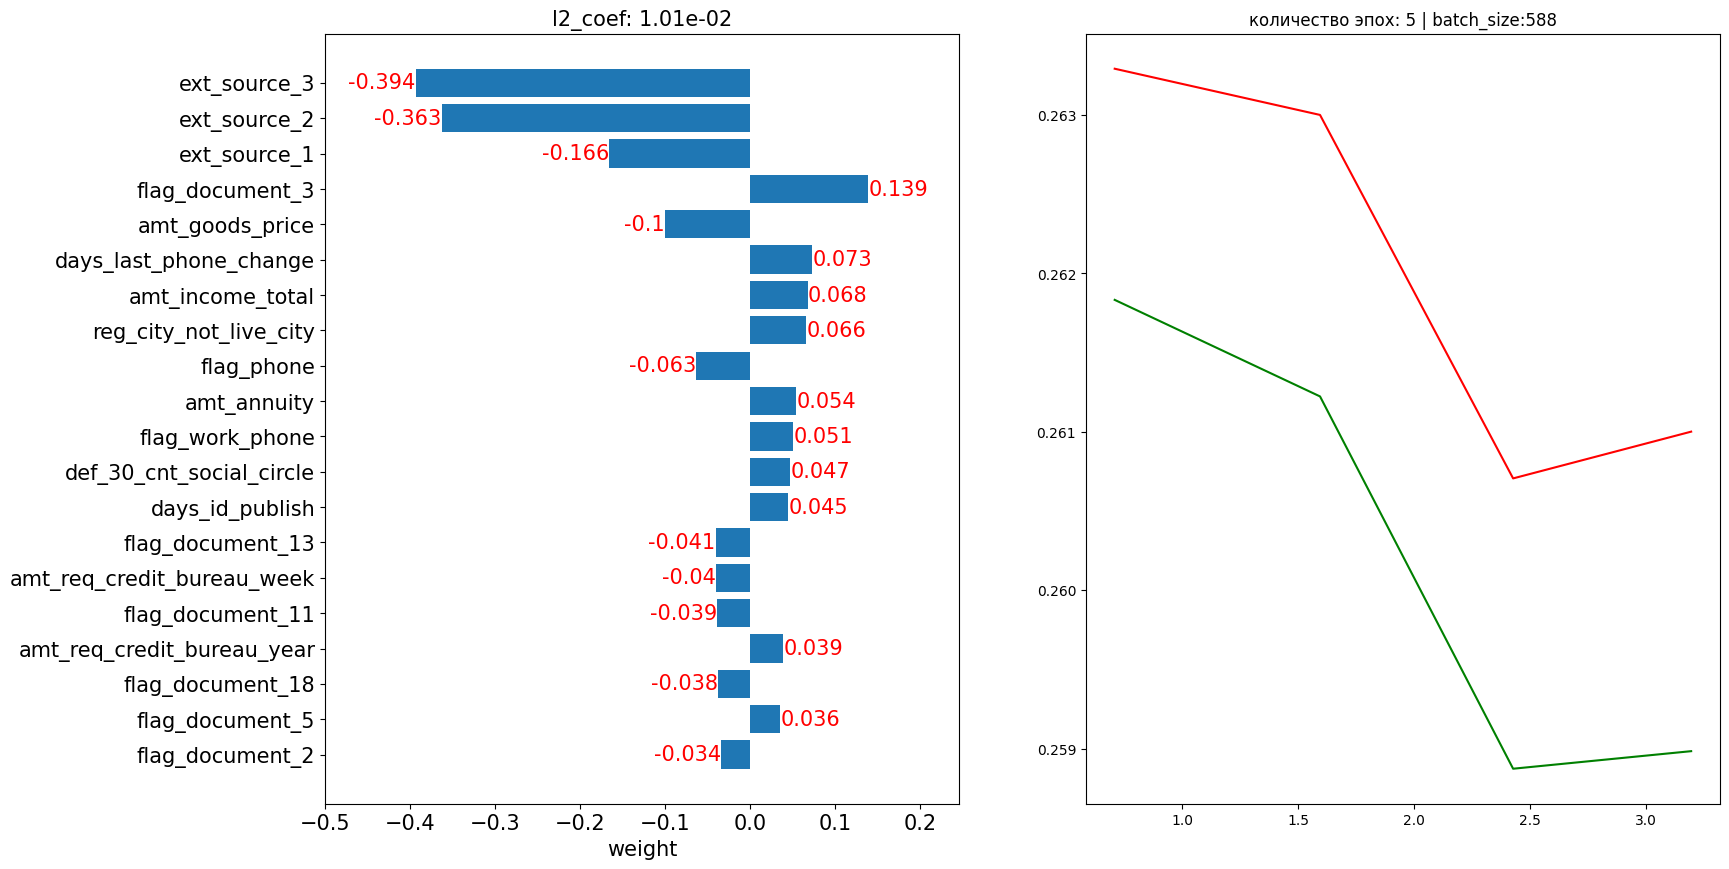

################################################################################
Early stop on 5 epoch


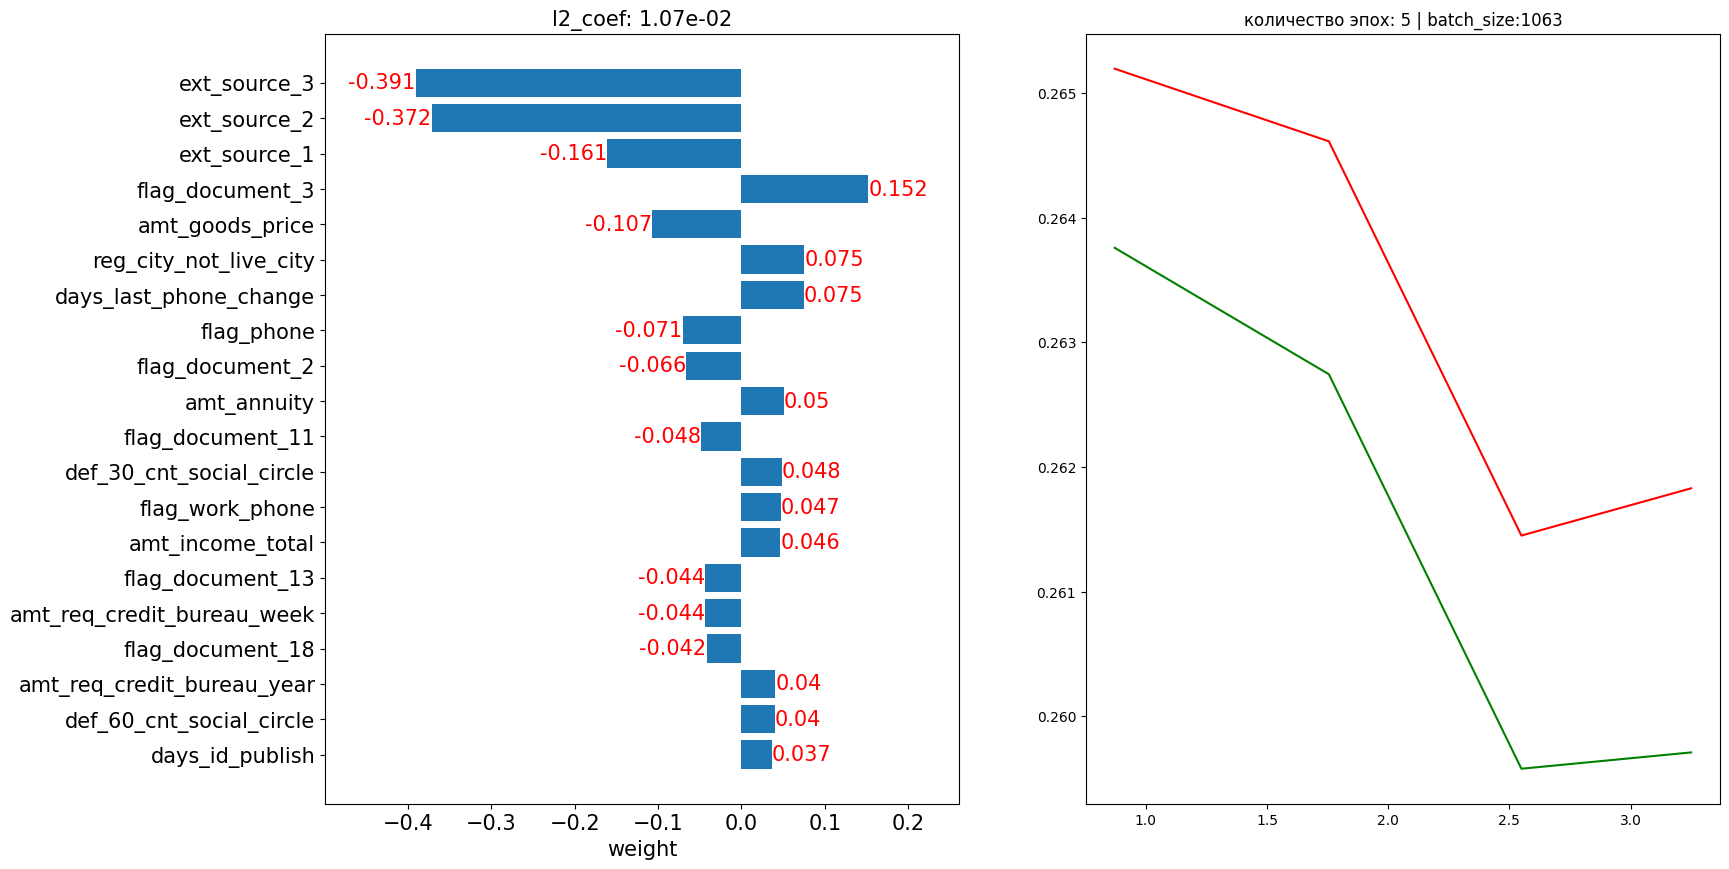

################################################################################
Early stop on 5 epoch


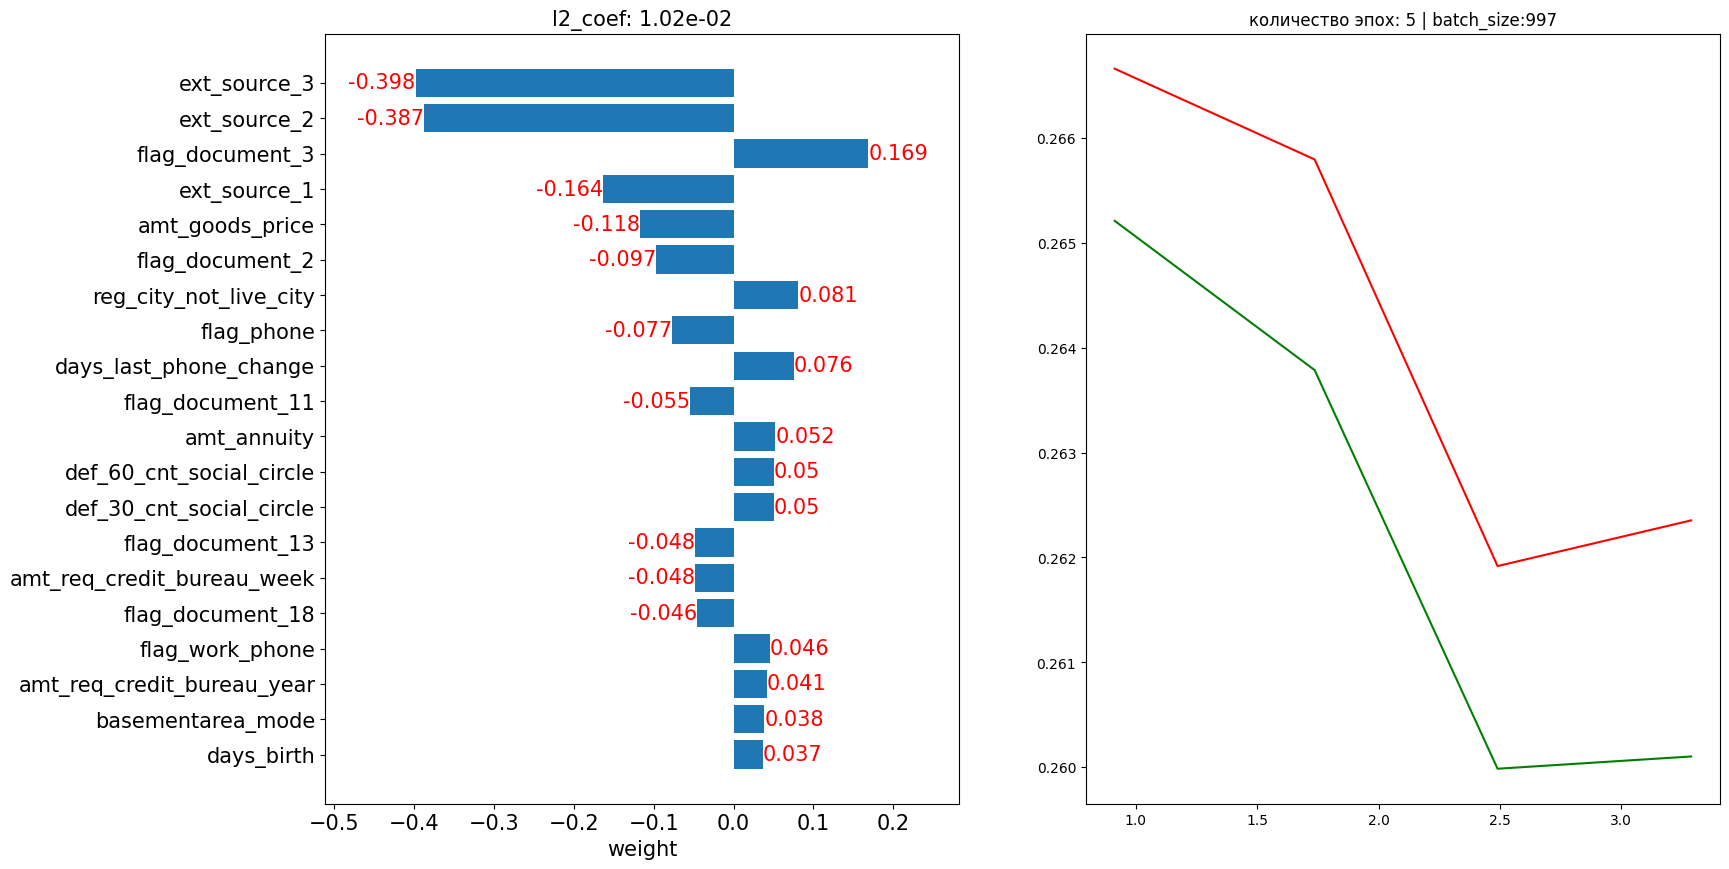

################################################################################


In [132]:
import matplotlib.pyplot as plt



def plot_trial_info(trial, model, history, top_k, *your_args, **your_kwargs):
    '''
    рисует значения весов линейной модели при признаках
    
    top_k: рисовать первые top_k весов по модулю
    Получаем на вход трайл, на котором надо рассмотреть модель, также историю времени и лосса на трейне 
    и валидации в модели, саму модель, а также количество признаков, которые надо вывести.
    '''
    # подготовка необходимого
    l2_coef = trial.params['l2_coef']
    num_features_to_plot = top_k
    weights = model.get_weights()
    sorted_idx = np.argsort(np.abs(weights))[::-1]
    fig, ax = plt.subplots(1, 2, figsize=(18, num_features_to_plot / 2))
    # сами бары
    container = ax[0].barh(y=features[sorted_idx][:top_k][::-1], width=weights[sorted_idx][:top_k][::-1])
    
    # приписать к ним значения весов
    ax[0].bar_label(container, weights[sorted_idx][:top_k][::-1].round(3), color='red', fontsize=15)
    
    # настройка ах'a
    ax[0].margins(0.2, 0.05)
    ax[0].set_title(f'l2_coef: {l2_coef:.2e}', fontsize=15)
    ax[0].tick_params(axis='both', labelsize=15)
    ax[0].set_xlabel('weight', fontsize=15)
    ax[1].plot(history['time'], history['train'], color='red')
    ax[1].plot(history['time'], history['val'], color = 'green')
    num_of_epochs = len(history['time'])
    batch_size = trial.params['batch_size']
    ax[1].set_title(f'количество эпох: {num_of_epochs + 1}' + ' | ' + f'batch_size:{batch_size}')
    
    plt.show()
    print('################################################################################')


top_k = 20
top_trials = [study.trials[75], study.trials[52], study.trials[84]]
prep = make_pipeline(
        StandardScaler(),
        SimpleImputer(strategy='median'))
features = data.select_dtypes(np.number).drop(columns=['target', 'sk_id_curr']).columns
prep.fit(data_dict['tr'][features])
data_train = prep.transform(data_dict['tr'][features])
data_val = prep.transform(data_dict['val'][features])
for trial in top_trials:
    model = LinearModel(
        step_alpha = trial.params['step_alpha'], 
        step_beta = trial.params['step_beta'],
        tolerance = 2e-4, 
        max_iter = 30, 
        loss_function = BinaryLogisticLoss(l2_coef = trial.params['l2_coef']),
        random_seed =  911)
    history = model.fit(X =data_train, 
                     X_val=data_val, y =data_dict['tr'].target.to_numpy(), trace = True,
                     y_val=data_dict['val'].target.to_numpy())
    plot_trial_info(trial, model = model, history=history, top_k=top_k)

Опишите свои наблюдения. Если нужно, подключите визуализацию.

Заметим, что набор первых 4 самых важных весов находится состоит из одних и тех же величин, однако порядок в 3 отличается от первых 3. Также лосс на валидации всегда меньше, чем на трейне, а также все три модели обучаются за одинаковое количество эпох(5) обучаются. Также, заметим, что большинство весов очень маленькие, меньшие 0.1.

Какой в итоге коэффициент l2-регуляризации будем фиксировать для дальнейших экспериментов? <br>
Ответ объясните.

В качестве финального варианта коэффициента регуляризации я бы взял 1.07e-02, так как на нем получается лосс примерно такой же, как и в наилучшем, но он обучается за 12 секунд, а не за 17, что очень быстро. Также он самый большой из этих 3, так что можно будет занулить большее число коэффициентов, так как они сильнее прижаты к нулю.

### Часть вторая. Research

Давайте зафиксируем выбранный коэффициент регуляризации и проведем несколько экспериментов с `step_alpha, step_beta, batch_size`. Но для начала посмотрим - возможно, нам удастся уменьшить размер признакового пространства без сильной потери качества, чтобы ускорить наши эксперименты.

Достаньте из словаря модель, соответствующую выбранному вами лучшему trial, и нарисуйте график отсортированных модулей ее весов.

In [137]:
def least_significant_weights(trial, model, least_k, *your_args, **your_kwargs):
    '''
    рисует значения весов линейной модели при признаках
    
    least_k: рисовать последние least_k весов по модулю
    Получаем на вход трайл, на котором надо рассмотреть модель, саму модель, а также количество признаков, которые надо вывести.
    '''
    # подготовка необходимого
    l2_coef = trial.params['l2_coef']
    num_features_to_plot = least_k
    weights = model.get_weights()
    sorted_idx = np.argsort(np.abs(weights))
    fig, ax = plt.subplots(figsize=(18, num_features_to_plot / 2))
    # сами бары
    container = ax.barh(y=features[sorted_idx][:least_k][::-1], width=weights[sorted_idx][:least_k][::-1])
    
    # приписать к ним значения весов
    ax.bar_label(container, weights[sorted_idx][:least_k][::-1].round(3), color='red', fontsize=15)
    
    # настройка ах'a
    ax.margins(0.2, 0.05)
    ax.set_title(f'l2_coef: {l2_coef:.2e}', fontsize=15)
    ax.tick_params(axis='both', labelsize=15)
    ax.set_xlabel('weight', fontsize=15)
    
    plt.show()
    print('################################################################################')

In [141]:
least_k = 40
l2_coef = 1.07e-02
top_trial = study.trials[52]
model = LinearModel(
        step_alpha = trial.params['step_alpha'], 
        step_beta = trial.params['step_beta'],
        tolerance = 2e-4, 
        max_iter = 30, 
        loss_function = BinaryLogisticLoss(l2_coef = l2_coef),
        random_seed =  911)
model.fit(X =data_train, X_val=data_val, y =data_dict['tr'].target.to_numpy(),
          y_val=data_dict['val'].target.to_numpy())
least_significant_weights(top_trial, model, least_k =least_k)
w = model.get_weights()
features_ = features[abs(w) > 0.006]

Early stop on 5 epoch


################################################################################


Подумайте, можно ли убрать какую-то долю признаков? Если да, то какие признаки вы уберете для дальнейших экспериментов? <br>
Ответ объясните.

Построим график, аналогичный тому, что мы рисовали, однако в нем будут показываться не максимальные, а минимальные веса. Как видно, довольно многоо весов >0.006, их по сути можно обнулить, потому что даже если мы рассмотрим другие параметры они не вырастут настолько, чтобы перестать быть маленькими. Также мы удалим всего 26 признаков из 104, что будет +-25-20 процентов от всех признаков, что является нормальным.

Напишите новую функцию `research_objective` для перебора `step_alpha, step_beta` при фиксированных `l2_coef, batch_size`. Остальные гиперпараметры оставьте без изменений с прошлого раза. Для перебора step_alpha используйте log-шкалу от 1e-3 до 20, для перебора step_beta - log-шкалу от 0.1 до 5.

Для `batch_size = 300, 1000, 10000` запустите по сессии оптимизации на выбранном вами множестве признаков, собирая каждый `study` в словарик по ключу batch_size. Используйте `n_trials = 200`, TPESampler с параметром `n_startup_trials = 100`.<br>

In [148]:
def research_objective(trial, batch_size, l2_coef, X_tr, y_tr, X_val, y_val):
    '''
    function of objective loss(returns objective loss for log regrression) with fixes batch size and l2_coef
    '''
    params = {
        'loss_function': BinaryLogisticLoss(l2_coef = l2_coef),
        'batch_size': batch_size,
        'step_alpha': trial.suggest_float('step_alpha', 1e-3, 20, log=True, step=None),
        'step_beta': trial.suggest_float('step_beta', 0.1, 5, log=True, step=None),
        'max_iter': 30,
        'tolerance':  2e-4,
        'random_seed': 911
    }
    # создаем и обучаем модель на предложенных и фиксированных гиперпараметрах
    model = LinearModel(**params)
    model.fit(X_tr, y_tr)
    
    # предсказываем на валидации [/ кроссвалидации] и получаем скор - считаем метрику качества
    score = model.get_objective(X_val, y_val)
    
    # your code here
    
    return score

In [142]:
research_features = features_


studies = dict()
tpe_sampler = optuna.samplers.TPESampler(
        n_startup_trials= 100, # объем разведки. Всегда настраивайте!
        n_ei_candidates=13, # влияет на "точность шага"
)
prep = make_pipeline(
        StandardScaler(),
        SimpleImputer(strategy='median')
    )
prep.fit(data_dict['tr'][research_features])
data_train = prep.transform(data_dict['tr'][research_features])
data_val = prep.transform(data_dict['val'][research_features])

Используя `optuna.visualization.plot_contour`, нарисуйте график зависимости `step_alpha - step_beta - objective`. Используйте аргумент `target`, чтобы обрезать значения лоссов, которые портят тепловую карту. <br>
Для каждого `batch_size` выведите такой график в отдельной ячейке.

In [149]:
batch_sizes = [300, 1000, 10000]
research_features = features_


studies = dict()
tpe_sampler = optuna.samplers.TPESampler(
        n_startup_trials= 100, # объем разведки. Всегда настраивайте!
        n_ei_candidates=13, # влияет на "точность шага"
)
prep = make_pipeline(
        StandardScaler(),
        SimpleImputer(strategy='median')
    )
prep.fit(data_dict['tr'][research_features])
data_train = prep.transform(data_dict['tr'][research_features])
data_val = prep.transform(data_dict['val'][research_features])
for batch_size in batch_sizes:
    research_func = partial(research_objective, batch_size = batch_size, l2_coef = l2_coef, X_tr=data_train, 
        X_val=data_val, 
        y_tr=data_dict['tr'].target.to_numpy(), 
        y_val=data_dict['val'].target.to_numpy())
    studies[batch_size] = optuna.create_study(direction='minimize', sampler= tpe_sampler)
    studies[batch_size].optimize(research_func, n_trials= 200, n_jobs= 16)

[I 2023-11-18 13:05:41,217] A new study created in memory with name: no-name-64842c78-0ca9-4223-b7b5-53a55872cb54


Early stop on 3 epoch


[I 2023-11-18 13:05:58,215] Trial 14 finished with value: 0.2589183752427931 and parameters: {'step_alpha': 4.904594646930917, 'step_beta': 1.7784112639062195}. Best is trial 14 with value: 0.2589183752427931.


Early stop on 4 epoch
Early stop on 4 epoch


[I 2023-11-18 13:06:02,854] Trial 15 finished with value: 0.2547407802726196 and parameters: {'step_alpha': 0.40996501186084366, 'step_beta': 2.899339148609425}. Best is trial 15 with value: 0.2547407802726196.
[I 2023-11-18 13:06:02,961] Trial 0 finished with value: 0.25497316697316436 and parameters: {'step_alpha': 0.1231229753412407, 'step_beta': 0.22318473985520326}. Best is trial 15 with value: 0.2547407802726196.


Early stop on 5 epoch
Early stop on 5 epoch


[I 2023-11-18 13:06:06,648] Trial 3 finished with value: 0.25477167768720993 and parameters: {'step_alpha': 10.435731376753482, 'step_beta': 3.636634976072918}. Best is trial 15 with value: 0.2547407802726196.
[I 2023-11-18 13:06:06,716] Trial 11 finished with value: 0.2547552030419751 and parameters: {'step_alpha': 0.09046663769992772, 'step_beta': 0.31821521033609335}. Best is trial 15 with value: 0.2547407802726196.
[I 2023-11-18 13:06:06,716] Trial 7 finished with value: 0.25481257517173 and parameters: {'step_alpha': 0.0849481868102707, 'step_beta': 0.11676715648570682}. Best is trial 15 with value: 0.2547407802726196.


Early stop on 5 epoch
Early stop on 5 epoch
Early stop on 5 epoch


[I 2023-11-18 13:06:07,323] Trial 1 finished with value: 0.2564188094956367 and parameters: {'step_alpha': 0.5470871245136203, 'step_beta': 0.11057616319815142}. Best is trial 15 with value: 0.2547407802726196.
[I 2023-11-18 13:06:07,345] Trial 10 finished with value: 0.25461149881522693 and parameters: {'step_alpha': 0.12500725678965635, 'step_beta': 1.670225590999415}. Best is trial 10 with value: 0.25461149881522693.


Early stop on 7 epoch


[I 2023-11-18 13:06:18,490] Trial 5 finished with value: 0.2546428670559513 and parameters: {'step_alpha': 0.08478935898213671, 'step_beta': 0.6709224532726137}. Best is trial 10 with value: 0.25461149881522693.


Early stop on 5 epoch


[I 2023-11-18 13:06:26,358] Trial 18 finished with value: 0.2550043414181291 and parameters: {'step_alpha': 10.576640048450365, 'step_beta': 2.607470614611323}. Best is trial 10 with value: 0.25461149881522693.


Early stop on 5 epoch
Early stop on 5 epoch


[I 2023-11-18 13:06:30,223] Trial 23 finished with value: 0.25465260896366365 and parameters: {'step_alpha': 10.680749600384052, 'step_beta': 3.9051584849013103}. Best is trial 10 with value: 0.25461149881522693.
[I 2023-11-18 13:06:30,322] Trial 19 finished with value: 0.2547438592127761 and parameters: {'step_alpha': 0.14212694228856892, 'step_beta': 1.4892043891714417}. Best is trial 10 with value: 0.25461149881522693.
[I 2023-11-18 13:06:30,441] Trial 22 finished with value: 0.25486658770299614 and parameters: {'step_alpha': 0.09344687280944627, 'step_beta': 0.3280470314292952}. Best is trial 10 with value: 0.25461149881522693.


Early stop on 5 epoch


[I 2023-11-18 13:06:30,814] Trial 6 finished with value: 0.2561348798998101 and parameters: {'step_alpha': 17.96512104250376, 'step_beta': 1.748833041494431}. Best is trial 10 with value: 0.25461149881522693.


Early stop on 10 epoch


[I 2023-11-18 13:06:47,194] Trial 26 finished with value: 0.25539361540260974 and parameters: {'step_alpha': 0.3507461533181391, 'step_beta': 0.129580366723476}. Best is trial 10 with value: 0.25461149881522693.


Early stop on 3 epoch


[I 2023-11-18 13:06:54,622] Trial 20 finished with value: 0.25483057018073096 and parameters: {'step_alpha': 3.271098533725891, 'step_beta': 1.2647473780787712}. Best is trial 10 with value: 0.25461149881522693.


Early stop on 10 epoch


[I 2023-11-18 13:07:03,050] Trial 8 finished with value: 0.25529687809587764 and parameters: {'step_alpha': 15.007413814198898, 'step_beta': 1.615436272535941}. Best is trial 10 with value: 0.25461149881522693.


Early stop on 17 epoch


[I 2023-11-18 13:07:07,494] Trial 24 finished with value: 3.0264365317829527 and parameters: {'step_alpha': 0.0012628248473146428, 'step_beta': 3.432605464849978}. Best is trial 10 with value: 0.25461149881522693.


Early stop on 11 epoch


[I 2023-11-18 13:07:11,243] Trial 30 finished with value: 0.2556033687026576 and parameters: {'step_alpha': 1.9016089980653987, 'step_beta': 1.0841851608726216}. Best is trial 10 with value: 0.25461149881522693.


Early stop on 6 epoch


[I 2023-11-18 13:07:14,782] Trial 28 finished with value: 1.3020633164456124 and parameters: {'step_alpha': 0.006808184615704039, 'step_beta': 3.9261693516164184}. Best is trial 10 with value: 0.25461149881522693.


Early stop on 10 epoch
Early stop on 22 epoch


[I 2023-11-18 13:07:25,434] Trial 2 finished with value: 0.32771557860825545 and parameters: {'step_alpha': 0.028494459466703266, 'step_beta': 2.3756643745888253}. Best is trial 10 with value: 0.25461149881522693.
[I 2023-11-18 13:07:26,276] Trial 34 finished with value: 0.25462437355248924 and parameters: {'step_alpha': 0.39037743342822034, 'step_beta': 2.9313252179818536}. Best is trial 10 with value: 0.25461149881522693.


Early stop on 3 epoch


[I 2023-11-18 13:07:44,873] Trial 36 finished with value: 0.25461377060002965 and parameters: {'step_alpha': 11.437313695156, 'step_beta': 4.148306314039776}. Best is trial 10 with value: 0.25461149881522693.


Early stop on 5 epoch


[I 2023-11-18 13:07:45,527] Trial 37 finished with value: 0.2558673077793185 and parameters: {'step_alpha': 6.802459733809149, 'step_beta': 2.194384613094996}. Best is trial 10 with value: 0.25461149881522693.


Early stop on 5 epoch


[I 2023-11-18 13:07:53,965] Trial 13 finished with value: 0.2557459756113138 and parameters: {'step_alpha': 0.022094284995370677, 'step_beta': 0.8477181123100125}. Best is trial 10 with value: 0.25461149881522693.
[I 2023-11-18 13:07:54,021] Trial 12 finished with value: 0.7705311281870759 and parameters: {'step_alpha': 0.006135494526581235, 'step_beta': 1.6959368918087088}. Best is trial 10 with value: 0.25461149881522693.
[I 2023-11-18 13:07:54,859] Trial 9 finished with value: 0.2617860734519019 and parameters: {'step_alpha': 4.259412760295124, 'step_beta': 0.1806180230735591}. Best is trial 10 with value: 0.25461149881522693.
[I 2023-11-18 13:07:54,912] Trial 4 finished with value: 0.2990594227366047 and parameters: {'step_alpha': 0.016605233389329094, 'step_beta': 1.325421066219953}. Best is trial 10 with value: 0.25461149881522693.
[I 2023-11-18 13:08:02,249] Trial 38 finished with value: 0.2547716817518153 and parameters: {'step_alpha': 1.1230497401991366, 'step_beta': 1.9153414

Early stop on 5 epoch


[I 2023-11-18 13:08:04,944] Trial 16 finished with value: 0.25675412111768026 and parameters: {'step_alpha': 2.898776943756277, 'step_beta': 0.35104380211692043}. Best is trial 10 with value: 0.25461149881522693.
[I 2023-11-18 13:08:07,964] Trial 17 finished with value: 0.39545855564952115 and parameters: {'step_alpha': 0.007779430823954076, 'step_beta': 1.0316778244253013}. Best is trial 10 with value: 0.25461149881522693.
[I 2023-11-18 13:08:11,545] Trial 21 finished with value: 0.2552374088088797 and parameters: {'step_alpha': 0.05162199821078421, 'step_beta': 1.3237883989395856}. Best is trial 10 with value: 0.25461149881522693.


Early stop on 30 epoch


[I 2023-11-18 13:08:15,541] Trial 45 finished with value: 0.2546132932669284 and parameters: {'step_alpha': 1.4878033295283914, 'step_beta': 4.56390264602352}. Best is trial 10 with value: 0.25461149881522693.


Early stop on 3 epoch


[I 2023-11-18 13:08:18,192] Trial 25 finished with value: 0.2634486993226184 and parameters: {'step_alpha': 2.4668799358112175, 'step_beta': 0.14677147773943217}. Best is trial 10 with value: 0.25461149881522693.


Early stop on 28 epoch


[I 2023-11-18 13:08:21,431] Trial 41 finished with value: 0.255052571473109 and parameters: {'step_alpha': 14.70932856565482, 'step_beta': 2.1178099330202014}. Best is trial 10 with value: 0.25461149881522693.


Early stop on 8 epoch


[I 2023-11-18 13:08:27,771] Trial 27 finished with value: 0.3594591956463262 and parameters: {'step_alpha': 0.021117733021317583, 'step_beta': 1.9724036280172734}. Best is trial 10 with value: 0.25461149881522693.
[I 2023-11-18 13:08:28,067] Trial 46 finished with value: 0.2609799864431605 and parameters: {'step_alpha': 8.940880785440207, 'step_beta': 1.062627705646054}. Best is trial 10 with value: 0.25461149881522693.


Early stop on 6 epoch
Early stop on 5 epoch


[I 2023-11-18 13:08:28,126] Trial 47 finished with value: 0.25468232210724323 and parameters: {'step_alpha': 0.8377703466910819, 'step_beta': 1.6269394981851406}. Best is trial 10 with value: 0.25461149881522693.
[I 2023-11-18 13:08:28,622] Trial 29 finished with value: 0.27444722081464057 and parameters: {'step_alpha': 0.023014721692827183, 'step_beta': 1.19051271319102}. Best is trial 10 with value: 0.25461149881522693.
[I 2023-11-18 13:08:29,585] Trial 44 finished with value: 0.25498057002469715 and parameters: {'step_alpha': 0.10125567236919364, 'step_beta': 1.654846254298511}. Best is trial 10 with value: 0.25461149881522693.


Early stop on 8 epoch


[I 2023-11-18 13:08:41,385] Trial 51 finished with value: 0.2546197547668818 and parameters: {'step_alpha': 0.5107210067076217, 'step_beta': 1.6447387448714876}. Best is trial 10 with value: 0.25461149881522693.


Early stop on 4 epoch


[I 2023-11-18 13:08:45,792] Trial 31 finished with value: 0.27683241984890156 and parameters: {'step_alpha': 0.006690795027823723, 'step_beta': 0.5424499618410037}. Best is trial 10 with value: 0.25461149881522693.
[I 2023-11-18 13:08:47,827] Trial 49 finished with value: 0.2555698555356142 and parameters: {'step_alpha': 0.8991555575072954, 'step_beta': 0.2983373214796208}. Best is trial 10 with value: 0.25461149881522693.


Early stop on 9 epoch


[I 2023-11-18 13:08:50,895] Trial 32 finished with value: 2.0436242953719357 and parameters: {'step_alpha': 0.0010278738380033153, 'step_beta': 0.9710832416508628}. Best is trial 10 with value: 0.25461149881522693.
[I 2023-11-18 13:08:51,588] Trial 54 finished with value: 0.25640251940126957 and parameters: {'step_alpha': 3.553136016207952, 'step_beta': 1.029487088895897}. Best is trial 10 with value: 0.25461149881522693.


Early stop on 7 epoch


[I 2023-11-18 13:08:56,237] Trial 33 finished with value: 0.31482989039947323 and parameters: {'step_alpha': 10.027465091938263, 'step_beta': 0.16574774255401112}. Best is trial 10 with value: 0.25461149881522693.
[I 2023-11-18 13:09:01,403] Trial 58 finished with value: 0.25467972595269 and parameters: {'step_alpha': 0.7787150961901687, 'step_beta': 3.0548798341052574}. Best is trial 10 with value: 0.25461149881522693.
[I 2023-11-18 13:09:01,446] Trial 35 finished with value: 0.28428141635097837 and parameters: {'step_alpha': 0.029840286062466793, 'step_beta': 1.604249609920749}. Best is trial 10 with value: 0.25461149881522693.


Early stop on 4 epoch


[I 2023-11-18 13:09:02,679] Trial 57 finished with value: 0.25468718235031657 and parameters: {'step_alpha': 1.0131233931389099, 'step_beta': 2.317917586808889}. Best is trial 10 with value: 0.25461149881522693.


Early stop on 5 epoch


[I 2023-11-18 13:09:04,095] Trial 53 finished with value: 0.25586949703364464 and parameters: {'step_alpha': 0.9422050550619059, 'step_beta': 0.3301668824588677}. Best is trial 10 with value: 0.25461149881522693.


Early stop on 11 epoch


[I 2023-11-18 13:09:09,641] Trial 61 finished with value: 0.2547146152258498 and parameters: {'step_alpha': 0.1287533673444641, 'step_beta': 0.3084694966346833}. Best is trial 10 with value: 0.25461149881522693.


Early stop on 4 epoch


[I 2023-11-18 13:09:11,755] Trial 60 finished with value: 0.26938348552641467 and parameters: {'step_alpha': 0.06208432969088515, 'step_beta': 3.7045066519132237}. Best is trial 10 with value: 0.25461149881522693.


Early stop on 6 epoch


[I 2023-11-18 13:09:15,131] Trial 63 finished with value: 0.2545374363094395 and parameters: {'step_alpha': 0.1894149912382944, 'step_beta': 2.9679757906521678}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 4 epoch


[I 2023-11-18 13:09:23,627] Trial 40 finished with value: 0.2547078848208769 and parameters: {'step_alpha': 0.01564873173952875, 'step_beta': 0.31294345600794904}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 27 epoch


[I 2023-11-18 13:09:25,436] Trial 39 finished with value: 0.4696419304482435 and parameters: {'step_alpha': 10.652302510556362, 'step_beta': 0.11561175141060591}. Best is trial 63 with value: 0.2545374363094395.
[I 2023-11-18 13:09:27,494] Trial 65 finished with value: 0.25526709904965605 and parameters: {'step_alpha': 0.7407390291541421, 'step_beta': 0.9102356842086022}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 7 epoch


[I 2023-11-18 13:09:34,070] Trial 43 finished with value: 0.2550583853761511 and parameters: {'step_alpha': 0.015245211778736641, 'step_beta': 0.5376423780093152}. Best is trial 63 with value: 0.2545374363094395.
[I 2023-11-18 13:09:34,120] Trial 42 finished with value: 0.3325177659731026 and parameters: {'step_alpha': 0.002517441648463119, 'step_beta': 0.2692497172974906}. Best is trial 63 with value: 0.2545374363094395.
[I 2023-11-18 13:09:43,364] Trial 66 finished with value: 0.32404797489519743 and parameters: {'step_alpha': 0.036187566856908736, 'step_beta': 3.2136515606927363}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 10 epoch


[I 2023-11-18 13:09:45,485] Trial 67 finished with value: 0.2560299970006446 and parameters: {'step_alpha': 0.46205148673505536, 'step_beta': 0.24291081573749593}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 10 epoch


[I 2023-11-18 13:09:47,398] Trial 69 finished with value: 0.638145013109489 and parameters: {'step_alpha': 0.015861645470664442, 'step_beta': 4.438605959656839}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 7 epoch


[I 2023-11-18 13:09:48,007] Trial 71 finished with value: 0.2599744174485966 and parameters: {'step_alpha': 0.08655958185530004, 'step_beta': 3.602613599678776}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 6 epoch


[I 2023-11-18 13:09:53,677] Trial 48 finished with value: 0.4222373911417835 and parameters: {'step_alpha': 0.0029215935875924275, 'step_beta': 0.42223715841151654}. Best is trial 63 with value: 0.2545374363094395.
[I 2023-11-18 13:10:00,569] Trial 50 finished with value: 0.2746420144701265 and parameters: {'step_alpha': 0.03073002455750895, 'step_beta': 1.4680550390228067}. Best is trial 63 with value: 0.2545374363094395.
[I 2023-11-18 13:10:01,513] Trial 77 finished with value: 0.2551003291927669 and parameters: {'step_alpha': 0.09975287587963919, 'step_beta': 0.13644273070982382}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 4 epoch


[I 2023-11-18 13:10:02,212] Trial 62 finished with value: 0.2557469315044177 and parameters: {'step_alpha': 2.19427566020753, 'step_beta': 0.6299477353351972}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 18 epoch


[I 2023-11-18 13:10:07,966] Trial 52 finished with value: 0.4265540356851511 and parameters: {'step_alpha': 0.001184572629597893, 'step_beta': 0.11946462290365563}. Best is trial 63 with value: 0.2545374363094395.
[I 2023-11-18 13:10:10,327] Trial 55 finished with value: 0.43979334362858563 and parameters: {'step_alpha': 0.0012849000077503692, 'step_beta': 0.16970584526789204}. Best is trial 63 with value: 0.2545374363094395.
[I 2023-11-18 13:10:11,113] Trial 76 finished with value: 0.2548218733019819 and parameters: {'step_alpha': 3.2781766296932258, 'step_beta': 1.6696334894369014}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 7 epoch


[I 2023-11-18 13:10:12,711] Trial 70 finished with value: 0.2551284265472441 and parameters: {'step_alpha': 0.06585525168342518, 'step_beta': 1.285188369403176}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 14 epoch


[I 2023-11-18 13:10:20,198] Trial 56 finished with value: 0.4708498233129892 and parameters: {'step_alpha': 0.0012325618505156393, 'step_beta': 0.18695320367067955}. Best is trial 63 with value: 0.2545374363094395.
[I 2023-11-18 13:10:21,191] Trial 82 finished with value: 0.25473296969186476 and parameters: {'step_alpha': 0.13356586961305703, 'step_beta': 0.5964410743662469}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 4 epoch


[I 2023-11-18 13:10:29,816] Trial 59 finished with value: 0.5319670556272028 and parameters: {'step_alpha': 0.01638853910825396, 'step_beta': 2.2304331885863125}. Best is trial 63 with value: 0.2545374363094395.
[I 2023-11-18 13:10:30,586] Trial 84 finished with value: 0.2555569153776968 and parameters: {'step_alpha': 0.11141397560403746, 'step_beta': 2.6480741256386064}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 6 epoch


[I 2023-11-18 13:10:31,942] Trial 85 finished with value: 0.27351145536603294 and parameters: {'step_alpha': 0.05667817752855131, 'step_beta': 3.711829899882501}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 6 epoch


[I 2023-11-18 13:10:34,306] Trial 73 finished with value: 0.2588765514115648 and parameters: {'step_alpha': 2.0509372655933813, 'step_beta': 0.24168897045490983}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 18 epoch


[I 2023-11-18 13:10:42,382] Trial 64 finished with value: 0.26369062065962434 and parameters: {'step_alpha': 0.011385424513683188, 'step_beta': 0.6543675892166131}. Best is trial 63 with value: 0.2545374363094395.
[I 2023-11-18 13:10:47,240] Trial 91 finished with value: 0.25466690449699414 and parameters: {'step_alpha': 0.26442239126706185, 'step_beta': 0.8340683305100178}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 4 epoch


[I 2023-11-18 13:10:47,940] Trial 68 finished with value: 0.25468408565379846 and parameters: {'step_alpha': 0.011434474589317891, 'step_beta': 0.2002995480381685}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 28 epoch


[I 2023-11-18 13:10:49,286] Trial 88 finished with value: 0.2559255668325444 and parameters: {'step_alpha': 0.7673977076622894, 'step_beta': 0.4529909041021378}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 6 epoch


[I 2023-11-18 13:10:49,870] Trial 83 finished with value: 0.254785129315828 and parameters: {'step_alpha': 0.028945753521313997, 'step_beta': 0.18906537088125147}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 12 epoch


[I 2023-11-18 13:11:00,543] Trial 93 finished with value: 0.254742233983348 and parameters: {'step_alpha': 2.1303763591201563, 'step_beta': 2.799484821551211}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 4 epoch
Early stop on 13 epoch


[I 2023-11-18 13:11:02,050] Trial 86 finished with value: 0.2546906736905952 and parameters: {'step_alpha': 0.03901214145365768, 'step_beta': 0.4396972194543735}. Best is trial 63 with value: 0.2545374363094395.
[I 2023-11-18 13:11:05,123] Trial 78 finished with value: 0.2545696641298429 and parameters: {'step_alpha': 0.01588751403376059, 'step_beta': 0.19643590102721173}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 22 epoch


[I 2023-11-18 13:11:11,636] Trial 72 finished with value: 0.2584488128749868 and parameters: {'step_alpha': 0.013436953118659018, 'step_beta': 0.6042210825724612}. Best is trial 63 with value: 0.2545374363094395.
[I 2023-11-18 13:11:20,911] Trial 97 finished with value: 0.2547235125183609 and parameters: {'step_alpha': 0.06596399979948075, 'step_beta': 0.31587550275309517}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 6 epoch


[I 2023-11-18 13:11:21,512] Trial 74 finished with value: 0.26946393933387147 and parameters: {'step_alpha': 0.009817052252955708, 'step_beta': 0.5920619693461564}. Best is trial 63 with value: 0.2545374363094395.
[I 2023-11-18 13:11:21,578] Trial 100 finished with value: 0.25537918056523945 and parameters: {'step_alpha': 0.19670458763661167, 'step_beta': 0.2665662931569526}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 3 epoch


[I 2023-11-18 13:11:25,425] Trial 75 finished with value: 0.2585111448070548 and parameters: {'step_alpha': 2.7563403704440397, 'step_beta': 0.1472671692198853}. Best is trial 63 with value: 0.2545374363094395.
[I 2023-11-18 13:11:30,723] Trial 90 finished with value: 0.2593863873665833 and parameters: {'step_alpha': 1.824333966497148, 'step_beta': 0.24012393673522472}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 18 epoch


[I 2023-11-18 13:11:31,122] Trial 99 finished with value: 0.2554122523059856 and parameters: {'step_alpha': 0.3924234732491581, 'step_beta': 0.2409312397702101}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 8 epoch


[I 2023-11-18 13:11:34,430] Trial 102 finished with value: 0.2600514425226146 and parameters: {'step_alpha': 8.69625744590532, 'step_beta': 1.3803646616484055}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 4 epoch


[I 2023-11-18 13:11:35,197] Trial 92 finished with value: 0.2546643587528495 and parameters: {'step_alpha': 0.025928476206214073, 'step_beta': 0.35820787800655624}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 16 epoch


[I 2023-11-18 13:11:36,899] Trial 79 finished with value: 0.2548848152247224 and parameters: {'step_alpha': 0.026635948823207613, 'step_beta': 0.6387288139100139}. Best is trial 63 with value: 0.2545374363094395.
[I 2023-11-18 13:11:38,705] Trial 80 finished with value: 0.2562410497775152 and parameters: {'step_alpha': 0.012741915888316552, 'step_beta': 0.4756785539816809}. Best is trial 63 with value: 0.2545374363094395.
[I 2023-11-18 13:11:40,309] Trial 81 finished with value: 0.25490366884089327 and parameters: {'step_alpha': 0.011102392921725953, 'step_beta': 0.22083404924198963}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 30 epoch


[I 2023-11-18 13:11:43,425] Trial 105 finished with value: 0.25461832980872623 and parameters: {'step_alpha': 4.300699429101838, 'step_beta': 4.465350286098287}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 4 epoch


[I 2023-11-18 13:11:48,808] Trial 96 finished with value: 0.2548834400488964 and parameters: {'step_alpha': 0.03030029364282624, 'step_beta': 0.5476897077877252}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 18 epoch


[I 2023-11-18 13:11:53,615] Trial 112 finished with value: 0.25504663564628993 and parameters: {'step_alpha': 0.3263783114874874, 'step_beta': 0.7069183157301334}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 3 epoch


[I 2023-11-18 13:11:55,132] Trial 108 finished with value: 0.254713026703951 and parameters: {'step_alpha': 1.450110102945792, 'step_beta': 1.6267212660380945}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 6 epoch


[I 2023-11-18 13:11:57,478] Trial 103 finished with value: 0.25454433915773816 and parameters: {'step_alpha': 0.05221722370749169, 'step_beta': 0.6304414287281827}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 11 epoch


[I 2023-11-18 13:11:58,385] Trial 87 finished with value: 1.1331033729023567 and parameters: {'step_alpha': 0.0015545478337249871, 'step_beta': 0.8023853248050232}. Best is trial 63 with value: 0.2545374363094395.
[I 2023-11-18 13:12:01,018] Trial 107 finished with value: 1.955220730563839 and parameters: {'step_alpha': 0.0030262169658553328, 'step_beta': 4.2034796676113135}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 8 epoch


[I 2023-11-18 13:12:03,620] Trial 109 finished with value: 0.2562254196004023 and parameters: {'step_alpha': 0.3845189787898009, 'step_beta': 0.11636424250727338}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 8 epoch


[I 2023-11-18 13:12:06,868] Trial 111 finished with value: 0.2555577200081384 and parameters: {'step_alpha': 0.2197048524423362, 'step_beta': 0.12315231710916556}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 8 epoch


[I 2023-11-18 13:12:07,937] Trial 110 finished with value: 0.2545917993575736 and parameters: {'step_alpha': 0.04398457117172872, 'step_beta': 0.34494476025885185}. Best is trial 63 with value: 0.2545374363094395.
[I 2023-11-18 13:12:07,985] Trial 89 finished with value: 0.25906869023720397 and parameters: {'step_alpha': 0.030329376881788522, 'step_beta': 1.1416260177569382}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 9 epoch


[I 2023-11-18 13:12:08,767] Trial 115 finished with value: 0.25462958921007706 and parameters: {'step_alpha': 4.567916901845567, 'step_beta': 4.603146638014524}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 4 epoch


[I 2023-11-18 13:12:09,987] Trial 114 finished with value: 0.2547738196748286 and parameters: {'step_alpha': 3.495129905328972, 'step_beta': 2.432765452804889}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 5 epoch


[I 2023-11-18 13:12:10,699] Trial 116 finished with value: 0.2546877291578631 and parameters: {'step_alpha': 3.786623292165319, 'step_beta': 4.921335095697838}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 4 epoch


[I 2023-11-18 13:12:11,140] Trial 118 finished with value: 0.25527716261391 and parameters: {'step_alpha': 0.19702374560735922, 'step_beta': 4.791841419044671}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 3 epoch


[I 2023-11-18 13:12:11,600] Trial 117 finished with value: 0.2546845974789283 and parameters: {'step_alpha': 4.556949002642, 'step_beta': 4.354345598081479}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 4 epoch


[I 2023-11-18 13:12:12,225] Trial 113 finished with value: 0.25492367844535685 and parameters: {'step_alpha': 9.285366109922947, 'step_beta': 2.423248727593158}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 7 epoch


[I 2023-11-18 13:12:16,654] Trial 119 finished with value: 0.254573205474986 and parameters: {'step_alpha': 6.518764883720781, 'step_beta': 4.5284055692927145}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 4 epoch


[I 2023-11-18 13:12:19,653] Trial 120 finished with value: 0.2545772124379719 and parameters: {'step_alpha': 6.301602885777439, 'step_beta': 4.8388713999896895}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 4 epoch


[I 2023-11-18 13:12:20,911] Trial 122 finished with value: 0.2545711560493977 and parameters: {'step_alpha': 0.1541731370490665, 'step_beta': 3.2111521584368363}. Best is trial 63 with value: 0.2545374363094395.
[I 2023-11-18 13:12:20,958] Trial 121 finished with value: 0.2546417167032712 and parameters: {'step_alpha': 5.334777869652748, 'step_beta': 4.360453775577294}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 4 epoch
Early stop on 4 epoch


[I 2023-11-18 13:12:21,827] Trial 123 finished with value: 0.25459154590706196 and parameters: {'step_alpha': 3.933164285893203, 'step_beta': 4.4848185841272885}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 4 epoch


[I 2023-11-18 13:12:23,122] Trial 124 finished with value: 0.2546675910192728 and parameters: {'step_alpha': 19.865705687332913, 'step_beta': 4.843717155768531}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 4 epoch


[I 2023-11-18 13:12:26,002] Trial 94 finished with value: 2.309680831522342 and parameters: {'step_alpha': 0.0010877096788593876, 'step_beta': 1.1940795059564653}. Best is trial 63 with value: 0.2545374363094395.
[I 2023-11-18 13:12:26,891] Trial 125 finished with value: 0.2547065150422224 and parameters: {'step_alpha': 6.107144324208556, 'step_beta': 3.139192270449863}. Best is trial 63 with value: 0.2545374363094395.
[I 2023-11-18 13:12:26,914] Trial 95 finished with value: 0.5283859511038606 and parameters: {'step_alpha': 0.003926498659109915, 'step_beta': 0.8237201493867695}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 5 epoch


[I 2023-11-18 13:12:27,528] Trial 126 finished with value: 0.25476610480043765 and parameters: {'step_alpha': 4.305242500304739, 'step_beta': 3.166941245841524}. Best is trial 63 with value: 0.2545374363094395.
[I 2023-11-18 13:12:27,662] Trial 127 finished with value: 0.2546694275348625 and parameters: {'step_alpha': 5.116637683724576, 'step_beta': 3.3419354599253204}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 5 epoch
Early stop on 5 epoch


[I 2023-11-18 13:12:28,654] Trial 128 finished with value: 0.25473333095988737 and parameters: {'step_alpha': 6.582589526592829, 'step_beta': 3.2388210134473674}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 5 epoch


[I 2023-11-18 13:12:32,979] Trial 129 finished with value: 0.25459705506109903 and parameters: {'step_alpha': 5.8090357958114405, 'step_beta': 3.199102231629861}. Best is trial 63 with value: 0.2545374363094395.
[I 2023-11-18 13:12:32,993] Trial 130 finished with value: 0.2546865788463979 and parameters: {'step_alpha': 5.497401814759597, 'step_beta': 4.082725663571304}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 5 epoch
Early stop on 4 epoch


[I 2023-11-18 13:12:34,305] Trial 132 finished with value: 0.25465081467146766 and parameters: {'step_alpha': 6.182582314977174, 'step_beta': 4.0771856429059055}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 4 epoch


[I 2023-11-18 13:12:36,289] Trial 134 finished with value: 0.2552447204317265 and parameters: {'step_alpha': 0.15374505723933318, 'step_beta': 3.9324990125167627}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 4 epoch


[I 2023-11-18 13:12:37,603] Trial 131 finished with value: 0.25463336510429496 and parameters: {'step_alpha': 13.18244802808845, 'step_beta': 4.100887291801483}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 5 epoch
Early stop on 3 epoch


[I 2023-11-18 13:12:37,704] Trial 138 finished with value: 0.25522387858800116 and parameters: {'step_alpha': 0.1589406366424924, 'step_beta': 4.055212596744989}. Best is trial 63 with value: 0.2545374363094395.
[I 2023-11-18 13:12:38,612] Trial 133 finished with value: 0.2546630578118473 and parameters: {'step_alpha': 5.748357039481829, 'step_beta': 3.900321803049548}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 5 epoch


[I 2023-11-18 13:12:39,260] Trial 98 finished with value: 0.2679332949098702 and parameters: {'step_alpha': 9.96808742159317, 'step_beta': 0.3980260037857011}. Best is trial 63 with value: 0.2545374363094395.
[I 2023-11-18 13:12:39,428] Trial 106 finished with value: 0.25828680818661437 and parameters: {'step_alpha': 3.9345923465506445, 'step_beta': 0.25655265030893165}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 21 epoch


[I 2023-11-18 13:12:43,076] Trial 135 finished with value: 0.2546497798862481 and parameters: {'step_alpha': 5.2611509833014285, 'step_beta': 3.2773053718021394}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 5 epoch


[I 2023-11-18 13:12:43,849] Trial 136 finished with value: 0.2546241620246236 and parameters: {'step_alpha': 5.963550149314478, 'step_beta': 3.6806759823393547}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 5 epoch


[I 2023-11-18 13:12:44,222] Trial 139 finished with value: 0.2546747479561409 and parameters: {'step_alpha': 7.849274490243599, 'step_beta': 3.9474547680378143}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 5 epoch


[I 2023-11-18 13:12:49,870] Trial 140 finished with value: 0.25467779738419843 and parameters: {'step_alpha': 13.663848318782847, 'step_beta': 3.921858783609272}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 5 epoch


[I 2023-11-18 13:12:58,498] Trial 137 finished with value: 0.29626400338310277 and parameters: {'step_alpha': 0.04591666553951397, 'step_beta': 4.109312563290245}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 6 epoch


[I 2023-11-18 13:13:03,895] Trial 142 finished with value: 0.2546420838726001 and parameters: {'step_alpha': 7.41325300594671, 'step_beta': 4.0477047914568685}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 5 epoch


[I 2023-11-18 13:13:05,820] Trial 143 finished with value: 0.254697505526426 and parameters: {'step_alpha': 12.47095848792597, 'step_beta': 3.9184054627644453}. Best is trial 63 with value: 0.2545374363094395.
[I 2023-11-18 13:13:05,872] Trial 146 finished with value: 0.2546701381591843 and parameters: {'step_alpha': 7.82127046328316, 'step_beta': 4.547173540315778}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 5 epoch
Early stop on 4 epoch
Early stop on 4 epoch


[I 2023-11-18 13:13:05,906] Trial 145 finished with value: 0.25461171753154616 and parameters: {'step_alpha': 3.011403408803999, 'step_beta': 3.5087354337530847}. Best is trial 63 with value: 0.2545374363094395.
[I 2023-11-18 13:13:06,674] Trial 147 finished with value: 0.2679805443373578 and parameters: {'step_alpha': 0.0769473252209281, 'step_beta': 4.65148069731309}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 4 epoch


[I 2023-11-18 13:13:08,006] Trial 141 finished with value: 0.2546618516656004 and parameters: {'step_alpha': 14.860382990388684, 'step_beta': 3.5193070525334824}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 6 epoch


[I 2023-11-18 13:13:10,487] Trial 148 finished with value: 0.2546623395580088 and parameters: {'step_alpha': 3.0374780772407637, 'step_beta': 3.5179911479719856}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 5 epoch
Early stop on 5 epoch
Early stop on 3 epoch


[I 2023-11-18 13:13:10,546] Trial 149 finished with value: 0.25468260801296116 and parameters: {'step_alpha': 8.383143117703648, 'step_beta': 3.535974166489196}. Best is trial 63 with value: 0.2545374363094395.
[I 2023-11-18 13:13:10,561] Trial 153 finished with value: 0.2547201406239821 and parameters: {'step_alpha': 2.9613028695518264, 'step_beta': 4.999584459687711}. Best is trial 63 with value: 0.2545374363094395.
[I 2023-11-18 13:13:11,949] Trial 154 finished with value: 0.25505236985741525 and parameters: {'step_alpha': 0.5975524162373588, 'step_beta': 4.5809086049228664}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 3 epoch


[I 2023-11-18 13:13:12,935] Trial 152 finished with value: 0.2563769052572603 and parameters: {'step_alpha': 0.11598528779496928, 'step_beta': 4.413386025032439}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 4 epoch


[I 2023-11-18 13:13:14,089] Trial 101 finished with value: 0.41388982179823663 and parameters: {'step_alpha': 12.788927667706172, 'step_beta': 0.1116518904101795}. Best is trial 63 with value: 0.2545374363094395.
[I 2023-11-18 13:13:14,531] Trial 144 finished with value: 0.28857745943519064 and parameters: {'step_alpha': 0.05192514054421404, 'step_beta': 3.5238022419569575}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 7 epoch


[I 2023-11-18 13:13:18,046] Trial 160 finished with value: 0.2569290208261209 and parameters: {'step_alpha': 0.11049596936643667, 'step_beta': 4.916232817746922}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 3 epoch


[I 2023-11-18 13:13:18,501] Trial 151 finished with value: 0.2607937873051504 and parameters: {'step_alpha': 0.08486552316955598, 'step_beta': 3.537806654822932}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 6 epoch


[I 2023-11-18 13:13:18,773] Trial 104 finished with value: 0.3029822384574111 and parameters: {'step_alpha': 7.73181341228883, 'step_beta': 0.22146563775814748}. Best is trial 63 with value: 0.2545374363094395.
[I 2023-11-18 13:13:19,760] Trial 157 finished with value: 0.2546384173995438 and parameters: {'step_alpha': 2.5320476582062046, 'step_beta': 3.4519120861545134}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 4 epoch


[I 2023-11-18 13:13:20,275] Trial 159 finished with value: 0.2547198386291635 and parameters: {'step_alpha': 2.5930658563171196, 'step_beta': 3.511402676554715}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 4 epoch


[I 2023-11-18 13:13:20,541] Trial 161 finished with value: 0.2546779019914267 and parameters: {'step_alpha': 0.2999424769932541, 'step_beta': 2.8984375215405764}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 3 epoch


[I 2023-11-18 13:13:21,126] Trial 150 finished with value: 0.27719739873600313 and parameters: {'step_alpha': 0.0728867864197574, 'step_beta': 3.5708261919103887}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 7 epoch


[I 2023-11-18 13:13:23,778] Trial 163 finished with value: 0.25820457098751926 and parameters: {'step_alpha': 0.11307223471533191, 'step_beta': 4.577961714672349}. Best is trial 63 with value: 0.2545374363094395.
[I 2023-11-18 13:13:23,787] Trial 162 finished with value: 0.2546404272593545 and parameters: {'step_alpha': 2.357107298275326, 'step_beta': 4.526426505331938}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 4 epoch
Early stop on 4 epoch


[I 2023-11-18 13:13:26,164] Trial 158 finished with value: 0.2653043551568849 and parameters: {'step_alpha': 0.07401466506442089, 'step_beta': 3.5060234442703986}. Best is trial 63 with value: 0.2545374363094395.
[I 2023-11-18 13:13:26,194] Trial 156 finished with value: 0.2650176334290635 and parameters: {'step_alpha': 0.07654833696152208, 'step_beta': 3.5996573115052275}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 6 epoch
Early stop on 6 epoch


[I 2023-11-18 13:13:30,318] Trial 166 finished with value: 0.25469855977637323 and parameters: {'step_alpha': 2.7236707325378724, 'step_beta': 2.683263551488352}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 5 epoch


[I 2023-11-18 13:13:30,749] Trial 167 finished with value: 0.25471492762510894 and parameters: {'step_alpha': 2.707090711667529, 'step_beta': 2.990954364565615}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 5 epoch


[I 2023-11-18 13:13:32,047] Trial 170 finished with value: 0.2547005951358499 and parameters: {'step_alpha': 2.4815944892496966, 'step_beta': 3.7731738510481736}. Best is trial 63 with value: 0.2545374363094395.


Early stop on 4 epoch


[I 2023-11-18 13:13:33,670] Trial 175 finished with value: 0.25452531868094846 and parameters: {'step_alpha': 0.2411668684340262, 'step_beta': 2.900417399587275}. Best is trial 175 with value: 0.25452531868094846.
[I 2023-11-18 13:13:33,711] Trial 176 finished with value: 0.2547073597062714 and parameters: {'step_alpha': 0.23336148434779877, 'step_beta': 2.974788243659497}. Best is trial 175 with value: 0.25452531868094846.


Early stop on 3 epoch
Early stop on 3 epoch


[I 2023-11-18 13:13:34,664] Trial 168 finished with value: 0.25463931668596274 and parameters: {'step_alpha': 2.4559659336047863, 'step_beta': 2.9772573268661335}. Best is trial 175 with value: 0.25452531868094846.
[I 2023-11-18 13:13:34,688] Trial 155 finished with value: 0.2656794347998799 and parameters: {'step_alpha': 0.06923804702284903, 'step_beta': 2.8742759964899265}. Best is trial 175 with value: 0.25452531868094846.
[I 2023-11-18 13:13:34,704] Trial 164 finished with value: 0.25714789645775565 and parameters: {'step_alpha': 0.0917186975185277, 'step_beta': 2.912570931495733}. Best is trial 175 with value: 0.25452531868094846.


Early stop on 5 epoch
Early stop on 9 epoch
Early stop on 7 epoch


[I 2023-11-18 13:13:35,251] Trial 169 finished with value: 0.2546411468370307 and parameters: {'step_alpha': 2.605518036329571, 'step_beta': 3.060430543298455}. Best is trial 175 with value: 0.25452531868094846.


Early stop on 5 epoch


[I 2023-11-18 13:13:36,342] Trial 171 finished with value: 0.2546838403394565 and parameters: {'step_alpha': 4.181191577284759, 'step_beta': 2.9635164628987796}. Best is trial 175 with value: 0.25452531868094846.
[I 2023-11-18 13:13:36,355] Trial 177 finished with value: 0.25463167600680653 and parameters: {'step_alpha': 0.44103864848155344, 'step_beta': 2.8267318750820083}. Best is trial 175 with value: 0.25452531868094846.


Early stop on 5 epoch
Early stop on 3 epoch


[I 2023-11-18 13:13:37,017] Trial 173 finished with value: 0.25469487682342534 and parameters: {'step_alpha': 3.905404333118647, 'step_beta': 3.6751742396271423}. Best is trial 175 with value: 0.25452531868094846.


Early stop on 5 epoch


[I 2023-11-18 13:13:37,863] Trial 174 finished with value: 0.2546559913077159 and parameters: {'step_alpha': 3.4137154587825043, 'step_beta': 2.7919370855589047}. Best is trial 175 with value: 0.25452531868094846.


Early stop on 5 epoch


[I 2023-11-18 13:13:39,609] Trial 165 finished with value: 0.256703121682013 and parameters: {'step_alpha': 0.0896723729503192, 'step_beta': 2.5615710417246307}. Best is trial 175 with value: 0.25452531868094846.


Early stop on 8 epoch


[I 2023-11-18 13:13:43,058] Trial 178 finished with value: 0.2547944995202637 and parameters: {'step_alpha': 3.999779847705794, 'step_beta': 2.9601299670857233}. Best is trial 175 with value: 0.25452531868094846.


Early stop on 5 epoch


[I 2023-11-18 13:13:45,728] Trial 187 finished with value: 0.2547626742239673 and parameters: {'step_alpha': 0.2558364865867471, 'step_beta': 3.279727882845171}. Best is trial 175 with value: 0.25452531868094846.


Early stop on 3 epoch


[I 2023-11-18 13:13:47,494] Trial 190 finished with value: 0.2553142284276181 and parameters: {'step_alpha': 0.15336491668217223, 'step_beta': 4.27943600367487}. Best is trial 175 with value: 0.25452531868094846.
[I 2023-11-18 13:13:47,506] Trial 182 finished with value: 0.25483904712465233 and parameters: {'step_alpha': 0.1775689086417526, 'step_beta': 2.7376433536486484}. Best is trial 175 with value: 0.25452531868094846.
[I 2023-11-18 13:13:47,541] Trial 183 finished with value: 0.25444356254685646 and parameters: {'step_alpha': 0.16310647847934154, 'step_beta': 2.5153937517659273}. Best is trial 183 with value: 0.25444356254685646.


Early stop on 3 epoch
Early stop on 4 epoch
Early stop on 4 epoch


[I 2023-11-18 13:13:48,071] Trial 180 finished with value: 0.2547253776378141 and parameters: {'step_alpha': 3.9245036713181447, 'step_beta': 2.569395959314099}. Best is trial 183 with value: 0.25444356254685646.


Early stop on 5 epoch


[I 2023-11-18 13:13:48,378] Trial 191 finished with value: 0.2547560413080232 and parameters: {'step_alpha': 0.27581084849614357, 'step_beta': 3.3458777708481984}. Best is trial 183 with value: 0.25444356254685646.


Early stop on 3 epoch


[I 2023-11-18 13:13:48,789] Trial 186 finished with value: 0.2546378175401796 and parameters: {'step_alpha': 0.5062161978635539, 'step_beta': 2.0341325271531088}. Best is trial 183 with value: 0.25444356254685646.
[I 2023-11-18 13:13:48,824] Trial 185 finished with value: 0.2548834238552311 and parameters: {'step_alpha': 0.16499561516168956, 'step_beta': 2.5691146131168963}. Best is trial 183 with value: 0.25444356254685646.
[I 2023-11-18 13:13:48,828] Trial 184 finished with value: 0.25454419404232786 and parameters: {'step_alpha': 0.18961814423205414, 'step_beta': 2.394716097796264}. Best is trial 183 with value: 0.25444356254685646.


Early stop on 4 epoch
Early stop on 4 epoch
Early stop on 4 epoch


[I 2023-11-18 13:13:49,313] Trial 181 finished with value: 0.2546778162649214 and parameters: {'step_alpha': 1.7176500277652853, 'step_beta': 2.7922481266651604}. Best is trial 183 with value: 0.25444356254685646.


Early stop on 5 epoch


[I 2023-11-18 13:13:49,850] Trial 189 finished with value: 0.25452650484958017 and parameters: {'step_alpha': 0.16251401278911426, 'step_beta': 1.8898036100548214}. Best is trial 183 with value: 0.25444356254685646.


Early stop on 4 epoch


[I 2023-11-18 13:13:50,148] Trial 188 finished with value: 0.25480494859869046 and parameters: {'step_alpha': 0.16403164979658522, 'step_beta': 1.434414079986093}. Best is trial 183 with value: 0.25444356254685646.


Early stop on 4 epoch


[I 2023-11-18 13:13:50,440] Trial 179 finished with value: 0.25458974026163234 and parameters: {'step_alpha': 3.896835482430945, 'step_beta': 2.754077532253157}. Best is trial 183 with value: 0.25444356254685646.


Early stop on 6 epoch


[I 2023-11-18 13:13:51,684] Trial 192 finished with value: 0.2547252022992289 and parameters: {'step_alpha': 0.17601879911972707, 'step_beta': 1.8606948468795015}. Best is trial 183 with value: 0.25444356254685646.


Early stop on 4 epoch


[I 2023-11-18 13:13:53,145] Trial 193 finished with value: 0.2547374155509977 and parameters: {'step_alpha': 0.2940234400681425, 'step_beta': 1.8882669075672933}. Best is trial 183 with value: 0.25444356254685646.


Early stop on 4 epoch


[I 2023-11-18 13:13:53,910] Trial 199 finished with value: 0.2547722300019295 and parameters: {'step_alpha': 0.21116258680344788, 'step_beta': 1.8982132801102638}. Best is trial 183 with value: 0.25444356254685646.


Early stop on 3 epoch


[I 2023-11-18 13:13:54,177] Trial 194 finished with value: 0.2548114946804214 and parameters: {'step_alpha': 0.1714297890358323, 'step_beta': 2.3491036580400677}. Best is trial 183 with value: 0.25444356254685646.


Early stop on 4 epoch


[I 2023-11-18 13:13:54,879] Trial 195 finished with value: 0.25465784707692984 and parameters: {'step_alpha': 6.793057592915114, 'step_beta': 4.229230033756543}. Best is trial 183 with value: 0.25444356254685646.
[I 2023-11-18 13:13:54,925] Trial 196 finished with value: 0.2546408231498434 and parameters: {'step_alpha': 0.18396116819397804, 'step_beta': 1.9938891068550024}. Best is trial 183 with value: 0.25444356254685646.


Early stop on 4 epoch
Early stop on 4 epoch


[I 2023-11-18 13:13:58,677] Trial 172 finished with value: 0.4456889369366065 and parameters: {'step_alpha': 0.01940910482919859, 'step_beta': 2.618462297883111}. Best is trial 183 with value: 0.25444356254685646.


Early stop on 20 epoch


[I 2023-11-18 13:14:03,612] Trial 197 finished with value: 0.4109851826463995 and parameters: {'step_alpha': 0.020479847806204793, 'step_beta': 2.434222455322014}. Best is trial 183 with value: 0.25444356254685646.


Early stop on 24 epoch


[I 2023-11-18 13:14:04,207] Trial 198 finished with value: 0.414521582369028 and parameters: {'step_alpha': 0.019440702944194314, 'step_beta': 2.312400861117798}. Best is trial 183 with value: 0.25444356254685646.
[I 2023-11-18 13:14:04,222] A new study created in memory with name: no-name-61575d9b-9d88-40a4-9667-e217899f3a42


Early stop on 26 epoch
Early stop on 2 epoch


[I 2023-11-18 13:14:11,037] Trial 0 finished with value: 0.25522474622747005 and parameters: {'step_alpha': 0.885589919208595, 'step_beta': 0.1830265772773897}. Best is trial 0 with value: 0.25522474622747005.


Early stop on 4 epoch


[I 2023-11-18 13:14:15,256] Trial 1 finished with value: 0.25499358757534835 and parameters: {'step_alpha': 0.5638245088282204, 'step_beta': 0.2831014088449388}. Best is trial 1 with value: 0.25499358757534835.
[I 2023-11-18 13:14:15,509] Trial 2 finished with value: 0.2565639450293295 and parameters: {'step_alpha': 7.0869712246244925, 'step_beta': 1.0773483355916964}. Best is trial 1 with value: 0.25499358757534835.


Early stop on 4 epoch


[I 2023-11-18 13:14:15,926] Trial 7 finished with value: 0.254806141541471 and parameters: {'step_alpha': 1.8689401355379494, 'step_beta': 0.9839702416065383}. Best is trial 7 with value: 0.254806141541471.


Early stop on 4 epoch


[I 2023-11-18 13:14:17,564] Trial 10 finished with value: 0.25482369358033674 and parameters: {'step_alpha': 0.35819740190056276, 'step_beta': 0.191552238722673}. Best is trial 7 with value: 0.254806141541471.
[I 2023-11-18 13:14:17,588] Trial 9 finished with value: 0.2548575501234603 and parameters: {'step_alpha': 1.7632998019866586, 'step_beta': 0.6171007114794584}. Best is trial 7 with value: 0.254806141541471.


Early stop on 5 epoch
Early stop on 5 epoch
Early stop on 5 epoch


[I 2023-11-18 13:14:17,609] Trial 5 finished with value: 0.2546713848004072 and parameters: {'step_alpha': 10.706439016259662, 'step_beta': 3.075612376763875}. Best is trial 5 with value: 0.2546713848004072.
[I 2023-11-18 13:14:24,186] Trial 13 finished with value: 0.25455155329421497 and parameters: {'step_alpha': 0.17095185308459437, 'step_beta': 0.301402831026212}. Best is trial 13 with value: 0.25455155329421497.


Early stop on 8 epoch


[I 2023-11-18 13:14:24,776] Trial 18 finished with value: 0.25481165666215383 and parameters: {'step_alpha': 2.9413398555386814, 'step_beta': 1.413280289541717}. Best is trial 13 with value: 0.25455155329421497.


Early stop on 4 epoch


[I 2023-11-18 13:14:26,873] Trial 21 finished with value: 0.2547438085556028 and parameters: {'step_alpha': 0.4276407038203819, 'step_beta': 0.15824384801036498}. Best is trial 13 with value: 0.25455155329421497.


Early stop on 4 epoch


[I 2023-11-18 13:14:28,008] Trial 19 finished with value: 0.25459432279745886 and parameters: {'step_alpha': 18.41848442819064, 'step_beta': 4.572381149919369}. Best is trial 13 with value: 0.25455155329421497.


Early stop on 5 epoch


[I 2023-11-18 13:14:35,341] Trial 22 finished with value: 0.2814423716629174 and parameters: {'step_alpha': 0.18143702452107122, 'step_beta': 3.5245382293651297}. Best is trial 13 with value: 0.25455155329421497.


Early stop on 8 epoch
Early stop on 15 epoch


[I 2023-11-18 13:14:39,687] Trial 14 finished with value: 0.25468945649396657 and parameters: {'step_alpha': 0.08018248713756829, 'step_beta': 0.28952433680038103}. Best is trial 13 with value: 0.25455155329421497.
[I 2023-11-18 13:14:44,309] Trial 26 finished with value: 0.2548676670806291 and parameters: {'step_alpha': 19.868753508302827, 'step_beta': 1.857102919224148}. Best is trial 13 with value: 0.25455155329421497.


Early stop on 7 epoch


[I 2023-11-18 13:14:45,409] Trial 25 finished with value: 0.2549822097523169 and parameters: {'step_alpha': 1.4049608874627095, 'step_beta': 0.42515211605404873}. Best is trial 13 with value: 0.25455155329421497.


Early stop on 8 epoch


[I 2023-11-18 13:14:48,356] Trial 23 finished with value: 0.2580734720125857 and parameters: {'step_alpha': 4.177420268376014, 'step_beta': 0.16057816829353347}. Best is trial 13 with value: 0.25455155329421497.


Early stop on 11 epoch
Early stop on 4 epoch


[I 2023-11-18 13:14:54,948] Trial 30 finished with value: 0.2547510019638645 and parameters: {'step_alpha': 4.334866070791407, 'step_beta': 2.75906021463375}. Best is trial 13 with value: 0.25455155329421497.
[I 2023-11-18 13:15:12,082] Trial 3 finished with value: 0.3146081104276191 and parameters: {'step_alpha': 0.0751862581928502, 'step_beta': 1.5685470404133621}. Best is trial 13 with value: 0.25455155329421497.
[I 2023-11-18 13:15:12,130] Trial 12 finished with value: 2.117148944096876 and parameters: {'step_alpha': 16.48394381751621, 'step_beta': 0.12090907380092517}. Best is trial 13 with value: 0.25455155329421497.
[I 2023-11-18 13:15:12,184] Trial 15 finished with value: 0.291900518981242 and parameters: {'step_alpha': 0.011102931570572901, 'step_beta': 0.30850937320695726}. Best is trial 13 with value: 0.25455155329421497.
[I 2023-11-18 13:15:12,705] Trial 8 finished with value: 0.931101635503743 and parameters: {'step_alpha': 0.02104716229876988, 'step_beta': 1.7458095497845

Early stop on 8 epoch


[I 2023-11-18 13:15:18,626] Trial 16 finished with value: 1.8324004317397853 and parameters: {'step_alpha': 0.001827637458001119, 'step_beta': 0.8471909214122577}. Best is trial 13 with value: 0.25455155329421497.
[I 2023-11-18 13:15:21,407] Trial 40 finished with value: 0.25459396388586686 and parameters: {'step_alpha': 2.001403024935668, 'step_beta': 4.072363444257641}. Best is trial 13 with value: 0.25455155329421497.


Early stop on 3 epoch


[I 2023-11-18 13:15:21,467] Trial 17 finished with value: 2.197078373882677 and parameters: {'step_alpha': 0.002617279911847316, 'step_beta': 0.9117372985854262}. Best is trial 13 with value: 0.25455155329421497.
[I 2023-11-18 13:15:22,381] Trial 33 finished with value: 0.25473896150397785 and parameters: {'step_alpha': 0.49467855305390357, 'step_beta': 1.3441683644329578}. Best is trial 13 with value: 0.25455155329421497.


Early stop on 4 epoch


[I 2023-11-18 13:15:23,330] Trial 38 finished with value: 0.2546898463140446 and parameters: {'step_alpha': 0.5742408951549032, 'step_beta': 1.1337354490304787}. Best is trial 13 with value: 0.25455155329421497.


Early stop on 4 epoch


[I 2023-11-18 13:15:24,044] Trial 20 finished with value: 2.6741717755798957 and parameters: {'step_alpha': 0.0012249142662138861, 'step_beta': 1.5078293999681438}. Best is trial 13 with value: 0.25455155329421497.


Early stop on 9 epoch


[I 2023-11-18 13:15:33,407] Trial 35 finished with value: 0.254659985415356 and parameters: {'step_alpha': 0.14739459953674777, 'step_beta': 0.21348503187730095}. Best is trial 13 with value: 0.25455155329421497.
[I 2023-11-18 13:15:33,913] Trial 24 finished with value: 0.26046416254227756 and parameters: {'step_alpha': 0.03983695437593663, 'step_beta': 0.5883816256282464}. Best is trial 13 with value: 0.25455155329421497.
[I 2023-11-18 13:15:33,949] Trial 43 finished with value: 0.25476776164462434 and parameters: {'step_alpha': 2.285120837042603, 'step_beta': 1.3183227556214805}. Best is trial 13 with value: 0.25455155329421497.


Early stop on 5 epoch


[I 2023-11-18 13:15:37,877] Trial 46 finished with value: 0.255533332756299 and parameters: {'step_alpha': 6.286073964933856, 'step_beta': 1.2953227857367577}. Best is trial 13 with value: 0.25455155329421497.


Early stop on 6 epoch


[I 2023-11-18 13:15:45,295] Trial 27 finished with value: 3.107376883736197 and parameters: {'step_alpha': 0.001136756666477933, 'step_beta': 1.6746660061257221}. Best is trial 13 with value: 0.25455155329421497.
[I 2023-11-18 13:15:45,848] Trial 48 finished with value: 0.2550215908325508 and parameters: {'step_alpha': 18.592538317331694, 'step_beta': 2.425109475977176}. Best is trial 13 with value: 0.25455155329421497.


Early stop on 5 epoch


[I 2023-11-18 13:15:48,784] Trial 28 finished with value: 1.7658799141073431 and parameters: {'step_alpha': 0.0060171315315249736, 'step_beta': 1.4906706477830252}. Best is trial 13 with value: 0.25455155329421497.
[I 2023-11-18 13:15:50,019] Trial 47 finished with value: 2.8735166681991635 and parameters: {'step_alpha': 0.005660570353716018, 'step_beta': 4.440401958305698}. Best is trial 13 with value: 0.25455155329421497.


Early stop on 7 epoch


[I 2023-11-18 13:15:51,487] Trial 39 finished with value: 0.25489138616274254 and parameters: {'step_alpha': 0.13762464286241455, 'step_beta': 0.7144902975709918}. Best is trial 13 with value: 0.25455155329421497.
[I 2023-11-18 13:15:51,501] Trial 37 finished with value: 0.2565316646861126 and parameters: {'step_alpha': 3.854951559277558, 'step_beta': 0.46094030203182834}. Best is trial 13 with value: 0.25455155329421497.


Early stop on 16 epoch
Early stop on 16 epoch


[I 2023-11-18 13:15:54,826] Trial 29 finished with value: 0.33869269887367737 and parameters: {'step_alpha': 11.604273882668585, 'step_beta': 0.19511238360799762}. Best is trial 13 with value: 0.25455155329421497.
[I 2023-11-18 13:15:58,147] Trial 31 finished with value: 0.6987277093571147 and parameters: {'step_alpha': 0.0042262787999563685, 'step_beta': 0.3782250320271016}. Best is trial 13 with value: 0.25455155329421497.
[I 2023-11-18 13:15:59,881] Trial 54 finished with value: 0.2548317697040951 and parameters: {'step_alpha': 0.38830303714074393, 'step_beta': 0.12299718805020546}. Best is trial 13 with value: 0.25455155329421497.


Early stop on 4 epoch


[I 2023-11-18 13:16:00,542] Trial 44 finished with value: 0.774106793060232 and parameters: {'step_alpha': 0.037398849634829166, 'step_beta': 2.9703102880812464}. Best is trial 13 with value: 0.25455155329421497.


Early stop on 16 epoch


[I 2023-11-18 13:16:05,123] Trial 58 finished with value: 0.2549271900918034 and parameters: {'step_alpha': 0.7234409137394453, 'step_beta': 4.565794313923813}. Best is trial 13 with value: 0.25455155329421497.


Early stop on 3 epoch


[I 2023-11-18 13:16:14,656] Trial 61 finished with value: 0.254607310558908 and parameters: {'step_alpha': 5.523892335816486, 'step_beta': 4.090891376849896}. Best is trial 13 with value: 0.25455155329421497.


Early stop on 4 epoch


[I 2023-11-18 13:16:15,649] Trial 49 finished with value: 0.2557104280456235 and parameters: {'step_alpha': 4.527903064557153, 'step_beta': 0.5528538608535501}. Best is trial 13 with value: 0.25455155329421497.


Early stop on 18 epoch


[I 2023-11-18 13:16:17,747] Trial 55 finished with value: 0.254768439080958 and parameters: {'step_alpha': 0.12458213483696094, 'step_beta': 0.33656627322110066}. Best is trial 13 with value: 0.25455155329421497.


Early stop on 11 epoch


[I 2023-11-18 13:16:22,068] Trial 36 finished with value: 0.36657632334528445 and parameters: {'step_alpha': 0.008888780668813365, 'step_beta': 0.3790831523389284}. Best is trial 13 with value: 0.25455155329421497.
[I 2023-11-18 13:16:22,205] Trial 34 finished with value: 1.5903369756555694 and parameters: {'step_alpha': 0.0028670117244919673, 'step_beta': 0.7613634988310898}. Best is trial 13 with value: 0.25455155329421497.
[I 2023-11-18 13:16:27,676] Trial 41 finished with value: 1.601916195613566 and parameters: {'step_alpha': 0.0013007416243115332, 'step_beta': 0.36656084168744824}. Best is trial 13 with value: 0.25455155329421497.


Early stop on 16 epoch
Early stop on 12 epoch


[I 2023-11-18 13:16:28,844] Trial 56 finished with value: 2.9508719999607225 and parameters: {'step_alpha': 0.0016453913135818358, 'step_beta': 2.4677390574735827}. Best is trial 13 with value: 0.25455155329421497.
[I 2023-11-18 13:16:28,874] Trial 60 finished with value: 0.25993841866722794 and parameters: {'step_alpha': 11.52187474408649, 'step_beta': 0.4607014293207568}. Best is trial 13 with value: 0.25455155329421497.
[I 2023-11-18 13:16:28,968] Trial 42 finished with value: 0.7593477970961502 and parameters: {'step_alpha': 0.01960857343392678, 'step_beta': 1.4056286836913505}. Best is trial 13 with value: 0.25455155329421497.
[I 2023-11-18 13:16:32,780] Trial 45 finished with value: 0.46319242069917166 and parameters: {'step_alpha': 0.006603162559623004, 'step_beta': 0.3883293795069742}. Best is trial 13 with value: 0.25455155329421497.
[I 2023-11-18 13:16:35,697] Trial 67 finished with value: 0.2547031503384939 and parameters: {'step_alpha': 0.6626170074038853, 'step_beta': 1.53

Early stop on 3 epoch


[I 2023-11-18 13:16:39,338] Trial 70 finished with value: 0.254787073944326 and parameters: {'step_alpha': 2.2037015703755576, 'step_beta': 1.273776797566654}. Best is trial 13 with value: 0.25455155329421497.


Early stop on 4 epoch


[I 2023-11-18 13:16:47,923] Trial 50 finished with value: 0.2642835924735053 and parameters: {'step_alpha': 0.09902968654253233, 'step_beta': 1.2330298528104437}. Best is trial 13 with value: 0.25455155329421497.
[I 2023-11-18 13:16:50,077] Trial 72 finished with value: 0.2546942469107502 and parameters: {'step_alpha': 0.25802142008849605, 'step_beta': 0.3815145157784319}. Best is trial 13 with value: 0.25455155329421497.


Early stop on 6 epoch
Early stop on 7 epoch
Early stop on 14 epoch


[I 2023-11-18 13:16:50,168] Trial 64 finished with value: 0.2596511574901462 and parameters: {'step_alpha': 15.852185851035951, 'step_beta': 0.7082729899332612}. Best is trial 13 with value: 0.25455155329421497.
[I 2023-11-18 13:16:50,187] Trial 71 finished with value: 1.8987729370427513 and parameters: {'step_alpha': 0.01092275675470018, 'step_beta': 4.339046707463239}. Best is trial 13 with value: 0.25455155329421497.
[I 2023-11-18 13:16:54,575] Trial 51 finished with value: 1.7148533623490532 and parameters: {'step_alpha': 0.0013792461159749436, 'step_beta': 0.4551848990114902}. Best is trial 13 with value: 0.25455155329421497.
[I 2023-11-18 13:16:55,759] Trial 73 finished with value: 0.2546267902647032 and parameters: {'step_alpha': 0.3583230209551761, 'step_beta': 1.2913847803554712}. Best is trial 13 with value: 0.25455155329421497.
[I 2023-11-18 13:16:55,786] Trial 52 finished with value: 0.26577565748639737 and parameters: {'step_alpha': 0.012923527662512419, 'step_beta': 0.129

Early stop on 7 epoch


[I 2023-11-18 13:16:58,951] Trial 53 finished with value: 0.8951542045489858 and parameters: {'step_alpha': 0.007893386129376928, 'step_beta': 0.8332837654859364}. Best is trial 13 with value: 0.25455155329421497.
[I 2023-11-18 13:16:59,402] Trial 69 finished with value: 0.2551837857816736 and parameters: {'step_alpha': 3.785866815150545, 'step_beta': 0.5756951747647379}. Best is trial 13 with value: 0.25455155329421497.


Early stop on 13 epoch


[I 2023-11-18 13:17:03,937] Trial 57 finished with value: 0.8183450959286857 and parameters: {'step_alpha': 0.0021277564754684543, 'step_beta': 0.14661493608038836}. Best is trial 13 with value: 0.25455155329421497.
[I 2023-11-18 13:17:05,461] Trial 79 finished with value: 0.2552480850262482 and parameters: {'step_alpha': 0.37201718646046467, 'step_beta': 0.15837496847858243}. Best is trial 13 with value: 0.25455155329421497.


Early stop on 4 epoch


[I 2023-11-18 13:17:06,680] Trial 76 finished with value: 0.2546383517853951 and parameters: {'step_alpha': 0.25517979178852973, 'step_beta': 0.6073229958528631}. Best is trial 13 with value: 0.25455155329421497.
[I 2023-11-18 13:17:06,709] Trial 77 finished with value: 2.3140539048706423 and parameters: {'step_alpha': 0.009618321728686203, 'step_beta': 4.432103701502525}. Best is trial 13 with value: 0.25455155329421497.


Early stop on 7 epoch
Early stop on 7 epoch
Early stop on 5 epoch


[I 2023-11-18 13:17:06,729] Trial 78 finished with value: 0.2556608162225204 and parameters: {'step_alpha': 1.5327293507390667, 'step_beta': 0.3561530566621086}. Best is trial 13 with value: 0.25455155329421497.
[I 2023-11-18 13:17:09,798] Trial 59 finished with value: 0.34666504139146764 and parameters: {'step_alpha': 0.05260870025941306, 'step_beta': 1.4702278833004514}. Best is trial 13 with value: 0.25455155329421497.
[I 2023-11-18 13:17:13,963] Trial 87 finished with value: 0.25504108266258596 and parameters: {'step_alpha': 0.9815978385605064, 'step_beta': 0.5892574516693677}. Best is trial 13 with value: 0.25455155329421497.


Early stop on 3 epoch


[I 2023-11-18 13:17:17,403] Trial 66 finished with value: 0.25604953685842335 and parameters: {'step_alpha': 11.366521545524929, 'step_beta': 0.7158652592037166}. Best is trial 13 with value: 0.25455155329421497.


Early stop on 23 epoch


[I 2023-11-18 13:17:24,516] Trial 62 finished with value: 0.2657087358532886 and parameters: {'step_alpha': 0.014441816984706021, 'step_beta': 0.176271370401316}. Best is trial 13 with value: 0.25455155329421497.
[I 2023-11-18 13:17:25,657] Trial 63 finished with value: 0.4072856557163671 and parameters: {'step_alpha': 0.054914369309348135, 'step_beta': 1.5646346265459414}. Best is trial 13 with value: 0.25455155329421497.
[I 2023-11-18 13:17:29,085] Trial 90 finished with value: 0.25472398018085635 and parameters: {'step_alpha': 0.4565576165537537, 'step_beta': 1.2126284324690637}. Best is trial 13 with value: 0.25455155329421497.


Early stop on 5 epoch


[I 2023-11-18 13:17:32,963] Trial 65 finished with value: 2.134331042201644 and parameters: {'step_alpha': 0.005402085831103973, 'step_beta': 2.0642863954060164}. Best is trial 13 with value: 0.25455155329421497.
[I 2023-11-18 13:17:33,017] Trial 89 finished with value: 0.2546522210300861 and parameters: {'step_alpha': 0.18566096085112258, 'step_beta': 0.34359662714560674}. Best is trial 13 with value: 0.25455155329421497.


Early stop on 8 epoch


[I 2023-11-18 13:17:37,748] Trial 93 finished with value: 0.2545071940097765 and parameters: {'step_alpha': 0.9028629818968704, 'step_beta': 4.605541667150481}. Best is trial 93 with value: 0.2545071940097765.


Early stop on 3 epoch


[I 2023-11-18 13:17:40,066] Trial 68 finished with value: 0.26368017657140197 and parameters: {'step_alpha': 0.0314980127436836, 'step_beta': 0.5427249334116724}. Best is trial 93 with value: 0.2545071940097765.
[I 2023-11-18 13:17:59,199] Trial 74 finished with value: 0.25514739487957344 and parameters: {'step_alpha': 0.0395495787395722, 'step_beta': 0.33222932546027706}. Best is trial 93 with value: 0.2545071940097765.
[I 2023-11-18 13:18:01,485] Trial 75 finished with value: 0.45751422680916953 and parameters: {'step_alpha': 0.00411043777881718, 'step_beta': 0.1721345445284605}. Best is trial 93 with value: 0.2545071940097765.
[I 2023-11-18 13:18:01,490] Trial 97 finished with value: 0.3262453466996003 and parameters: {'step_alpha': 0.1173720232344087, 'step_beta': 3.5050830685933416}. Best is trial 93 with value: 0.2545071940097765.


Early stop on 9 epoch


[I 2023-11-18 13:18:08,673] Trial 80 finished with value: 0.48233283653477665 and parameters: {'step_alpha': 0.037186252607001244, 'step_beta': 1.5752758399962377}. Best is trial 93 with value: 0.2545071940097765.
[I 2023-11-18 13:18:10,113] Trial 83 finished with value: 0.2557366196398659 and parameters: {'step_alpha': 0.13914114343476947, 'step_beta': 1.1370391026113167}. Best is trial 93 with value: 0.2545071940097765.


Early stop on 27 epoch


[I 2023-11-18 13:18:10,602] Trial 81 finished with value: 0.35795354954224395 and parameters: {'step_alpha': 13.791283492099451, 'step_beta': 0.15509487713217235}. Best is trial 93 with value: 0.2545071940097765.
[I 2023-11-18 13:18:10,652] Trial 95 finished with value: 2.4685191149437022 and parameters: {'step_alpha': 0.00628653154668576, 'step_beta': 3.0073206039300984}. Best is trial 93 with value: 0.2545071940097765.


Early stop on 15 epoch


[I 2023-11-18 13:18:11,660] Trial 82 finished with value: 1.737498212092671 and parameters: {'step_alpha': 0.003510307309492128, 'step_beta': 0.9952065245860032}. Best is trial 93 with value: 0.2545071940097765.
[I 2023-11-18 13:18:17,294] Trial 84 finished with value: 0.2572621797078924 and parameters: {'step_alpha': 0.020700846683289975, 'step_beta': 0.19882724752348246}. Best is trial 93 with value: 0.2545071940097765.
[I 2023-11-18 13:18:17,340] Trial 85 finished with value: 0.280798826062389 and parameters: {'step_alpha': 0.02225345430537379, 'step_beta': 0.4944951400392308}. Best is trial 93 with value: 0.2545071940097765.
[I 2023-11-18 13:18:18,666] Trial 98 finished with value: 0.2549912237963243 and parameters: {'step_alpha': 0.3389249340588053, 'step_beta': 1.6795643688298072}. Best is trial 93 with value: 0.2545071940097765.


Early stop on 8 epoch


[I 2023-11-18 13:18:19,797] Trial 86 finished with value: 1.9571889966709801 and parameters: {'step_alpha': 0.00366803433188424, 'step_beta': 1.00423836418425}. Best is trial 93 with value: 0.2545071940097765.
[I 2023-11-18 13:18:21,997] Trial 88 finished with value: 1.4184543524979836 and parameters: {'step_alpha': 0.0012515978014885417, 'step_beta': 0.1756142001667927}. Best is trial 93 with value: 0.2545071940097765.
[I 2023-11-18 13:18:22,532] Trial 104 finished with value: 0.2562749741175434 and parameters: {'step_alpha': 3.1599687497272497, 'step_beta': 0.8091770375946324}. Best is trial 93 with value: 0.2545071940097765.


Early stop on 5 epoch


[I 2023-11-18 13:18:24,402] Trial 106 finished with value: 0.2561049920535945 and parameters: {'step_alpha': 0.94988136625283, 'step_beta': 0.18553775638910391}. Best is trial 93 with value: 0.2545071940097765.


Early stop on 3 epoch


[I 2023-11-18 13:18:30,831] Trial 108 finished with value: 0.2547438354382111 and parameters: {'step_alpha': 3.276519102504767, 'step_beta': 1.8421605761666215}. Best is trial 93 with value: 0.2545071940097765.


Early stop on 5 epoch


[I 2023-11-18 13:18:31,944] Trial 109 finished with value: 0.2546610513930598 and parameters: {'step_alpha': 1.5058548608701048, 'step_beta': 1.4247329012657188}. Best is trial 93 with value: 0.2545071940097765.


Early stop on 5 epoch


[I 2023-11-18 13:18:36,551] Trial 91 finished with value: 0.569462686956653 and parameters: {'step_alpha': 0.00507999336436476, 'step_beta': 0.3748484449130202}. Best is trial 93 with value: 0.2545071940097765.
[I 2023-11-18 13:18:38,423] Trial 92 finished with value: 0.5604984822599903 and parameters: {'step_alpha': 0.018516270348048855, 'step_beta': 1.0810901299516755}. Best is trial 93 with value: 0.2545071940097765.
[I 2023-11-18 13:18:39,065] Trial 111 finished with value: 0.8464591390411286 and parameters: {'step_alpha': 0.03850278836871383, 'step_beta': 4.47562134903469}. Best is trial 93 with value: 0.2545071940097765.


Early stop on 7 epoch


[I 2023-11-18 13:18:40,653] Trial 102 finished with value: 0.2559686373631795 and parameters: {'step_alpha': 6.649937477207782, 'step_beta': 0.8136187581288703}. Best is trial 93 with value: 0.2545071940097765.


Early stop on 13 epoch


[I 2023-11-18 13:18:45,170] Trial 94 finished with value: 0.25655306617495255 and parameters: {'step_alpha': 10.05050461859768, 'step_beta': 0.45221178939523704}. Best is trial 93 with value: 0.2545071940097765.
[I 2023-11-18 13:18:46,620] Trial 115 finished with value: 0.2545575870419731 and parameters: {'step_alpha': 8.463733826449442, 'step_beta': 4.063226662469665}. Best is trial 93 with value: 0.2545071940097765.


Early stop on 4 epoch


[I 2023-11-18 13:18:48,241] Trial 96 finished with value: 1.8158972582349187 and parameters: {'step_alpha': 0.0015197472370686211, 'step_beta': 0.5621352761804032}. Best is trial 93 with value: 0.2545071940097765.
[I 2023-11-18 13:18:50,468] Trial 118 finished with value: 0.27665425955913175 and parameters: {'step_alpha': 0.21983680415554685, 'step_beta': 4.880414367504314}. Best is trial 93 with value: 0.2545071940097765.


Early stop on 4 epoch


[I 2023-11-18 13:18:51,489] Trial 117 finished with value: 0.2627527866440256 and parameters: {'step_alpha': 0.28036666504632957, 'step_beta': 4.090741405782093}. Best is trial 93 with value: 0.2545071940097765.


Early stop on 5 epoch


[I 2023-11-18 13:18:55,100] Trial 116 finished with value: 0.2858376671720365 and parameters: {'step_alpha': 0.1814812147817236, 'step_beta': 3.69404032359539}. Best is trial 93 with value: 0.2545071940097765.


Early stop on 7 epoch
Early stop on 11 epoch


[I 2023-11-18 13:18:58,424] Trial 114 finished with value: 0.2640056206048463 and parameters: {'step_alpha': 0.21009988224141204, 'step_beta': 2.582232965755846}. Best is trial 93 with value: 0.2545071940097765.
[I 2023-11-18 13:18:59,881] Trial 123 finished with value: 0.2551273588043519 and parameters: {'step_alpha': 0.5460031857923302, 'step_beta': 3.7693973892816675}. Best is trial 93 with value: 0.2545071940097765.


Early stop on 3 epoch


[I 2023-11-18 13:19:00,513] Trial 119 finished with value: 0.2666673076062361 and parameters: {'step_alpha': 0.22556691390439354, 'step_beta': 3.9208220631900446}. Best is trial 93 with value: 0.2545071940097765.
[I 2023-11-18 13:19:00,579] Trial 113 finished with value: 0.27828089837630965 and parameters: {'step_alpha': 0.15159663732008213, 'step_beta': 2.72206980053626}. Best is trial 93 with value: 0.2545071940097765.


Early stop on 6 epoch
Early stop on 12 epoch


[I 2023-11-18 13:19:01,850] Trial 120 finished with value: 0.2855379533784599 and parameters: {'step_alpha': 0.18569313645156957, 'step_beta': 3.956526020111}. Best is trial 93 with value: 0.2545071940097765.
[I 2023-11-18 13:19:01,902] Trial 99 finished with value: 0.2577486099142861 and parameters: {'step_alpha': 8.612396461506684, 'step_beta': 0.3312225002610244}. Best is trial 93 with value: 0.2545071940097765.


Early stop on 6 epoch
Early stop on 25 epoch


[I 2023-11-18 13:19:05,890] Trial 122 finished with value: 0.28691348778397885 and parameters: {'step_alpha': 0.18236193670291675, 'step_beta': 3.942648488578103}. Best is trial 93 with value: 0.2545071940097765.
[I 2023-11-18 13:19:05,917] Trial 121 finished with value: 0.2895004942684196 and parameters: {'step_alpha': 0.17279849742113138, 'step_beta': 3.641487958994927}. Best is trial 93 with value: 0.2545071940097765.
[I 2023-11-18 13:19:05,944] Trial 125 finished with value: 0.25480583119758665 and parameters: {'step_alpha': 1.4190427689190726, 'step_beta': 4.113071638607912}. Best is trial 93 with value: 0.2545071940097765.


Early stop on 7 epochEarly stop on 6 epoch

Early stop on 3 epoch


[I 2023-11-18 13:19:07,643] Trial 103 finished with value: 0.25488450793697404 and parameters: {'step_alpha': 0.05782158951011488, 'step_beta': 0.3361389314083846}. Best is trial 93 with value: 0.2545071940097765.


Early stop on 24 epoch


[I 2023-11-18 13:19:08,279] Trial 124 finished with value: 0.3025346499624695 and parameters: {'step_alpha': 0.160564640614964, 'step_beta': 4.867113858456061}. Best is trial 93 with value: 0.2545071940097765.


Early stop on 5 epoch


[I 2023-11-18 13:19:09,984] Trial 126 finished with value: 0.2545576175201817 and parameters: {'step_alpha': 7.573582867766903, 'step_beta': 4.935903788373843}. Best is trial 93 with value: 0.2545071940097765.


Early stop on 4 epoch


[I 2023-11-18 13:19:10,701] Trial 127 finished with value: 0.25457259304174384 and parameters: {'step_alpha': 7.423601954821982, 'step_beta': 3.2053577152909596}. Best is trial 93 with value: 0.2545071940097765.
[I 2023-11-18 13:19:10,733] Trial 128 finished with value: 0.25467551642657305 and parameters: {'step_alpha': 9.462469737416015, 'step_beta': 3.294424914553545}. Best is trial 93 with value: 0.2545071940097765.


Early stop on 4 epoch
Early stop on 4 epoch


[I 2023-11-18 13:19:11,860] Trial 130 finished with value: 0.2546443234242361 and parameters: {'step_alpha': 5.4760674832990315, 'step_beta': 3.454661168408764}. Best is trial 93 with value: 0.2545071940097765.


Early stop on 4 epoch


[I 2023-11-18 13:19:13,498] Trial 133 finished with value: 0.2545653487723175 and parameters: {'step_alpha': 5.573772146343375, 'step_beta': 4.9773867296351835}. Best is trial 93 with value: 0.2545071940097765.
[I 2023-11-18 13:19:13,537] Trial 131 finished with value: 0.2546879855697772 and parameters: {'step_alpha': 1.176025831450863, 'step_beta': 3.3853795159789035}. Best is trial 93 with value: 0.2545071940097765.


Early stop on 3 epoch
Early stop on 3 epoch


[I 2023-11-18 13:19:14,164] Trial 100 finished with value: 0.2675268044765273 and parameters: {'step_alpha': 0.018555370441345677, 'step_beta': 0.3341497672793592}. Best is trial 93 with value: 0.2545071940097765.
[I 2023-11-18 13:19:15,843] Trial 132 finished with value: 0.2546462480476217 and parameters: {'step_alpha': 4.755487919804715, 'step_beta': 3.169884981834621}. Best is trial 93 with value: 0.2545071940097765.


Early stop on 4 epoch


[I 2023-11-18 13:19:16,398] Trial 129 finished with value: 0.2590202953693868 and parameters: {'step_alpha': 8.557074088860222, 'step_beta': 4.750083853728865}. Best is trial 93 with value: 0.2545071940097765.


Early stop on 6 epoch


[I 2023-11-18 13:19:18,150] Trial 135 finished with value: 0.2546687709593996 and parameters: {'step_alpha': 8.78032413623794, 'step_beta': 3.379147538308505}. Best is trial 93 with value: 0.2545071940097765.


Early stop on 4 epoch


[I 2023-11-18 13:19:20,461] Trial 137 finished with value: 0.25470151358454274 and parameters: {'step_alpha': 9.258175850546094, 'step_beta': 3.260076353194383}. Best is trial 93 with value: 0.2545071940097765.
[I 2023-11-18 13:19:20,499] Trial 138 finished with value: 0.2545663172977826 and parameters: {'step_alpha': 5.3524380086180905, 'step_beta': 4.257602602410704}. Best is trial 93 with value: 0.2545071940097765.


Early stop on 4 epoch
Early stop on 4 epoch


[I 2023-11-18 13:19:21,115] Trial 101 finished with value: 0.7604235894206689 and parameters: {'step_alpha': 0.003944290085285406, 'step_beta': 0.40539091114777065}. Best is trial 93 with value: 0.2545071940097765.
[I 2023-11-18 13:19:21,751] Trial 142 finished with value: 0.2546058663682591 and parameters: {'step_alpha': 4.769619367417727, 'step_beta': 4.7863452746888315}. Best is trial 93 with value: 0.2545071940097765.


Early stop on 4 epoch
Early stop on 3 epoch


[I 2023-11-18 13:19:21,768] Trial 139 finished with value: 0.25453183494706055 and parameters: {'step_alpha': 6.869588669647525, 'step_beta': 4.918874730621927}. Best is trial 93 with value: 0.2545071940097765.
[I 2023-11-18 13:19:23,446] Trial 143 finished with value: 0.25452920990937944 and parameters: {'step_alpha': 4.298789118946798, 'step_beta': 4.79849841273132}. Best is trial 93 with value: 0.2545071940097765.
[I 2023-11-18 13:19:23,451] Trial 140 finished with value: 0.2546302279862801 and parameters: {'step_alpha': 7.7320043014911795, 'step_beta': 3.24874579460293}. Best is trial 93 with value: 0.2545071940097765.


Early stop on 4 epoch
Early stop on 3 epoch
Early stop on 4 epoch


[I 2023-11-18 13:19:23,455] Trial 141 finished with value: 0.254625320596875 and parameters: {'step_alpha': 5.138631193693557, 'step_beta': 4.573131859727268}. Best is trial 93 with value: 0.2545071940097765.
[I 2023-11-18 13:19:24,697] Trial 105 finished with value: 0.6105417624658553 and parameters: {'step_alpha': 0.010970351755257159, 'step_beta': 0.8121296653280856}. Best is trial 93 with value: 0.2545071940097765.
[I 2023-11-18 13:19:25,216] Trial 136 finished with value: 0.2592737205448696 and parameters: {'step_alpha': 16.62896929799716, 'step_beta': 4.904747004168377}. Best is trial 93 with value: 0.2545071940097765.


Early stop on 6 epoch


[I 2023-11-18 13:19:26,458] Trial 144 finished with value: 0.25468588022387145 and parameters: {'step_alpha': 5.176840949829726, 'step_beta': 3.164374771583267}. Best is trial 93 with value: 0.2545071940097765.


Early stop on 4 epoch


[I 2023-11-18 13:19:28,135] Trial 145 finished with value: 0.25444588485941905 and parameters: {'step_alpha': 6.224329523811708, 'step_beta': 4.456974943202404}. Best is trial 145 with value: 0.25444588485941905.


Early stop on 4 epoch


[I 2023-11-18 13:19:28,739] Trial 107 finished with value: 1.5449789323592256 and parameters: {'step_alpha': 0.0025367176890271747, 'step_beta': 0.5503088537885237}. Best is trial 145 with value: 0.25444588485941905.
[I 2023-11-18 13:19:28,772] Trial 148 finished with value: 0.2545626683485901 and parameters: {'step_alpha': 4.906738503166133, 'step_beta': 4.581823510215467}. Best is trial 145 with value: 0.25444588485941905.


Early stop on 3 epoch


[I 2023-11-18 13:19:30,421] Trial 146 finished with value: 0.25453789755606104 and parameters: {'step_alpha': 6.6683228904376355, 'step_beta': 4.372514559441877}. Best is trial 145 with value: 0.25444588485941905.
[I 2023-11-18 13:19:30,476] Trial 147 finished with value: 0.2546333138695165 and parameters: {'step_alpha': 4.964067454504539, 'step_beta': 4.569034800599097}. Best is trial 145 with value: 0.25444588485941905.


Early stop on 4 epoch
Early stop on 4 epoch


[I 2023-11-18 13:19:31,103] Trial 152 finished with value: 0.25445974800352344 and parameters: {'step_alpha': 6.101720578565018, 'step_beta': 4.983689895256696}. Best is trial 145 with value: 0.25444588485941905.


Early stop on 3 epoch


[I 2023-11-18 13:19:32,269] Trial 149 finished with value: 0.25450723440043754 and parameters: {'step_alpha': 5.640184859512535, 'step_beta': 4.3410124096322775}. Best is trial 145 with value: 0.25444588485941905.


Early stop on 4 epoch


[I 2023-11-18 13:19:32,678] Trial 154 finished with value: 0.25453846783266276 and parameters: {'step_alpha': 6.3704159364868564, 'step_beta': 4.91678497086814}. Best is trial 145 with value: 0.25444588485941905.


Early stop on 3 epoch


[I 2023-11-18 13:19:33,277] Trial 153 finished with value: 0.2546050440433032 and parameters: {'step_alpha': 4.892185817013626, 'step_beta': 4.317590184501656}. Best is trial 145 with value: 0.25444588485941905.


Early stop on 4 epoch


[I 2023-11-18 13:19:33,471] Trial 151 finished with value: 0.2546073709595989 and parameters: {'step_alpha': 5.279701477442041, 'step_beta': 4.373593331979748}. Best is trial 145 with value: 0.25444588485941905.
[I 2023-11-18 13:19:33,501] Trial 110 finished with value: 2.4170467576543184 and parameters: {'step_alpha': 0.006038803523755199, 'step_beta': 2.186655364103004}. Best is trial 145 with value: 0.25444588485941905.


Early stop on 4 epoch


[I 2023-11-18 13:19:34,761] Trial 150 finished with value: 0.2593673123796682 and parameters: {'step_alpha': 6.952217492469051, 'step_beta': 4.940558111445331}. Best is trial 145 with value: 0.25444588485941905.


Early stop on 5 epoch


[I 2023-11-18 13:19:35,588] Trial 155 finished with value: 0.2545632267112388 and parameters: {'step_alpha': 6.358462618715105, 'step_beta': 4.326726617036992}. Best is trial 145 with value: 0.25444588485941905.
[I 2023-11-18 13:19:35,644] Trial 112 finished with value: 1.5759209723744019 and parameters: {'step_alpha': 0.0010720865535136174, 'step_beta': 0.16807968262113895}. Best is trial 145 with value: 0.25444588485941905.


Early stop on 4 epoch


[I 2023-11-18 13:19:36,937] Trial 156 finished with value: 0.25447897313898643 and parameters: {'step_alpha': 7.3454595970761565, 'step_beta': 4.225522842058203}. Best is trial 145 with value: 0.25444588485941905.


Early stop on 4 epoch


[I 2023-11-18 13:19:38,120] Trial 157 finished with value: 0.2545511723575226 and parameters: {'step_alpha': 6.39184539178283, 'step_beta': 4.481369589100569}. Best is trial 145 with value: 0.25444588485941905.
[I 2023-11-18 13:19:38,186] Trial 161 finished with value: 0.2546285534381465 and parameters: {'step_alpha': 3.9952716281125227, 'step_beta': 4.231285452631049}. Best is trial 145 with value: 0.25444588485941905.


Early stop on 4 epoch
Early stop on 3 epoch


[I 2023-11-18 13:19:39,016] Trial 159 finished with value: 0.25460276424910655 and parameters: {'step_alpha': 5.996442120022595, 'step_beta': 4.225762075587623}. Best is trial 145 with value: 0.25444588485941905.


Early stop on 4 epoch


[I 2023-11-18 13:19:39,487] Trial 158 finished with value: 0.2545936056023996 and parameters: {'step_alpha': 6.000564264491067, 'step_beta': 4.308007218515789}. Best is trial 145 with value: 0.25444588485941905.


Early stop on 4 epoch


[I 2023-11-18 13:19:40,670] Trial 160 finished with value: 0.2545837648171182 and parameters: {'step_alpha': 6.182699161898895, 'step_beta': 4.218177808102719}. Best is trial 145 with value: 0.25444588485941905.


Early stop on 4 epoch


[I 2023-11-18 13:19:41,247] Trial 162 finished with value: 0.2546579359289798 and parameters: {'step_alpha': 6.9501380442483915, 'step_beta': 4.292627153143265}. Best is trial 145 with value: 0.25444588485941905.


Early stop on 4 epoch


[I 2023-11-18 13:19:42,562] Trial 163 finished with value: 0.2545489349187491 and parameters: {'step_alpha': 6.939673483462064, 'step_beta': 4.223602047588216}. Best is trial 145 with value: 0.25444588485941905.


Early stop on 4 epoch


[I 2023-11-18 13:19:43,064] Trial 164 finished with value: 0.25461103927156864 and parameters: {'step_alpha': 6.282171797957219, 'step_beta': 4.290845147040688}. Best is trial 145 with value: 0.25444588485941905.


Early stop on 4 epoch


[I 2023-11-18 13:19:43,610] Trial 165 finished with value: 0.25447139000224095 and parameters: {'step_alpha': 6.996486638515548, 'step_beta': 4.957682863520829}. Best is trial 145 with value: 0.25444588485941905.


Early stop on 4 epoch
Early stop on 4 epoch


[I 2023-11-18 13:19:43,744] Trial 167 finished with value: 0.2547110992407289 and parameters: {'step_alpha': 6.180977486315184, 'step_beta': 4.924887947479784}. Best is trial 145 with value: 0.25444588485941905.
[I 2023-11-18 13:19:45,242] Trial 168 finished with value: 0.2545960583722626 and parameters: {'step_alpha': 6.690832851786201, 'step_beta': 4.199434784987005}. Best is trial 145 with value: 0.25444588485941905.


Early stop on 4 epoch


[I 2023-11-18 13:19:45,601] Trial 170 finished with value: 0.25453762783396855 and parameters: {'step_alpha': 6.4504984785479245, 'step_beta': 4.146673653789026}. Best is trial 145 with value: 0.25444588485941905.
[I 2023-11-18 13:19:45,636] Trial 169 finished with value: 0.25457341754458396 and parameters: {'step_alpha': 6.356690203543158, 'step_beta': 4.188282599653378}. Best is trial 145 with value: 0.25444588485941905.


Early stop on 4 epoch
Early stop on 4 epoch


[I 2023-11-18 13:19:46,152] Trial 166 finished with value: 0.2573447421567769 and parameters: {'step_alpha': 6.778472235066297, 'step_beta': 4.928348309551188}. Best is trial 145 with value: 0.25444588485941905.


Early stop on 5 epoch


[I 2023-11-18 13:19:47,464] Trial 171 finished with value: 0.2545198804300055 and parameters: {'step_alpha': 6.242821108014107, 'step_beta': 4.360122697477925}. Best is trial 145 with value: 0.25444588485941905.


Early stop on 4 epoch


[I 2023-11-18 13:19:48,396] Trial 172 finished with value: 0.2545607097683531 and parameters: {'step_alpha': 6.464290401436822, 'step_beta': 4.316794540921028}. Best is trial 145 with value: 0.25444588485941905.


Early stop on 4 epoch


[I 2023-11-18 13:19:49,186] Trial 174 finished with value: 0.25451572066407563 and parameters: {'step_alpha': 7.058111089094777, 'step_beta': 4.929160777380756}. Best is trial 145 with value: 0.25444588485941905.


Early stop on 4 epoch


[I 2023-11-18 13:19:49,969] Trial 175 finished with value: 0.2545492658900619 and parameters: {'step_alpha': 6.880660680310904, 'step_beta': 3.6694064396171817}. Best is trial 145 with value: 0.25444588485941905.


Early stop on 4 epoch
Early stop on 5 epoch


[I 2023-11-18 13:19:53,089] Trial 173 finished with value: 0.2599696740718977 and parameters: {'step_alpha': 7.35411856034536, 'step_beta': 4.934256786271439}. Best is trial 145 with value: 0.25444588485941905.


Early stop on 3 epochEarly stop on 4 epoch



[I 2023-11-18 13:19:53,668] Trial 176 finished with value: 0.255108160350353 and parameters: {'step_alpha': 7.255929519988387, 'step_beta': 4.9313318405531055}. Best is trial 145 with value: 0.25444588485941905.
[I 2023-11-18 13:19:53,714] Trial 181 finished with value: 0.25454559434830487 and parameters: {'step_alpha': 2.596004739349272, 'step_beta': 3.8305907658476963}. Best is trial 145 with value: 0.25444588485941905.
[I 2023-11-18 13:19:54,776] Trial 178 finished with value: 0.2545710429885387 and parameters: {'step_alpha': 12.79318831109265, 'step_beta': 3.837218864264719}. Best is trial 145 with value: 0.25444588485941905.


Early stop on 4 epoch


[I 2023-11-18 13:19:55,986] Trial 179 finished with value: 0.2545592658668389 and parameters: {'step_alpha': 13.223437936652603, 'step_beta': 3.840384863185092}. Best is trial 145 with value: 0.25444588485941905.


Early stop on 4 epoch
Early stop on 6 epochEarly stop on 4 epoch
Early stop on 4 epoch

Early stop on 4 epoch


[I 2023-11-18 13:19:58,200] Trial 182 finished with value: 0.2546564968943934 and parameters: {'step_alpha': 3.690208507200152, 'step_beta': 3.696166559321249}. Best is trial 145 with value: 0.25444588485941905.
[I 2023-11-18 13:19:58,205] Trial 185 finished with value: 0.25458169394474 and parameters: {'step_alpha': 10.350604989264115, 'step_beta': 3.79144916609896}. Best is trial 145 with value: 0.25444588485941905.
[I 2023-11-18 13:19:58,223] Trial 177 finished with value: 0.2631717164055675 and parameters: {'step_alpha': 10.795284293224373, 'step_beta': 4.937781033824561}. Best is trial 145 with value: 0.25444588485941905.
[I 2023-11-18 13:19:58,252] Trial 184 finished with value: 0.2547402343925365 and parameters: {'step_alpha': 10.225813083301478, 'step_beta': 3.6312784047473685}. Best is trial 145 with value: 0.25444588485941905.
[I 2023-11-18 13:20:00,521] Trial 183 finished with value: 0.25459131102242843 and parameters: {'step_alpha': 10.757354634060661, 'step_beta': 3.792741

Early stop on 4 epoch
Early stop on 4 epoch
Early stop on 5 epoch
Early stop on 6 epoch


[I 2023-11-18 13:20:00,564] Trial 186 finished with value: 0.2545443317696053 and parameters: {'step_alpha': 11.188065810816981, 'step_beta': 4.52652158611001}. Best is trial 145 with value: 0.25444588485941905.
[I 2023-11-18 13:20:00,583] Trial 187 finished with value: 0.25464912443026727 and parameters: {'step_alpha': 8.598274525950607, 'step_beta': 3.6321062088510594}. Best is trial 145 with value: 0.25444588485941905.
[I 2023-11-18 13:20:00,604] Trial 180 finished with value: 0.2550599296588065 and parameters: {'step_alpha': 11.672435290597376, 'step_beta': 3.8494371762898223}. Best is trial 145 with value: 0.25444588485941905.
[I 2023-11-18 13:20:01,438] Trial 191 finished with value: 0.2545456668714517 and parameters: {'step_alpha': 3.715808063834554, 'step_beta': 3.973430757379309}. Best is trial 145 with value: 0.25444588485941905.


Early stop on 3 epoch


[I 2023-11-18 13:20:02,283] Trial 193 finished with value: 0.25470313323113564 and parameters: {'step_alpha': 4.027529855053921, 'step_beta': 3.9079027265692647}. Best is trial 145 with value: 0.25444588485941905.
[I 2023-11-18 13:20:02,347] Trial 190 finished with value: 0.2545779201200206 and parameters: {'step_alpha': 12.574873644106916, 'step_beta': 3.9530906944074857}. Best is trial 145 with value: 0.25444588485941905.


Early stop on 3 epoch
Early stop on 5 epoch
Early stop on 4 epoch


[I 2023-11-18 13:20:02,356] Trial 188 finished with value: 0.25461288931477516 and parameters: {'step_alpha': 11.89893737750922, 'step_beta': 3.8936242699397408}. Best is trial 145 with value: 0.25444588485941905.
[I 2023-11-18 13:20:02,880] Trial 192 finished with value: 0.2546297779299315 and parameters: {'step_alpha': 3.619648129900297, 'step_beta': 3.5562538035193643}. Best is trial 145 with value: 0.25444588485941905.


Early stop on 4 epoch
Early stop on 3 epoch


[I 2023-11-18 13:20:03,042] Trial 194 finished with value: 0.2547054690153124 and parameters: {'step_alpha': 2.748506232245859, 'step_beta': 3.9259816877461935}. Best is trial 145 with value: 0.25444588485941905.
[I 2023-11-18 13:20:03,453] Trial 189 finished with value: 0.25452175033722785 and parameters: {'step_alpha': 11.265378570636457, 'step_beta': 3.637683719598887}. Best is trial 145 with value: 0.25444588485941905.


Early stop on 5 epoch


[I 2023-11-18 13:20:03,769] Trial 197 finished with value: 0.254676904161839 and parameters: {'step_alpha': 2.610995113885402, 'step_beta': 3.8865537872859703}. Best is trial 145 with value: 0.25444588485941905.
[I 2023-11-18 13:20:03,786] Trial 195 finished with value: 0.2545195006937466 and parameters: {'step_alpha': 3.2008245461214058, 'step_beta': 3.9307175923815625}. Best is trial 145 with value: 0.25444588485941905.
[I 2023-11-18 13:20:03,792] Trial 198 finished with value: 0.2546441480976524 and parameters: {'step_alpha': 2.6198359827613658, 'step_beta': 3.9212111638723957}. Best is trial 145 with value: 0.25444588485941905.


Early stop on 3 epochEarly stop on 3 epoch

Early stop on 3 epoch


[I 2023-11-18 13:20:04,211] Trial 196 finished with value: 0.25474115710126544 and parameters: {'step_alpha': 3.822249923021959, 'step_beta': 4.683035601522344}. Best is trial 145 with value: 0.25444588485941905.
[I 2023-11-18 13:20:04,224] Trial 199 finished with value: 0.2546501524390849 and parameters: {'step_alpha': 2.9866922937790656, 'step_beta': 4.401321080324489}. Best is trial 145 with value: 0.25444588485941905.


Early stop on 4 epoch
Early stop on 3 epoch


[I 2023-11-18 13:20:05,982] Trial 134 finished with value: 0.36752421121202006 and parameters: {'step_alpha': 14.313796572889858, 'step_beta': 0.2547032407141178}. Best is trial 145 with value: 0.25444588485941905.
[I 2023-11-18 13:20:05,986] A new study created in memory with name: no-name-1e6711b6-dd40-4d1c-9706-71043c48648c


Early stop on 4 epoch


[I 2023-11-18 13:20:22,690] Trial 1 finished with value: 0.2546403511641014 and parameters: {'step_alpha': 7.317801154432398, 'step_beta': 3.1972438622821144}. Best is trial 1 with value: 0.2546403511641014.


Early stop on 5 epoch


[I 2023-11-18 13:20:25,171] Trial 2 finished with value: 0.25463581806874025 and parameters: {'step_alpha': 4.823733598316745, 'step_beta': 1.369607813798552}. Best is trial 2 with value: 0.25463581806874025.


Early stop on 6 epoch


[I 2023-11-18 13:20:27,630] Trial 15 finished with value: 0.2551744227731204 and parameters: {'step_alpha': 9.059568471716576, 'step_beta': 0.457260777526542}. Best is trial 2 with value: 0.25463581806874025.


Early stop on 9 epoch


[I 2023-11-18 13:38:37,295] Trial 6 finished with value: 0.2546440498412704 and parameters: {'step_alpha': 1.496071902777027, 'step_beta': 0.3117706938736077}. Best is trial 2 with value: 0.25463581806874025.


Early stop on 10 epoch


[I 2023-11-18 13:38:42,816] Trial 3 finished with value: 0.25457729619416336 and parameters: {'step_alpha': 1.6918580325844097, 'step_beta': 0.481612442848456}. Best is trial 3 with value: 0.25457729619416336.


Early stop on 11 epoch
Early stop on 11 epoch


[I 2023-11-18 13:38:45,877] Trial 4 finished with value: 0.25462461121060886 and parameters: {'step_alpha': 1.7481532939151994, 'step_beta': 0.5829720862379709}. Best is trial 3 with value: 0.25457729619416336.
[I 2023-11-18 13:38:45,911] Trial 13 finished with value: 1.5696754223413705 and parameters: {'step_alpha': 0.1657318633696903, 'step_beta': 3.567766141667548}. Best is trial 3 with value: 0.25457729619416336.


Early stop on 6 epoch


[I 2023-11-18 13:38:49,447] Trial 18 finished with value: 0.2546096735972858 and parameters: {'step_alpha': 16.27297702669018, 'step_beta': 1.447791030301608}. Best is trial 3 with value: 0.25457729619416336.


Early stop on 16 epoch


[I 2023-11-18 13:38:58,343] Trial 10 finished with value: 0.27414022871448657 and parameters: {'step_alpha': 1.8292602716560407, 'step_beta': 2.412053891334831}. Best is trial 3 with value: 0.25457729619416336.


Early stop on 22 epoch
Early stop on 22 epoch


[I 2023-11-18 13:39:14,103] Trial 5 finished with value: 0.25458244050837003 and parameters: {'step_alpha': 1.144463717597333, 'step_beta': 0.768582969257672}. Best is trial 3 with value: 0.25457729619416336.
[I 2023-11-18 13:39:14,163] Trial 9 finished with value: 1.232543408622875 and parameters: {'step_alpha': 0.28725632262938383, 'step_beta': 2.8160100580756278}. Best is trial 3 with value: 0.25457729619416336.


Early stop on 23 epoch


[I 2023-11-18 13:39:16,365] Trial 0 finished with value: 0.2607931721668754 and parameters: {'step_alpha': 9.32364842775943, 'step_beta': 0.14303467695994274}. Best is trial 3 with value: 0.25457729619416336.
[I 2023-11-18 13:39:24,677] Trial 25 finished with value: 0.2559091320695487 and parameters: {'step_alpha': 13.743811476622303, 'step_beta': 0.6552619073540277}. Best is trial 3 with value: 0.25457729619416336.


Early stop on 4 epoch


[I 2023-11-18 13:39:32,350] Trial 12 finished with value: 0.6662813396889395 and parameters: {'step_alpha': 0.05588932237063681, 'step_beta': 0.5001859838242626}. Best is trial 3 with value: 0.25457729619416336.
[I 2023-11-18 13:39:32,536] Trial 8 finished with value: 2.8397637389686747 and parameters: {'step_alpha': 0.008229965179323954, 'step_beta': 0.44189180803216355}. Best is trial 3 with value: 0.25457729619416336.
[I 2023-11-18 13:39:32,564] Trial 14 finished with value: 0.6209273822680909 and parameters: {'step_alpha': 0.16570368179616218, 'step_beta': 1.222607151601094}. Best is trial 3 with value: 0.25457729619416336.
[I 2023-11-18 13:39:32,636] Trial 11 finished with value: 1.8261042244304238 and parameters: {'step_alpha': 0.0019288677119428917, 'step_beta': 0.3146398368717179}. Best is trial 3 with value: 0.25457729619416336.
[I 2023-11-18 13:39:32,664] Trial 7 finished with value: 1.1233412049422469 and parameters: {'step_alpha': 0.18297729290423775, 'step_beta': 1.9957279

Early stop on 12 epoch
Early stop on 5 epoch


[I 2023-11-18 13:39:43,830] Trial 26 finished with value: 0.26682389269540097 and parameters: {'step_alpha': 10.892471872608306, 'step_beta': 0.15767931551606829}. Best is trial 3 with value: 0.25457729619416336.
[I 2023-11-18 13:39:43,964] Trial 31 finished with value: 0.2547549154154356 and parameters: {'step_alpha': 4.669120563953531, 'step_beta': 2.7189144651183343}. Best is trial 3 with value: 0.25457729619416336.
[I 2023-11-18 13:39:45,973] Trial 17 finished with value: 3.3619360503584734 and parameters: {'step_alpha': 0.001435037316868472, 'step_beta': 0.24936854535306513}. Best is trial 3 with value: 0.25457729619416336.


Early stop on 20 epoch


[I 2023-11-18 13:39:46,184] Trial 24 finished with value: 0.27037746390306294 and parameters: {'step_alpha': 1.6354982301784349, 'step_beta': 2.0325441771128534}. Best is trial 3 with value: 0.25457729619416336.


Early stop on 27 epoch


[I 2023-11-18 13:39:51,192] Trial 21 finished with value: 0.7123877581240576 and parameters: {'step_alpha': 0.46205287900531633, 'step_beta': 2.5602301003145826}. Best is trial 3 with value: 0.25457729619416336.
[I 2023-11-18 13:39:54,347] Trial 19 finished with value: 0.2556692916292631 and parameters: {'step_alpha': 0.8030580772951896, 'step_beta': 0.7404103879772143}. Best is trial 3 with value: 0.25457729619416336.
[I 2023-11-18 13:39:56,457] Trial 20 finished with value: 1.9591801880133701 and parameters: {'step_alpha': 0.006816876792216384, 'step_beta': 0.1257239597259742}. Best is trial 3 with value: 0.25457729619416336.
[I 2023-11-18 13:39:58,838] Trial 22 finished with value: 1.533020055719406 and parameters: {'step_alpha': 0.02816269081582218, 'step_beta': 0.5876074549323601}. Best is trial 3 with value: 0.25457729619416336.


Early stop on 7 epoch


[I 2023-11-18 13:40:03,122] Trial 37 finished with value: 3.0116107739580147 and parameters: {'step_alpha': 0.0030639006987131343, 'step_beta': 2.943038422057616}. Best is trial 3 with value: 0.25457729619416336.
[I 2023-11-18 13:40:03,140] Trial 23 finished with value: 0.2596010407896673 and parameters: {'step_alpha': 10.363529024854788, 'step_beta': 0.13169109102754856}. Best is trial 3 with value: 0.25457729619416336.
[I 2023-11-18 13:40:05,570] Trial 41 finished with value: 0.25477490590623925 and parameters: {'step_alpha': 3.6110372893770446, 'step_beta': 0.22010759854593587}. Best is trial 3 with value: 0.25457729619416336.


Early stop on 4 epoch


[I 2023-11-18 13:40:06,653] Trial 40 finished with value: 0.2549073008503213 and parameters: {'step_alpha': 3.357146620860178, 'step_beta': 0.28389187540789845}. Best is trial 3 with value: 0.25457729619416336.


Early stop on 5 epoch
Early stop on 11 epoch
Early stop on 5 epoch


[I 2023-11-18 13:40:11,371] Trial 36 finished with value: 0.8890046579720638 and parameters: {'step_alpha': 0.38718828778924724, 'step_beta': 3.7030221901337295}. Best is trial 3 with value: 0.25457729619416336.
[I 2023-11-18 13:40:11,472] Trial 42 finished with value: 0.25479861021260714 and parameters: {'step_alpha': 7.961858259756973, 'step_beta': 0.7264671740930702}. Best is trial 3 with value: 0.25457729619416336.
[I 2023-11-18 13:40:15,692] Trial 34 finished with value: 0.2546525646786552 and parameters: {'step_alpha': 1.5381643750201992, 'step_beta': 0.6528381309467256}. Best is trial 3 with value: 0.25457729619416336.


Early stop on 13 epoch
Early stop on 23 epoch


[I 2023-11-18 13:40:26,531] Trial 29 finished with value: 0.2566547712906856 and parameters: {'step_alpha': 9.956887742982047, 'step_beta': 0.21113477207994044}. Best is trial 3 with value: 0.25457729619416336.
[I 2023-11-18 13:40:29,444] Trial 27 finished with value: 2.174903682500292 and parameters: {'step_alpha': 0.050627372981077876, 'step_beta': 2.0330543125176628}. Best is trial 3 with value: 0.25457729619416336.
[I 2023-11-18 13:40:36,499] Trial 28 finished with value: 1.771029861434768 and parameters: {'step_alpha': 0.10843959445476554, 'step_beta': 1.9166982919394715}. Best is trial 3 with value: 0.25457729619416336.
[I 2023-11-18 13:40:37,584] Trial 50 finished with value: 0.25472075208027456 and parameters: {'step_alpha': 4.45082555336043, 'step_beta': 0.5277569118049061}. Best is trial 3 with value: 0.25457729619416336.


Early stop on 4 epoch


[I 2023-11-18 13:40:43,350] Trial 30 finished with value: 0.2554408612050685 and parameters: {'step_alpha': 0.4415324533245709, 'step_beta': 0.4290098351132607}. Best is trial 3 with value: 0.25457729619416336.
[I 2023-11-18 13:40:43,351] Trial 32 finished with value: 0.5515263620570108 and parameters: {'step_alpha': 0.07940177845811972, 'step_beta': 0.5705996097067998}. Best is trial 3 with value: 0.25457729619416336.
[I 2023-11-18 13:40:45,340] Trial 33 finished with value: 0.2553838376611107 and parameters: {'step_alpha': 0.2701632246889477, 'step_beta': 0.2079293075061328}. Best is trial 3 with value: 0.25457729619416336.


Early stop on 17 epoch


[I 2023-11-18 13:40:45,758] Trial 44 finished with value: 2.5211499446223726 and parameters: {'step_alpha': 0.05634952142837586, 'step_beta': 2.821173464607883}. Best is trial 3 with value: 0.25457729619416336.


Early stop on 8 epoch


[I 2023-11-18 13:40:50,347] Trial 51 finished with value: 1.6353575922887513 and parameters: {'step_alpha': 0.1484308789173868, 'step_beta': 4.090642357476946}. Best is trial 3 with value: 0.25457729619416336.
[I 2023-11-18 13:40:52,673] Trial 52 finished with value: 0.2945671111417436 and parameters: {'step_alpha': 1.6778607840820448, 'step_beta': 4.2106391753403365}. Best is trial 3 with value: 0.25457729619416336.


Early stop on 6 epoch


[I 2023-11-18 13:40:55,209] Trial 35 finished with value: 0.35955138438731643 and parameters: {'step_alpha': 15.826220972372548, 'step_beta': 0.11829096929770207}. Best is trial 3 with value: 0.25457729619416336.
[I 2023-11-18 13:40:59,728] Trial 38 finished with value: 0.42215770791267176 and parameters: {'step_alpha': 0.04865110836029922, 'step_beta': 0.1815286050288001}. Best is trial 3 with value: 0.25457729619416336.
[I 2023-11-18 13:41:02,087] Trial 39 finished with value: 1.2036922455827317 and parameters: {'step_alpha': 0.10375891883547876, 'step_beta': 1.2471374770295083}. Best is trial 3 with value: 0.25457729619416336.


Early stop on 25 epoch


[I 2023-11-18 13:41:04,361] Trial 43 finished with value: 0.2590507676426592 and parameters: {'step_alpha': 1.6659447853933567, 'step_beta': 1.633413146558579}. Best is trial 3 with value: 0.25457729619416336.


Early stop on 6 epoch


[I 2023-11-18 13:41:08,360] Trial 59 finished with value: 0.25470399536430977 and parameters: {'step_alpha': 2.9582858600021784, 'step_beta': 0.7788089523740963}. Best is trial 3 with value: 0.25457729619416336.
[I 2023-11-18 13:41:17,628] Trial 45 finished with value: 2.6495498961833612 and parameters: {'step_alpha': 0.01951090165086679, 'step_beta': 2.1027972568992275}. Best is trial 3 with value: 0.25457729619416336.


Early stop on 29 epoch


[I 2023-11-18 13:41:20,576] Trial 46 finished with value: 2.0373070544321794 and parameters: {'step_alpha': 0.007982748449131116, 'step_beta': 0.3825461282323726}. Best is trial 3 with value: 0.25457729619416336.
[I 2023-11-18 13:41:24,349] Trial 48 finished with value: 0.25785093650795404 and parameters: {'step_alpha': 0.18359758007312965, 'step_beta': 0.18153480695392782}. Best is trial 3 with value: 0.25457729619416336.
[I 2023-11-18 13:41:24,418] Trial 47 finished with value: 2.1202939363359166 and parameters: {'step_alpha': 0.010241783994556122, 'step_beta': 0.39456104698863276}. Best is trial 3 with value: 0.25457729619416336.
[I 2023-11-18 13:41:28,889] Trial 49 finished with value: 3.281809236107229 and parameters: {'step_alpha': 0.01714033756755559, 'step_beta': 1.886966893563433}. Best is trial 3 with value: 0.25457729619416336.


Early stop on 5 epoch


[I 2023-11-18 13:41:30,787] Trial 65 finished with value: 0.2548667419144357 and parameters: {'step_alpha': 2.3740607274980188, 'step_beta': 0.10473452258134143}. Best is trial 3 with value: 0.25457729619416336.
[I 2023-11-18 13:41:32,128] Trial 68 finished with value: 0.2588151236843371 and parameters: {'step_alpha': 6.561089433166653, 'step_beta': 0.17573550374828645}. Best is trial 3 with value: 0.25457729619416336.


Early stop on 3 epoch
Early stop on 7 epoch


[I 2023-11-18 13:41:38,483] Trial 66 finished with value: 0.2559622835118643 and parameters: {'step_alpha': 8.44204420430331, 'step_beta': 0.29399947067789706}. Best is trial 3 with value: 0.25457729619416336.


Early stop on 18 epoch


[I 2023-11-18 13:41:41,584] Trial 60 finished with value: 0.25475575336198425 and parameters: {'step_alpha': 1.6817301657317036, 'step_beta': 0.9758237566740645}. Best is trial 3 with value: 0.25457729619416336.
[I 2023-11-18 13:41:50,593] Trial 53 finished with value: 0.7440176819616647 and parameters: {'step_alpha': 0.13746810772562684, 'step_beta': 1.1014770735999015}. Best is trial 3 with value: 0.25457729619416336.
[I 2023-11-18 13:41:56,689] Trial 73 finished with value: 3.4828651432610593 and parameters: {'step_alpha': 0.01427311529250406, 'step_beta': 4.01910044116629}. Best is trial 3 with value: 0.25457729619416336.


Early stop on 6 epoch


[I 2023-11-18 13:41:57,593] Trial 54 finished with value: 2.2436742657055904 and parameters: {'step_alpha': 0.02300443457620123, 'step_beta': 0.8732839411022312}. Best is trial 3 with value: 0.25457729619416336.
[I 2023-11-18 13:41:57,704] Trial 55 finished with value: 0.8195618989391604 and parameters: {'step_alpha': 0.0693699056557445, 'step_beta': 0.7304981142643665}. Best is trial 3 with value: 0.25457729619416336.
[I 2023-11-18 13:41:57,733] Trial 56 finished with value: 2.3204994835792556 and parameters: {'step_alpha': 0.002701788672460678, 'step_beta': 0.37307348467328816}. Best is trial 3 with value: 0.25457729619416336.


Early stop on 12 epoch


[I 2023-11-18 13:42:00,011] Trial 69 finished with value: 0.6208946432604688 and parameters: {'step_alpha': 0.4795508103182631, 'step_beta': 3.451452639551021}. Best is trial 3 with value: 0.25457729619416336.
[I 2023-11-18 13:42:02,305] Trial 57 finished with value: 0.2849458155054615 and parameters: {'step_alpha': 0.649110124690857, 'step_beta': 1.3196300057148975}. Best is trial 3 with value: 0.25457729619416336.
[I 2023-11-18 13:42:02,388] Trial 72 finished with value: 0.25629563734313676 and parameters: {'step_alpha': 2.8619487533565633, 'step_beta': 2.1315684866519304}. Best is trial 3 with value: 0.25457729619416336.


Early stop on 10 epoch


[I 2023-11-18 13:42:04,647] Trial 58 finished with value: 2.4974874767618545 and parameters: {'step_alpha': 0.029360445709652037, 'step_beta': 2.1222819753895537}. Best is trial 3 with value: 0.25457729619416336.


Early stop on 7 epoch


[I 2023-11-18 13:42:08,781] Trial 74 finished with value: 0.2546784002738288 and parameters: {'step_alpha': 1.9583915444578257, 'step_beta': 0.2913623155743877}. Best is trial 3 with value: 0.25457729619416336.


Early stop on 6 epoch


[I 2023-11-18 13:42:12,587] Trial 76 finished with value: 0.2547561975064431 and parameters: {'step_alpha': 3.7833622274426184, 'step_beta': 1.2054406811159877}. Best is trial 3 with value: 0.25457729619416336.
[I 2023-11-18 13:42:13,692] Trial 61 finished with value: 0.2589669387253542 and parameters: {'step_alpha': 0.2309571861157339, 'step_beta': 0.3026634921496403}. Best is trial 3 with value: 0.25457729619416336.


Early stop on 8 epoch


[I 2023-11-18 13:42:16,075] Trial 75 finished with value: 0.25480774339124684 and parameters: {'step_alpha': 1.7203205825235488, 'step_beta': 0.3682873527920002}. Best is trial 3 with value: 0.25457729619416336.
[I 2023-11-18 13:42:16,160] Trial 62 finished with value: 2.6708135187227233 and parameters: {'step_alpha': 0.0013126853114383246, 'step_beta': 0.13976175332704793}. Best is trial 3 with value: 0.25457729619416336.
[I 2023-11-18 13:42:16,986] Trial 80 finished with value: 0.2553415979718341 and parameters: {'step_alpha': 8.723932058722314, 'step_beta': 0.4613321547178384}. Best is trial 3 with value: 0.25457729619416336.


Early stop on 6 epoch
Early stop on 4 epoch


[I 2023-11-18 13:42:18,478] Trial 83 finished with value: 2.608442535492744 and parameters: {'step_alpha': 0.003896985501827278, 'step_beta': 4.1992459853149455}. Best is trial 3 with value: 0.25457729619416336.
[I 2023-11-18 13:42:18,640] Trial 63 finished with value: 2.7862844061820944 and parameters: {'step_alpha': 0.006403304234152002, 'step_beta': 0.451360312462001}. Best is trial 3 with value: 0.25457729619416336.
[I 2023-11-18 13:42:19,592] Trial 82 finished with value: 0.25628049181050655 and parameters: {'step_alpha': 3.2794359698192825, 'step_beta': 2.9045402520723553}. Best is trial 3 with value: 0.25457729619416336.


Early stop on 6 epoch


[I 2023-11-18 13:42:20,785] Trial 64 finished with value: 1.8342017608078764 and parameters: {'step_alpha': 0.006293664573975309, 'step_beta': 0.1626427790867067}. Best is trial 3 with value: 0.25457729619416336.
[I 2023-11-18 13:42:37,440] Trial 67 finished with value: 2.308479514109548 and parameters: {'step_alpha': 0.03922393256341005, 'step_beta': 1.9510042265961647}. Best is trial 3 with value: 0.25457729619416336.


Early stop on 28 epoch


[I 2023-11-18 13:42:39,909] Trial 71 finished with value: 0.25493067953462095 and parameters: {'step_alpha': 0.4816829183765423, 'step_beta': 0.32056169869228474}. Best is trial 3 with value: 0.25457729619416336.
[I 2023-11-18 13:42:41,297] Trial 87 finished with value: 0.27425356886212626 and parameters: {'step_alpha': 7.6221425200814625, 'step_beta': 2.902643228687521}. Best is trial 3 with value: 0.25457729619416336.


Early stop on 10 epoch


[I 2023-11-18 13:42:42,586] Trial 70 finished with value: 3.6622028410773813 and parameters: {'step_alpha': 0.0012042006703266253, 'step_beta': 1.2053658959782152}. Best is trial 3 with value: 0.25457729619416336.


Early stop on 17 epoch


[I 2023-11-18 13:43:02,430] Trial 92 finished with value: 1.434733996629075 and parameters: {'step_alpha': 0.1669590401605232, 'step_beta': 2.991546362325906}. Best is trial 3 with value: 0.25457729619416336.
[I 2023-11-18 13:43:09,493] Trial 78 finished with value: 0.8623870003810936 and parameters: {'step_alpha': 0.04821689818602034, 'step_beta': 0.5034952068360138}. Best is trial 3 with value: 0.25457729619416336.
[I 2023-11-18 13:43:09,643] Trial 77 finished with value: 3.0195758915007787 and parameters: {'step_alpha': 0.0019009856640411495, 'step_beta': 0.5865298198680128}. Best is trial 3 with value: 0.25457729619416336.
[I 2023-11-18 13:43:11,761] Trial 79 finished with value: 0.2611710368083826 and parameters: {'step_alpha': 0.4857752262478713, 'step_beta': 0.6995092213612384}. Best is trial 3 with value: 0.25457729619416336.
[I 2023-11-18 13:43:14,461] Trial 81 finished with value: 0.2748840140971985 and parameters: {'step_alpha': 0.328467902990618, 'step_beta': 0.685447967543

Early stop on 6 epoch


[I 2023-11-18 13:43:19,422] Trial 97 finished with value: 0.254891422398294 and parameters: {'step_alpha': 4.037121031404721, 'step_beta': 1.8816874924974047}. Best is trial 3 with value: 0.25457729619416336.


Early stop on 5 epoch


[I 2023-11-18 13:43:24,118] Trial 99 finished with value: 0.2549399829521506 and parameters: {'step_alpha': 4.714315423416554, 'step_beta': 0.2782433407791126}. Best is trial 3 with value: 0.25457729619416336.
[I 2023-11-18 13:43:28,638] Trial 84 finished with value: 2.8923673165328636 and parameters: {'step_alpha': 0.0014449388420352503, 'step_beta': 0.7683056630545028}. Best is trial 3 with value: 0.25457729619416336.
[I 2023-11-18 13:43:28,639] Trial 85 finished with value: 2.7476114718166427 and parameters: {'step_alpha': 0.00797468581877776, 'step_beta': 0.6621669209785189}. Best is trial 3 with value: 0.25457729619416336.
[I 2023-11-18 13:43:30,969] Trial 88 finished with value: 0.5879224382240479 and parameters: {'step_alpha': 0.18027981747608182, 'step_beta': 1.1636254239480164}. Best is trial 3 with value: 0.25457729619416336.


Early stop on 19 epoch


[I 2023-11-18 13:43:31,002] Trial 86 finished with value: 0.7500848072887769 and parameters: {'step_alpha': 0.02423472432415861, 'step_beta': 0.18548762953921324}. Best is trial 3 with value: 0.25457729619416336.
[I 2023-11-18 13:43:31,185] Trial 95 finished with value: 2.9150648730897073 and parameters: {'step_alpha': 0.003871299786900569, 'step_beta': 1.9171715199655899}. Best is trial 3 with value: 0.25457729619416336.
[I 2023-11-18 13:43:33,292] Trial 90 finished with value: 0.25685475306964756 and parameters: {'step_alpha': 0.20269279102981927, 'step_beta': 0.2123666602520865}. Best is trial 3 with value: 0.25457729619416336.
[I 2023-11-18 13:43:33,485] Trial 89 finished with value: 0.31260317390285564 and parameters: {'step_alpha': 0.7403479832004599, 'step_beta': 1.5894481094611501}. Best is trial 3 with value: 0.25457729619416336.
[I 2023-11-18 13:43:35,702] Trial 91 finished with value: 3.0851060046711325 and parameters: {'step_alpha': 0.0034036779269050626, 'step_beta': 0.646

Early stop on 7 epoch


[I 2023-11-18 13:43:37,856] Trial 102 finished with value: 0.3535735237607963 and parameters: {'step_alpha': 1.0778425760520465, 'step_beta': 4.122973017151949}. Best is trial 3 with value: 0.25457729619416336.


Early stop on 5 epoch


[I 2023-11-18 13:43:40,255] Trial 104 finished with value: 3.168232664763404 and parameters: {'step_alpha': 0.016357781682646986, 'step_beta': 4.429134410507879}. Best is trial 3 with value: 0.25457729619416336.


Early stop on 12 epoch


[I 2023-11-18 13:43:42,671] Trial 100 finished with value: 0.258534239278067 and parameters: {'step_alpha': 2.839206239740808, 'step_beta': 2.1395314563027217}. Best is trial 3 with value: 0.25457729619416336.
[I 2023-11-18 13:43:51,922] Trial 106 finished with value: 0.2554388799607557 and parameters: {'step_alpha': 8.283723878459593, 'step_beta': 0.28119171834603146}. Best is trial 3 with value: 0.25457729619416336.


Early stop on 9 epoch


[I 2023-11-18 13:43:52,030] Trial 93 finished with value: 1.3973179407774683 and parameters: {'step_alpha': 0.012456117639583824, 'step_beta': 0.23875207637770338}. Best is trial 3 with value: 0.25457729619416336.
[I 2023-11-18 13:43:56,657] Trial 94 finished with value: 1.438658751240654 and parameters: {'step_alpha': 0.010427963366768747, 'step_beta': 0.18240460929012775}. Best is trial 3 with value: 0.25457729619416336.
[I 2023-11-18 13:43:56,753] Trial 96 finished with value: 3.584962250977182 and parameters: {'step_alpha': 0.0035856173965265426, 'step_beta': 1.4219500219343693}. Best is trial 3 with value: 0.25457729619416336.


Early stop on 21 epoch


[I 2023-11-18 13:44:01,662] Trial 98 finished with value: 0.25552404545611845 and parameters: {'step_alpha': 9.913823300408795, 'step_beta': 0.21763855644724336}. Best is trial 3 with value: 0.25457729619416336.


Early stop on 11 epoch


[I 2023-11-18 13:44:05,108] Trial 112 finished with value: 0.2546578301633322 and parameters: {'step_alpha': 1.0927736915106936, 'step_beta': 0.18682599946285405}. Best is trial 3 with value: 0.25457729619416336.


Early stop on 16 epoch


[I 2023-11-18 13:44:10,338] Trial 107 finished with value: 0.254688966106304 and parameters: {'step_alpha': 0.7743247637047338, 'step_beta': 0.2004878133032267}. Best is trial 3 with value: 0.25457729619416336.


Early stop on 10 epoch


[I 2023-11-18 13:44:17,510] Trial 115 finished with value: 0.25485138923611755 and parameters: {'step_alpha': 2.1483046268877, 'step_beta': 0.8609763295491253}. Best is trial 3 with value: 0.25457729619416336.


Early stop on 11 epoch


[I 2023-11-18 13:44:20,138] Trial 116 finished with value: 0.25454625487314664 and parameters: {'step_alpha': 2.2014929296686936, 'step_beta': 0.9211980409642937}. Best is trial 116 with value: 0.25454625487314664.


Early stop on 8 epoch


[I 2023-11-18 13:44:27,018] Trial 120 finished with value: 0.2547482845102609 and parameters: {'step_alpha': 2.004056431765342, 'step_beta': 0.5660359425400028}. Best is trial 116 with value: 0.25454625487314664.
[I 2023-11-18 13:44:29,331] Trial 101 finished with value: 0.31953991992706565 and parameters: {'step_alpha': 0.765033922927555, 'step_beta': 1.3818711011299833}. Best is trial 116 with value: 0.25454625487314664.
[I 2023-11-18 13:44:39,238] Trial 103 finished with value: 2.17902909238511 and parameters: {'step_alpha': 0.0036582840892948054, 'step_beta': 0.1295882317920145}. Best is trial 116 with value: 0.25454625487314664.


Early stop on 25 epoch


[I 2023-11-18 13:44:41,695] Trial 113 finished with value: 0.2723531037040625 and parameters: {'step_alpha': 1.2771747517689294, 'step_beta': 1.9068886375350478}. Best is trial 116 with value: 0.25454625487314664.
[I 2023-11-18 13:44:41,700] Trial 105 finished with value: 1.402539823691639 and parameters: {'step_alpha': 0.011244482670196305, 'step_beta': 0.11984489114309431}. Best is trial 116 with value: 0.25454625487314664.
[I 2023-11-18 13:44:43,991] Trial 108 finished with value: 0.6594112022451144 and parameters: {'step_alpha': 0.13720225077148696, 'step_beta': 0.908705758220638}. Best is trial 116 with value: 0.25454625487314664.


Early stop on 6 epoch


[I 2023-11-18 13:44:45,952] Trial 125 finished with value: 0.25517716844975363 and parameters: {'step_alpha': 19.835465105215974, 'step_beta': 0.9627361812541344}. Best is trial 116 with value: 0.25454625487314664.
[I 2023-11-18 13:44:46,075] Trial 109 finished with value: 1.3484073368690574 and parameters: {'step_alpha': 0.09658574549731279, 'step_beta': 1.2788039443166195}. Best is trial 116 with value: 0.25454625487314664.
[I 2023-11-18 13:44:46,263] Trial 110 finished with value: 0.7640779259091104 and parameters: {'step_alpha': 0.06021341963194891, 'step_beta': 0.5404112186001739}. Best is trial 116 with value: 0.25454625487314664.
[I 2023-11-18 13:44:48,378] Trial 111 finished with value: 3.3599000388712015 and parameters: {'step_alpha': 0.005260322886094844, 'step_beta': 0.9156832983039254}. Best is trial 116 with value: 0.25454625487314664.


Early stop on 13 epoch
Early stop on 22 epoch


[I 2023-11-18 13:44:50,683] Trial 122 finished with value: 0.2548347495349301 and parameters: {'step_alpha': 1.2896167282577387, 'step_beta': 0.5222449090176274}. Best is trial 116 with value: 0.25454625487314664.
[I 2023-11-18 13:44:50,753] Trial 117 finished with value: 0.2550603149526566 and parameters: {'step_alpha': 1.3018237223667732, 'step_beta': 0.8799323955798186}. Best is trial 116 with value: 0.25454625487314664.
[I 2023-11-18 13:44:52,716] Trial 121 finished with value: 0.25455640208531194 and parameters: {'step_alpha': 1.2433744441931713, 'step_beta': 0.6064678505728108}. Best is trial 116 with value: 0.25454625487314664.


Early stop on 18 epoch
Early stop on 23 epoch


[I 2023-11-18 13:44:53,055] Trial 118 finished with value: 0.2545248280003968 and parameters: {'step_alpha': 1.2459663404947763, 'step_beta': 0.8125778395181742}. Best is trial 118 with value: 0.2545248280003968.
[I 2023-11-18 13:44:55,142] Trial 114 finished with value: 2.2559694430062405 and parameters: {'step_alpha': 0.03501470325632599, 'step_beta': 1.6311854550128146}. Best is trial 118 with value: 0.2545248280003968.


Early stop on 23 epoch


[I 2023-11-18 13:44:57,723] Trial 119 finished with value: 0.25507553343014794 and parameters: {'step_alpha': 1.2870615480967713, 'step_beta': 0.8900627356904134}. Best is trial 118 with value: 0.2545248280003968.


Early stop on 15 epoch


[I 2023-11-18 13:45:04,449] Trial 124 finished with value: 0.25484682213768123 and parameters: {'step_alpha': 1.3428517508945146, 'step_beta': 0.6239217484700522}. Best is trial 118 with value: 0.2545248280003968.


Early stop on 8 epoch


[I 2023-11-18 13:45:10,414] Trial 134 finished with value: 0.25453210416204725 and parameters: {'step_alpha': 2.517645428281436, 'step_beta': 0.7870461795471042}. Best is trial 118 with value: 0.2545248280003968.
[I 2023-11-18 13:45:14,043] Trial 136 finished with value: 0.2546459956857094 and parameters: {'step_alpha': 2.091488249439435, 'step_beta': 0.6206777827422101}. Best is trial 118 with value: 0.2545248280003968.


Early stop on 9 epoch
Early stop on 23 epochEarly stop on 15 epoch



[I 2023-11-18 13:45:16,366] Trial 126 finished with value: 0.2548387410878418 and parameters: {'step_alpha': 1.1325795491355106, 'step_beta': 0.4910279576731422}. Best is trial 118 with value: 0.2545248280003968.
[I 2023-11-18 13:45:16,386] Trial 123 finished with value: 0.25514664414472094 and parameters: {'step_alpha': 1.3428105238275025, 'step_beta': 0.9478926088529132}. Best is trial 118 with value: 0.2545248280003968.


Early stop on 12 epoch
Early stop on 15 epoch
Early stop on 9 epoch


[I 2023-11-18 13:45:20,020] Trial 135 finished with value: 0.2549277814743452 and parameters: {'step_alpha': 2.1202749419922897, 'step_beta': 1.056094968807965}. Best is trial 118 with value: 0.2545248280003968.
[I 2023-11-18 13:45:20,021] Trial 129 finished with value: 0.254855602263095 and parameters: {'step_alpha': 1.1852862327784635, 'step_beta': 0.5432258062409697}. Best is trial 118 with value: 0.2545248280003968.
[I 2023-11-18 13:45:20,109] Trial 139 finished with value: 0.25467965823976807 and parameters: {'step_alpha': 2.2564728398941933, 'step_beta': 0.8107021490708178}. Best is trial 118 with value: 0.2545248280003968.
[I 2023-11-18 13:45:21,266] Trial 140 finished with value: 0.2547964371112936 and parameters: {'step_alpha': 2.4652401553208843, 'step_beta': 0.606753252564705}. Best is trial 118 with value: 0.2545248280003968.


Early stop on 7 epoch
Early stop on 17 epoch


[I 2023-11-18 13:45:22,208] Trial 128 finished with value: 0.2548809807615541 and parameters: {'step_alpha': 1.1991139503131316, 'step_beta': 0.6396265780790005}. Best is trial 118 with value: 0.2545248280003968.
[I 2023-11-18 13:45:23,581] Trial 130 finished with value: 0.2547333169647101 and parameters: {'step_alpha': 1.3437619790620594, 'step_beta': 0.6215414385971664}. Best is trial 118 with value: 0.2545248280003968.


Early stop on 16 epoch


[I 2023-11-18 13:45:24,706] Trial 132 finished with value: 0.2546589125045964 and parameters: {'step_alpha': 1.2312343367785945, 'step_beta': 0.6122119892414233}. Best is trial 118 with value: 0.2545248280003968.


Early stop on 16 epoch
Early stop on 15 epoch


[I 2023-11-18 13:45:30,376] Trial 138 finished with value: 0.2546118393808888 and parameters: {'step_alpha': 2.11480596318083, 'step_beta': 0.9984060392224784}. Best is trial 118 with value: 0.2545248280003968.
[I 2023-11-18 13:45:36,485] Trial 143 finished with value: 0.25478174396323067 and parameters: {'step_alpha': 2.330541084092721, 'step_beta': 0.7419589303228598}. Best is trial 118 with value: 0.2545248280003968.


Early stop on 8 epoch
Early stop on 9 epoch
Early stop on 19 epoch


[I 2023-11-18 13:45:38,596] Trial 144 finished with value: 0.2545768362028018 and parameters: {'step_alpha': 2.3190287831011633, 'step_beta': 0.8010219553105037}. Best is trial 118 with value: 0.2545248280003968.
[I 2023-11-18 13:45:38,767] Trial 137 finished with value: 0.25465742321188634 and parameters: {'step_alpha': 1.1095644530928581, 'step_beta': 0.6173874732924013}. Best is trial 118 with value: 0.2545248280003968.
[I 2023-11-18 13:45:38,894] Trial 142 finished with value: 0.25487768160294405 and parameters: {'step_alpha': 2.3661729345716993, 'step_beta': 1.035613657238873}. Best is trial 118 with value: 0.2545248280003968.


Early stop on 10 epoch


[I 2023-11-18 13:45:39,942] Trial 147 finished with value: 0.25467583517558473 and parameters: {'step_alpha': 2.543445142167227, 'step_beta': 0.6982772739049824}. Best is trial 118 with value: 0.2545248280003968.


Early stop on 8 epoch
Early stop on 4 epoch


[I 2023-11-18 13:45:47,990] Trial 153 finished with value: 0.25483412951171747 and parameters: {'step_alpha': 5.375559268148718, 'step_beta': 0.6835202096450349}. Best is trial 118 with value: 0.2545248280003968.
[I 2023-11-18 13:45:48,824] Trial 127 finished with value: 0.2546492488633927 and parameters: {'step_alpha': 1.340895154302896, 'step_beta': 0.9920171685081379}. Best is trial 118 with value: 0.2545248280003968.


Early stop on 27 epoch
Early stop on 7 epoch


[I 2023-11-18 13:45:49,680] Trial 152 finished with value: 0.2547564180753129 and parameters: {'step_alpha': 2.486747406893631, 'step_beta': 0.7196357047515161}. Best is trial 118 with value: 0.2545248280003968.
[I 2023-11-18 13:45:49,881] Trial 154 finished with value: 0.25472245890206546 and parameters: {'step_alpha': 5.939623982449024, 'step_beta': 0.8114184417231636}. Best is trial 118 with value: 0.2545248280003968.


Early stop on 4 epoch


[I 2023-11-18 13:45:52,107] Trial 131 finished with value: 0.25526277112157386 and parameters: {'step_alpha': 1.439831232499366, 'step_beta': 1.0205073912822193}. Best is trial 118 with value: 0.2545248280003968.


Early stop on 27 epoch
Early stop on 12 epoch


[I 2023-11-18 13:45:53,858] Trial 149 finished with value: 0.25484417816652716 and parameters: {'step_alpha': 1.6751088389991708, 'step_beta': 0.6961560492583238}. Best is trial 118 with value: 0.2545248280003968.


Early stop on 12 epoch


[I 2023-11-18 13:45:55,645] Trial 151 finished with value: 0.25485069649759934 and parameters: {'step_alpha': 1.651587623590817, 'step_beta': 0.7064218509988605}. Best is trial 118 with value: 0.2545248280003968.
[I 2023-11-18 13:45:56,446] Trial 146 finished with value: 0.25453884645391056 and parameters: {'step_alpha': 1.6328102453059188, 'step_beta': 0.7344042570726445}. Best is trial 118 with value: 0.2545248280003968.


Early stop on 14 epoch


[I 2023-11-18 13:45:57,082] Trial 148 finished with value: 0.2548525213845512 and parameters: {'step_alpha': 1.522236031717651, 'step_beta': 0.705045267349028}. Best is trial 118 with value: 0.2545248280003968.


Early stop on 14 epoch


[I 2023-11-18 13:45:58,091] Trial 155 finished with value: 0.25459970524145253 and parameters: {'step_alpha': 2.8850597180808593, 'step_beta': 0.799675280832867}. Best is trial 118 with value: 0.2545248280003968.


Early stop on 7 epoch


[I 2023-11-18 13:46:01,602] Trial 133 finished with value: 0.25630214059515294 and parameters: {'step_alpha': 1.1321386912290783, 'step_beta': 1.0674006268772844}. Best is trial 118 with value: 0.2545248280003968.


Early stop on 6 epoch


[I 2023-11-18 13:46:03,939] Trial 159 finished with value: 0.25474448781722686 and parameters: {'step_alpha': 3.13386367851673, 'step_beta': 0.8308339783560897}. Best is trial 118 with value: 0.2545248280003968.


Early stop on 5 epoch
Early stop on 6 epoch


[I 2023-11-18 13:46:09,019] Trial 163 finished with value: 0.25476926269907707 and parameters: {'step_alpha': 3.024169301014555, 'step_beta': 0.8009451959119923}. Best is trial 118 with value: 0.2545248280003968.
[I 2023-11-18 13:46:09,020] Trial 165 finished with value: 0.25471578002036277 and parameters: {'step_alpha': 4.236325096121099, 'step_beta': 0.7696243898371689}. Best is trial 118 with value: 0.2545248280003968.


Early stop on 7 epoch


[I 2023-11-18 13:46:09,874] Trial 162 finished with value: 0.2547614332567765 and parameters: {'step_alpha': 3.318290432848437, 'step_beta': 1.1444350820114066}. Best is trial 118 with value: 0.2545248280003968.


Early stop on 5 epoch


[I 2023-11-18 13:46:11,495] Trial 167 finished with value: 0.2548008993234398 and parameters: {'step_alpha': 3.6589926965269566, 'step_beta': 0.7945407711386803}. Best is trial 118 with value: 0.2545248280003968.


Early stop on 4 epoch


[I 2023-11-18 13:46:11,613] Trial 168 finished with value: 0.25478369140933577 and parameters: {'step_alpha': 4.490739833916962, 'step_beta': 0.8351530678487189}. Best is trial 118 with value: 0.2545248280003968.


Early stop on 6 epoch


[I 2023-11-18 13:46:12,096] Trial 166 finished with value: 0.2547818508090434 and parameters: {'step_alpha': 3.4676392278724975, 'step_beta': 0.5701974020541193}. Best is trial 118 with value: 0.2545248280003968.
[I 2023-11-18 13:46:14,569] Trial 157 finished with value: 0.2546765913418268 and parameters: {'step_alpha': 1.5957679528916324, 'step_beta': 0.7633685221861032}. Best is trial 118 with value: 0.2545248280003968.


Early stop on 14 epoch
Early stop on 5 epoch
Early stop on 15 epoch


[I 2023-11-18 13:46:16,670] Trial 169 finished with value: 0.25486230991454967 and parameters: {'step_alpha': 3.753538631292791, 'step_beta': 0.8208393601677095}. Best is trial 118 with value: 0.2545248280003968.
[I 2023-11-18 13:46:16,784] Trial 156 finished with value: 0.25476224616583903 and parameters: {'step_alpha': 1.6355678106630107, 'step_beta': 0.6963849755416485}. Best is trial 118 with value: 0.2545248280003968.
[I 2023-11-18 13:46:18,370] Trial 141 finished with value: 0.2550317669961988 and parameters: {'step_alpha': 0.9680560048430276, 'step_beta': 0.6998056932039735}. Best is trial 118 with value: 0.2545248280003968.


Early stop on 28 epoch


[I 2023-11-18 13:46:23,182] Trial 164 finished with value: 0.25486689191923173 and parameters: {'step_alpha': 1.9172460680405201, 'step_beta': 0.812160995400676}. Best is trial 118 with value: 0.2545248280003968.


Early stop on 14 epoch
Early stop on 11 epoch


[I 2023-11-18 13:46:23,255] Trial 160 finished with value: 0.25486290161692493 and parameters: {'step_alpha': 1.6766775600436095, 'step_beta': 0.8192847082892957}. Best is trial 118 with value: 0.2545248280003968.


Early stop on 14 epoch


[I 2023-11-18 13:46:23,779] Trial 161 finished with value: 0.2545116389748041 and parameters: {'step_alpha': 1.72611639030072, 'step_beta': 0.808371625533662}. Best is trial 161 with value: 0.2545116389748041.


Early stop on 8 epoch


[I 2023-11-18 13:46:27,960] Trial 171 finished with value: 0.25487978012237283 and parameters: {'step_alpha': 13.194986784685883, 'step_beta': 0.8351224295086669}. Best is trial 161 with value: 0.2545116389748041.
[I 2023-11-18 13:46:28,163] Trial 145 finished with value: 0.2551049851595953 and parameters: {'step_alpha': 0.9160458842253242, 'step_beta': 0.7255122010536531}. Best is trial 161 with value: 0.2545116389748041.


Early stop on 28 epoch


[I 2023-11-18 13:46:30,294] Trial 150 finished with value: 0.2550484073512202 and parameters: {'step_alpha': 0.9493687538202634, 'step_beta': 0.7210188748007959}. Best is trial 161 with value: 0.2545116389748041.


Early stop on 27 epoch
Early stop on 18 epoch
Early stop on 9 epoch


[I 2023-11-18 13:46:32,910] Trial 158 finished with value: 0.2550456766236201 and parameters: {'step_alpha': 1.7227549780892704, 'step_beta': 1.0486257382096722}. Best is trial 161 with value: 0.2545116389748041.
[I 2023-11-18 13:46:32,952] Trial 173 finished with value: 0.2547723195500248 and parameters: {'step_alpha': 1.8796655521312313, 'step_beta': 0.570946999898028}. Best is trial 161 with value: 0.2545116389748041.


Early stop on 11 epoch


[I 2023-11-18 13:46:35,372] Trial 170 finished with value: 0.25465562957928495 and parameters: {'step_alpha': 1.9867019843833138, 'step_beta': 0.7879682695083413}. Best is trial 161 with value: 0.2545116389748041.


Early stop on 10 epoch


[I 2023-11-18 13:46:35,535] Trial 174 finished with value: 0.2545698506061121 and parameters: {'step_alpha': 1.9201078262877982, 'step_beta': 0.573353076291493}. Best is trial 161 with value: 0.2545116389748041.


Early stop on 11 epochEarly stop on 12 epoch



[I 2023-11-18 13:46:40,268] Trial 172 finished with value: 0.2548775258982085 and parameters: {'step_alpha': 1.9071355988154066, 'step_beta': 0.8525137256943647}. Best is trial 161 with value: 0.2545116389748041.
[I 2023-11-18 13:46:40,341] Trial 175 finished with value: 0.2548101366093589 and parameters: {'step_alpha': 1.8883212289099967, 'step_beta': 0.7578281843163549}. Best is trial 161 with value: 0.2545116389748041.


Early stop on 9 epoch


[I 2023-11-18 13:46:44,898] Trial 181 finished with value: 0.2545406087207686 and parameters: {'step_alpha': 2.9143079209612415, 'step_beta': 0.9738489943883707}. Best is trial 161 with value: 0.2545116389748041.
[I 2023-11-18 13:46:47,238] Trial 176 finished with value: 0.2548893700294746 and parameters: {'step_alpha': 1.9676628649246797, 'step_beta': 0.9659938483914301}. Best is trial 161 with value: 0.2545116389748041.


Early stop on 13 epoch


[I 2023-11-18 13:46:49,661] Trial 177 finished with value: 0.25488134473445206 and parameters: {'step_alpha': 1.8406476789150492, 'step_beta': 0.8682718820599638}. Best is trial 161 with value: 0.2545116389748041.


Early stop on 13 epoch
Early stop on 8 epoch
Early stop on 8 epoch


[I 2023-11-18 13:46:53,581] Trial 186 finished with value: 0.25455066489408035 and parameters: {'step_alpha': 2.8262448433107057, 'step_beta': 0.9305529133363752}. Best is trial 161 with value: 0.2545116389748041.
[I 2023-11-18 13:46:53,621] Trial 187 finished with value: 0.25481136500762536 and parameters: {'step_alpha': 2.8594372209372394, 'step_beta': 1.1056124556780729}. Best is trial 161 with value: 0.2545116389748041.


Early stop on 13 epoch
Early stop on 15 epoch


[I 2023-11-18 13:46:54,630] Trial 180 finished with value: 0.2548965387072643 and parameters: {'step_alpha': 1.945344183890351, 'step_beta': 0.9473018434242517}. Best is trial 161 with value: 0.2545116389748041.
[I 2023-11-18 13:46:54,643] Trial 178 finished with value: 0.2545071188772124 and parameters: {'step_alpha': 1.8770006540543804, 'step_beta': 0.9636445479363163}. Best is trial 178 with value: 0.2545071188772124.


Early stop on 4 epoch
Early stop on 8 epoch
Early stop on 8 epoch


[I 2023-11-18 13:46:55,862] Trial 192 finished with value: 0.2547271588162649 and parameters: {'step_alpha': 5.167138306688151, 'step_beta': 0.9292595593958215}. Best is trial 178 with value: 0.2545071188772124.
[I 2023-11-18 13:46:55,874] Trial 188 finished with value: 0.25464387293454793 and parameters: {'step_alpha': 2.605823829961465, 'step_beta': 0.913655763064502}. Best is trial 178 with value: 0.2545071188772124.
[I 2023-11-18 13:46:55,920] Trial 189 finished with value: 0.25463160318745154 and parameters: {'step_alpha': 2.794520015304034, 'step_beta': 0.9374378518414878}. Best is trial 178 with value: 0.2545071188772124.


Early stop on 7 epoch


[I 2023-11-18 13:46:57,801] Trial 190 finished with value: 0.2548190503713796 and parameters: {'step_alpha': 2.874407494132093, 'step_beta': 0.9073251689585433}. Best is trial 178 with value: 0.2545071188772124.


Early stop on 13 epoch


[I 2023-11-18 13:46:59,814] Trial 183 finished with value: 0.2547968365559505 and parameters: {'step_alpha': 2.0075529369373415, 'step_beta': 0.906281392280394}. Best is trial 178 with value: 0.2545071188772124.


Early stop on 13 epoch


[I 2023-11-18 13:47:00,701] Trial 184 finished with value: 0.25466531026077743 and parameters: {'step_alpha': 1.8904408342379335, 'step_beta': 0.8984572600562912}. Best is trial 178 with value: 0.2545071188772124.
[I 2023-11-18 13:47:01,433] Trial 185 finished with value: 0.25489144255652335 and parameters: {'step_alpha': 1.916397970788731, 'step_beta': 0.9338688661895905}. Best is trial 178 with value: 0.2545071188772124.


Early stop on 3 epoch
Early stop on 9 epoch
Early stop on 13 epoch


[I 2023-11-18 13:47:01,451] Trial 197 finished with value: 0.2547464255959224 and parameters: {'step_alpha': 5.597022405908241, 'step_beta': 0.9706915182276569}. Best is trial 178 with value: 0.2545071188772124.
[I 2023-11-18 13:47:01,455] Trial 191 finished with value: 0.2545678210487775 and parameters: {'step_alpha': 2.633532327204285, 'step_beta': 0.9041176131568388}. Best is trial 178 with value: 0.2545071188772124.
[I 2023-11-18 13:47:03,749] Trial 193 finished with value: 0.254794668932562 and parameters: {'step_alpha': 2.80193866826465, 'step_beta': 0.9455675485122702}. Best is trial 178 with value: 0.2545071188772124.


Early stop on 8 epoch


[I 2023-11-18 13:47:04,796] Trial 194 finished with value: 0.25480093442256896 and parameters: {'step_alpha': 2.8143493786541915, 'step_beta': 0.9566178653355785}. Best is trial 178 with value: 0.2545071188772124.


Early stop on 8 epoch


[I 2023-11-18 13:47:06,325] Trial 195 finished with value: 0.2547989514070666 and parameters: {'step_alpha': 2.627520550384779, 'step_beta': 0.9004592638091019}. Best is trial 178 with value: 0.2545071188772124.


Early stop on 8 epoch
Early stop on 8 epoch


[I 2023-11-18 13:47:06,326] Trial 196 finished with value: 0.25453866612243614 and parameters: {'step_alpha': 2.670119164028809, 'step_beta': 0.9211392464700354}. Best is trial 178 with value: 0.2545071188772124.
[I 2023-11-18 13:47:06,730] Trial 198 finished with value: 0.2545960509334548 and parameters: {'step_alpha': 2.843351957828024, 'step_beta': 0.9257707134290203}. Best is trial 178 with value: 0.2545071188772124.


Early stop on 8 epoch


[I 2023-11-18 13:47:07,107] Trial 199 finished with value: 0.254871951032143 and parameters: {'step_alpha': 2.990679816273993, 'step_beta': 1.23297659666839}. Best is trial 178 with value: 0.2545071188772124.


Early stop on 8 epoch


[I 2023-11-18 13:47:09,860] Trial 179 finished with value: 0.2604855511448731 and parameters: {'step_alpha': 0.8624729065833903, 'step_beta': 1.0473228724110721}. Best is trial 178 with value: 0.2545071188772124.
[I 2023-11-18 13:47:10,974] Trial 182 finished with value: 0.25602008777372764 and parameters: {'step_alpha': 0.9262023214334888, 'step_beta': 0.8984934634763977}. Best is trial 178 with value: 0.2545071188772124.


In [150]:
def my_clipper_2(trial: optuna.trial.FrozenTrial):
    '''
    clipper for better scale in optuna plot_countour
    '''
    score = trial.value
    return min(0.32, score)

In [151]:
optuna.visualization.plot_contour(studies[300], target  = my_clipper_2, target_name = 'loss 0.32 clip')

In [152]:
optuna.visualization.plot_contour(studies[1000], target  = my_clipper_2, target_name = 'loss 0.32 clip')

In [153]:
optuna.visualization.plot_contour(studies[10000], target  = my_clipper_2, target_name = 'loss 0.32 clip')

Опишите свои наблюдения.

Заметим, что при увелечении батч сайза степ альфа сдвигается вправо по оси. То есть при большом батч сайзе не стоит брать маленький степ альфа(причем для маленького батч сайза можно по сути взять почти любой степ альфа, больший 0.01, поскольку точки распределены равномерно). Также степ бета также уменьшается, то есть при увелечении батча сайза точки скапливаются в правом нижнем угле, а при уменьшении он более равномерно расходится по правой половине карты. Также интересно, что при батч сайзе 1000 степ бета больше прижа к максимальному значению, чем при степ бета раному 100. Также заметим, что при всех батч сайзах степ альфа не становится слишком маленьким(меньшим, чем 0.001). Также интересно, наблюдается провал в самом нижнем правом угле тепловой карты не наблюдается провал в правом нижнем угле, причем при увелечении батч сайза он уменьшается(так как степ альфа двигается вправо). В общем при большем батч сайзе область хорооших значений уменьшается.

Обучите по модели для каждого `batch_size` с лучшими `step_alpha, step_beta`. Соберите историю, сложите все в словари по ключу batch_size.

In [154]:
best_trial = dict()
for batch_size in [300, 1000, 10000]:
    best_params = []
    for i in range(len(studies[batch_size].trials)):
        best_params.append([studies[batch_size].trials[i].values[0], i])
    best_trial[batch_size] = min(best_params)[1]
models = dict()
for batch_size in [300, 1000, 10000]:
    params = {
        'loss_function': BinaryLogisticLoss(l2_coef = l2_coef),
        'batch_size': batch_size,
        'step_alpha': studies[batch_size].trials[best_trial[batch_size]].params['step_alpha'],
        'step_beta': studies[batch_size].trials[best_trial[batch_size]].params['step_beta'],
        'max_iter': 30,
        'tolerance':  2e-4,
        'random_seed': 911,
    }
    # создаем и обучаем модель на предложенных и фиксированных гиперпараметрах
    model = LinearModel(**params)
    history = model.fit(X = data_train, X_val = data_val, 
                        y_val = data_dict['val'].target.to_numpy(), 
                        y =data_dict['tr'].target.to_numpy(), trace = True)
    models[batch_size] = [model, history]
 


Early stop on 4 epoch
Early stop on 4 epoch
Early stop on 14 epoch


Визуализируйте результаты эксперимента. Нарисуйте графики `time-loss`, `epoch-loss`, `epoch-learning_rate`. <br>
На графике `epoch-loss` должно быть каким-либо образом отображено среднее время эпохи для каждого размера батча. <br>
Под `learning_rate` имеется в виду:
$$\eta_k  = \frac{\alpha}{k^{\beta}}, \quad \text{где $k$ - номер итерации (эпохи)}$$

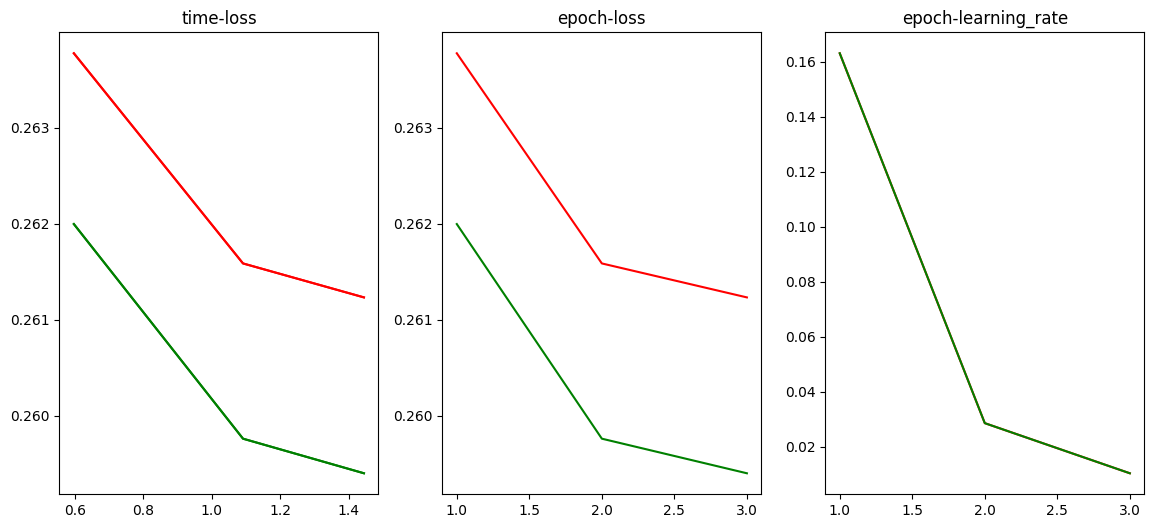

####################################################################################


####################################################################################


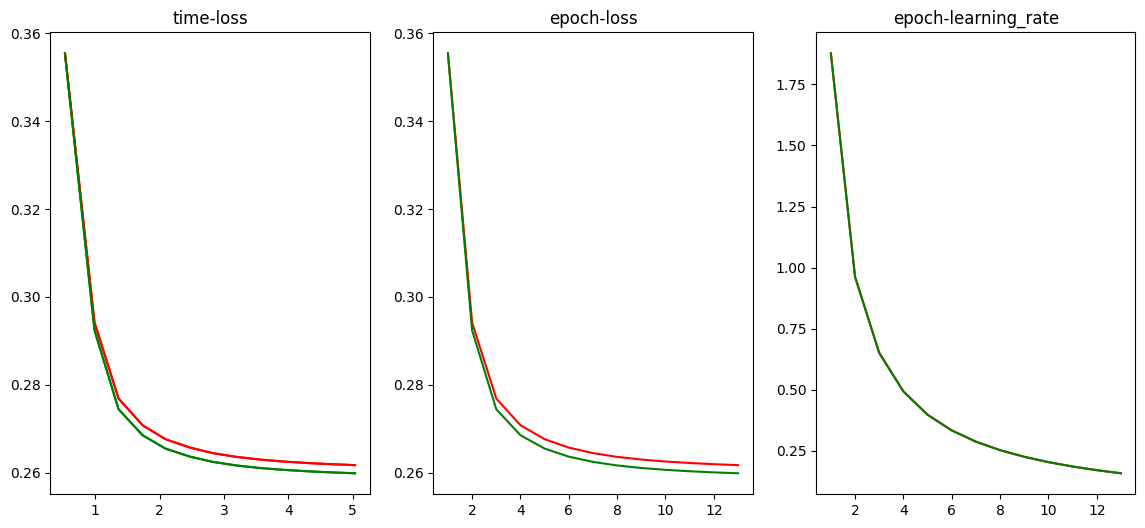

####################################################################################


In [163]:
def plot_experemt_info(models, batch_size, *your_args, **your_kwargs):
    '''
    рисуем информацию о каждой модели по данному батч сайзу
    
    Мы выводим три графика - зависимости лосса от времени, лосса от эпохи, лр от эпохи.
    Причем посклоьку не сказано обратное я строю графики для лосса и на трейне и на валидации, чтобы потом было 
    больше информации для сравнения.
    '''
    # подготовка необходимого
    history = models[batch_size][1]
    fig, ax = plt.subplots(1, 3, figsize=(14, 6))
    alpha = models[batch_size][0].step_alpha
    beta = models[batch_size][0].step_beta
    epochs = np.arange(len(history['time'])) + 1
    batch_size = trial.params['batch_size']
    learning_rate = [alpha / (epoch ** beta) for epoch in epochs]
    ax[0].plot(history['time'], history['train'], color='red')
    ax[0].plot(history['time'], history['val'], color = 'green')
    num_of_epochs = len(history['time'])
    ax[0].set_title('time-loss')
    ax[0].plot(history['time'], history['train'], color='red')
    ax[0].plot(history['time'], history['val'], color = 'green')
    ax[1].plot(epochs, history['train'], color='red')
    ax[1].plot(epochs, history['val'], color = 'green')
    ax[1].set_title('epoch-loss')
    ax[2].plot(epochs, learning_rate, color='red')
    ax[2].plot(epochs, learning_rate, color = 'green')
    ax[2].set_title('epoch-learning_rate')
    plt.show()
    print('####################################################################################')
    
    
for batch_size in [300, 1000, 10000]:
    plot_experemt_info(models, batch_size)

Какие выводы можно сделать из увиденного?

# неоднозначный момент 
Нам заранее задан толеранс, хотя при меньшем батч-сайзе хочется поставить меньший 
толеранс, чем при большом, поскольку они заканчиваются за слишком маленькое маленькое количество эпох и график
не информативен. Либо необходимо делать более частые замеры, потому что в каждой эпохе у них происходит большее
число вычислений.

1) Заметим, что количество эпох, при большом батч сайзе больше, чем при меньшем. Также при большем батч сайзе лосс на валидации и трейене примерно совпадают. \
2) При увелечении батч сайза валидация все более и более становится похожей на трейн, это можно заметить, сравнив первый и третий график. \
3) Лернинг рейт значительно отличается по значениям для разных значениях батч сайза. \
4) Интересно, что график лернинг рейта напоминает по характеру прямую лосса для валидации. 

У нас получился пайплайн обучения модели на исходном наборе данных. Какие еще параметры этого пайплайна можно оптимизировать?

По сути можно оптимизировать все параметры модели, кроме лосса и рандом сида. Очевидно, можно менять максимальное количество итераций и толеранс. Но это может привнести некоторые проблемы - оптюна всегда будет стараться минимизировать толеранс и максимизировать число итераций, хотя и изменения в итоговом лоссе будут незначительные. Также можно было попробовать пооптюнить разные скелеры.